In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from functions import *

In [2]:
data = pd.read_csv("../../Hanoi-Housing-Prices-Prediction/Feature engineering/remaining_nhaban.csv")
data

Đường/Phố        Phường/Xã   Quận/Huyện Phân loại quận  \
0                 Tố Hữu        Dương Nội      Hà Đông      Nội thành   
1                 Tố Hữu           La Khê      Hà Đông      Nội thành   
2      Đại lộ Thăng Long        An Thượng     Hoài Đức    Ngoại thành   
3                Cầu Cốc           Tây Mỗ  Nam Từ Liêm      Nội thành   
4         Hoàng Hoa Thám       Liễu Giai      Ba Đình      Nội thành   
...                  ...              ...          ...            ...   
25499            Tây Sơn         Yết Kiêu      Hà Đông      Nội thành   
25500          Hoàng Cầu      Ô Chợ Dừa      Đống Đa      Nội thành   
25501      Tôn Đức Thắng  Quốc Tử Giám      Đống Đa      Nội thành   
25502            Đồng Cổ             Bưởi       Tây Hồ      Nội thành   
25503      Nguyễn Văn Cừ            Bồ Đề    Long Biên      Nội thành   

         Loại tin    Mã tin  Diện tích  Mức giá  Mặt tiền  Đường vào  ...  \
0      Tin thường  39159568       50.0    186.0       NaN        NaN  ...   
1      Tin thường  38451107      264.0    126.9       NaN        NaN  ...   
2      Tin thường  39204669       99.0    121.2      5.00       15.0  ...   
3      Tin thường  39214622       30.0    113.3      3.54        2.0  ...   
4      Tin thường  38856881       90.0    305.6      5.20       10.0  ...   
...           ...       ...        ...      ...       ...        ...  ...   
25499  Tin thường  39229326       40.9    216.6      5.00        NaN  ...   
25500  Tin thường  38672743      220.0    409.1      8.50        NaN  ...   
25501  Tin thường  39203647       46.0    571.7       NaN        NaN  ...   
25502  Tin thường  35029152       51.0    205.9      7.50        NaN  ...   
25503  Tin thường  39072428      110.0    590.9      6.00       40.0  ...   

      Bán gấp Sân phơi  Nhà thoáng  Gần hồ  An ninh Hiện đại Chỗ để xe  \
0           1        0           0       0        1        0         0   
1           0        0           1       0        0        1         1   
2           0        0           0       0        1        0         0   
3           0        0           0       0        0        0         0   
4           0        0           0       0        1        1         0   
...       ...      ...         ...     ...      ...      ...       ...   
25499       0        0           0       0        0        1         0   
25500       0        0           0       1        0        1         1   
25501       0        1           1       0        0        0         0   
25502       0        0           0       0        0        0         0   
25503       0        0           1       0        1        1         0   

      Thang máy  Lô góc  Hỗ trợ vay  
0             0       0           0  
1             0       0           0  
2             0       1           0  
3             0       0           0  
4             1       0           0  
...         ...     ...         ...  
25499         0       0           0  
25500         0       0           0  
25501         0       1           0  
25502         0       0           0  
25503         0       1           0  

[25504 rows x 34 columns]

In [3]:
data['Pháp lý'] = data['Pháp lý'].str.replace('.','')
data['Pháp lý'] = data['Pháp lý'].str.lower()
data['Pháp lý'] = data['Pháp lý'].apply(lambda x: x if (isinstance(x, str) and len(x) <= 200) or pd.isna(x) else np.nan)
data.loc[data['Pháp lý'].str.contains('nội thất', na=False), 'Pháp lý'] = np.nan

def clean_phap_ly(x):
    if isinstance(x, str):        
        if 'vi bằng' in x:
            return 'Vi bằng'
        elif 'chính chủ' in x:
            return 'Sổ đỏ, sổ hồng, pháp lý đầy đủ'
        elif any(word in x for word in ['chờ', 'làm']):
            return 'Đang chờ sổ'
        elif 'chung' in x:
            return 'Sổ chung'
        elif any(word in x for word in ['hợp đồng', 'hđmb', 'hdmb', 'ký']):
            return 'Hợp đồng mua bán'
        elif any(word in x for word in ['sổ', 'đầy đủ', 'rõ ràng', 'sẵn', 'sđcc', 'sdcc', 'riêng', 'đã có']):
            return 'Sổ đỏ, sổ hồng, pháp lý đầy đủ'
        else:
            return 'Khác'
    else:
        return 'Khác'

data['Pháp lý'] = data['Pháp lý'].apply(clean_phap_ly)

In [4]:
data['Pháp lý'].value_counts()

Pháp lý
Sổ đỏ, sổ hồng, pháp lý đầy đủ    20188
Khác                               4864
Hợp đồng mua bán                    342
Đang chờ sổ                          99
Sổ chung                              6
Vi bằng                               5
Name: count, dtype: int64

In [5]:
data['Nội thất'] = data['Nội thất'].str.replace('.','')
data['Nội thất'] = data['Nội thất'].str.lower()

def clean_noi_that(x):
    if isinstance(x, str):        
        if any(word in x for word in ['cao cấp','nhập khẩu','cao cấ','đẳng cấp','vip','cao cập','sang trọng','tiền tỷ','nhập','hiện đại','đẹp','châu âu','xịn','luxury']):
            return 'Nội thất cao cấp'
        elif any(word in x for word in ['nguyên bản','chủ đầu tư','cđt','cdt']):
            return 'Nguyên bản chủ đầu tư'
        elif any(word in x for word in ['thô','mặt ngoài']):
            return 'Nội thất thô'
        elif any(word in x for word in ['full','đủ','toàn bộ','ful','gull','fun']):
            return 'Full nội thất'
        elif any(word in x for word in ['cơ bản','ntcb','gắn tường','liền tường','sẵn','có đồ', 'hoàn thiện', 'trung bình']):
            return 'Nội thất cơ bản'
        elif any(word in x for word in ['chưa', 'không']):
            return 'Chưa có nội thất'
        else:
            return 'Khác'
    else:
        return 'Khác'
    
data['Nội thất'] = data['Nội thất'].apply(clean_noi_that)


In [6]:
data['Nội thất'].value_counts()

Nội thất
Khác                     11383
Full nội thất             9823
Nội thất cơ bản           2792
Nội thất cao cấp           765
Chưa có nội thất           651
Nội thất thô                81
Nguyên bản chủ đầu tư        9
Name: count, dtype: int64

# Basic Information

In [7]:
basic_information(data, ['Mã tin'])

The shape: (25504, 34)
----------------------------------------------------------------------------------------------------
Number of duplicate values: 0
----------------------------------------------------------------------------------------------------
Number of unique Mã tin are: 25504


In [8]:
data.columns

Index(['Đường/Phố', 'Phường/Xã', 'Quận/Huyện', 'Phân loại quận', 'Loại tin',
       'Mã tin', 'Diện tích', 'Mức giá', 'Mặt tiền', 'Đường vào',
       'Hướng ban công', 'Hướng nhà', 'Số tầng', 'Số phòng ngủ', 'Số toilet',
       'Pháp lý', 'Nội thất', 'Loại hình', 'Nhóm 1-Trường học',
       'Nhóm 1- Chợ/Siêu thị', 'Nhóm 1-Bệnh viện', 'Công viên', 'Loại ngõ',
       'Vỉa hè', 'Bán gấp', 'Sân phơi', 'Nhà thoáng', 'Gần hồ', 'An ninh',
       'Hiện đại', 'Chỗ để xe', 'Thang máy', 'Lô góc', 'Hỗ trợ vay'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25504 entries, 0 to 25503
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Đường/Phố             22884 non-null  object 
 1   Phường/Xã             25367 non-null  object 
 2   Quận/Huyện            25504 non-null  object 
 3   Phân loại quận        25504 non-null  object 
 4   Loại tin              25504 non-null  object 
 5   Mã tin                25504 non-null  int64  
 6   Diện tích             25504 non-null  float64
 7   Mức giá               25504 non-null  float64
 8   Mặt tiền              16416 non-null  float64
 9   Đường vào             12173 non-null  float64
 10  Hướng ban công        3069 non-null   object 
 11  Hướng nhà             4839 non-null   object 
 12  Số tầng               21491 non-null  float64
 13  Số phòng ngủ          17590 non-null  float64
 14  Số toilet             15854 non-null  float64
 15  Pháp lý            

In [10]:
data.describe().T

count          mean           std        min  \
Mã tin                25504.0  3.856997e+07  1.696879e+06  4204725.0   
Diện tích             25504.0  1.057092e+02  6.652580e+02       10.0   
Mức giá               25504.0  2.145678e+02  1.525180e+02        0.6   
Mặt tiền              16416.0  6.675214e+00  6.662592e+00        1.0   
Đường vào             12173.0  1.107392e+01  1.160614e+01        0.2   
Số tầng               21491.0  4.963985e+00  1.765632e+00        1.0   
Số phòng ngủ          17590.0  5.832121e+00  6.129087e+00        1.0   
Số toilet             15854.0  5.813801e+00  6.375537e+00        1.0   
Nhóm 1-Trường học     25504.0  3.423777e-01  4.745145e-01        0.0   
Nhóm 1- Chợ/Siêu thị  25504.0  2.443930e-01  4.297352e-01        0.0   
Nhóm 1-Bệnh viện      25504.0  8.939774e-02  2.853226e-01        0.0   
Công viên             25504.0  1.380960e-01  3.450075e-01        0.0   
Vỉa hè                25504.0  1.805991e-01  3.846932e-01        0.0   
Bán gấp               25504.0  1.560540e-01  3.629136e-01        0.0   
Sân phơi              25504.0  2.214555e-01  4.152345e-01        0.0   
Nhà thoáng            25504.0  3.348886e-01  4.719608e-01        0.0   
Gần hồ                25504.0  2.040856e-01  4.030398e-01        0.0   
An ninh               25504.0  2.183579e-01  4.131397e-01        0.0   
Hiện đại              25504.0  2.394918e-01  4.267817e-01        0.0   
Chỗ để xe             25504.0  1.762861e-01  3.810708e-01        0.0   
Thang máy             25504.0  2.341201e-01  4.234559e-01        0.0   
Lô góc                25504.0  1.575831e-01  3.643568e-01        0.0   
Hỗ trợ vay            25504.0  8.790778e-02  2.831663e-01        0.0   

                              25%         50%         75%         max  
Mã tin                38676138.75  39111031.0  39189359.5  39238195.0  
Diện tích                   44.00        65.0       110.0    100000.0  
Mức giá                    121.70       173.9       260.0      6071.4  
Mặt tiền                     4.00         5.0         7.0       340.0  
Đường vào                    3.00         7.0        15.0       322.0  
Số tầng                      4.00         5.0         6.0        50.0  
Số phòng ngủ                 3.00         4.0         6.0       148.0  
Số toilet                    3.00         4.0         6.0       160.0  
Nhóm 1-Trường học            0.00         0.0         1.0         1.0  
Nhóm 1- Chợ/Siêu thị         0.00         0.0         0.0         1.0  
Nhóm 1-Bệnh viện             0.00         0.0         0.0         1.0  
Công viên                    0.00         0.0         0.0         1.0  
Vỉa hè                       0.00         0.0         0.0         1.0  
Bán gấp                      0.00         0.0         0.0         1.0  
Sân phơi                     0.00         0.0         0.0         1.0  
Nhà thoáng                   0.00         0.0         1.0         1.0  
Gần hồ                       0.00         0.0         0.0         1.0  
An ninh                      0.00         0.0         0.0         1.0  
Hiện đại                     0.00         0.0         0.0         1.0  
Chỗ để xe                    0.00         0.0         0.0         1.0  
Thang máy                    0.00         0.0         0.0         1.0  
Lô góc                       0.00         0.0         0.0         1.0  
Hỗ trợ vay                   0.00         0.0         0.0         1.0

The labeled dataset includes 34 features with 25504 observations, unique by the feature "Mã tin"

In [11]:
count_missing_values(data)

Data frame has 34 columns.
There are 10 columns that have missing values.


total_nan  percent_nan
Hướng ban công      22435    87.966593
Hướng nhà           20665    81.026506
Loại ngõ            19908    78.058344
Đường vào           13331    52.270232
Số toilet            9650    37.837202
Mặt tiền             9088    35.633626
Số phòng ngủ         7914    31.030427
Số tầng              4013    15.734787
Đường/Phố            2620    10.272898
Phường/Xã             137     0.537171

Data frame has 34 columns.
There are 10 columns that have missing values.


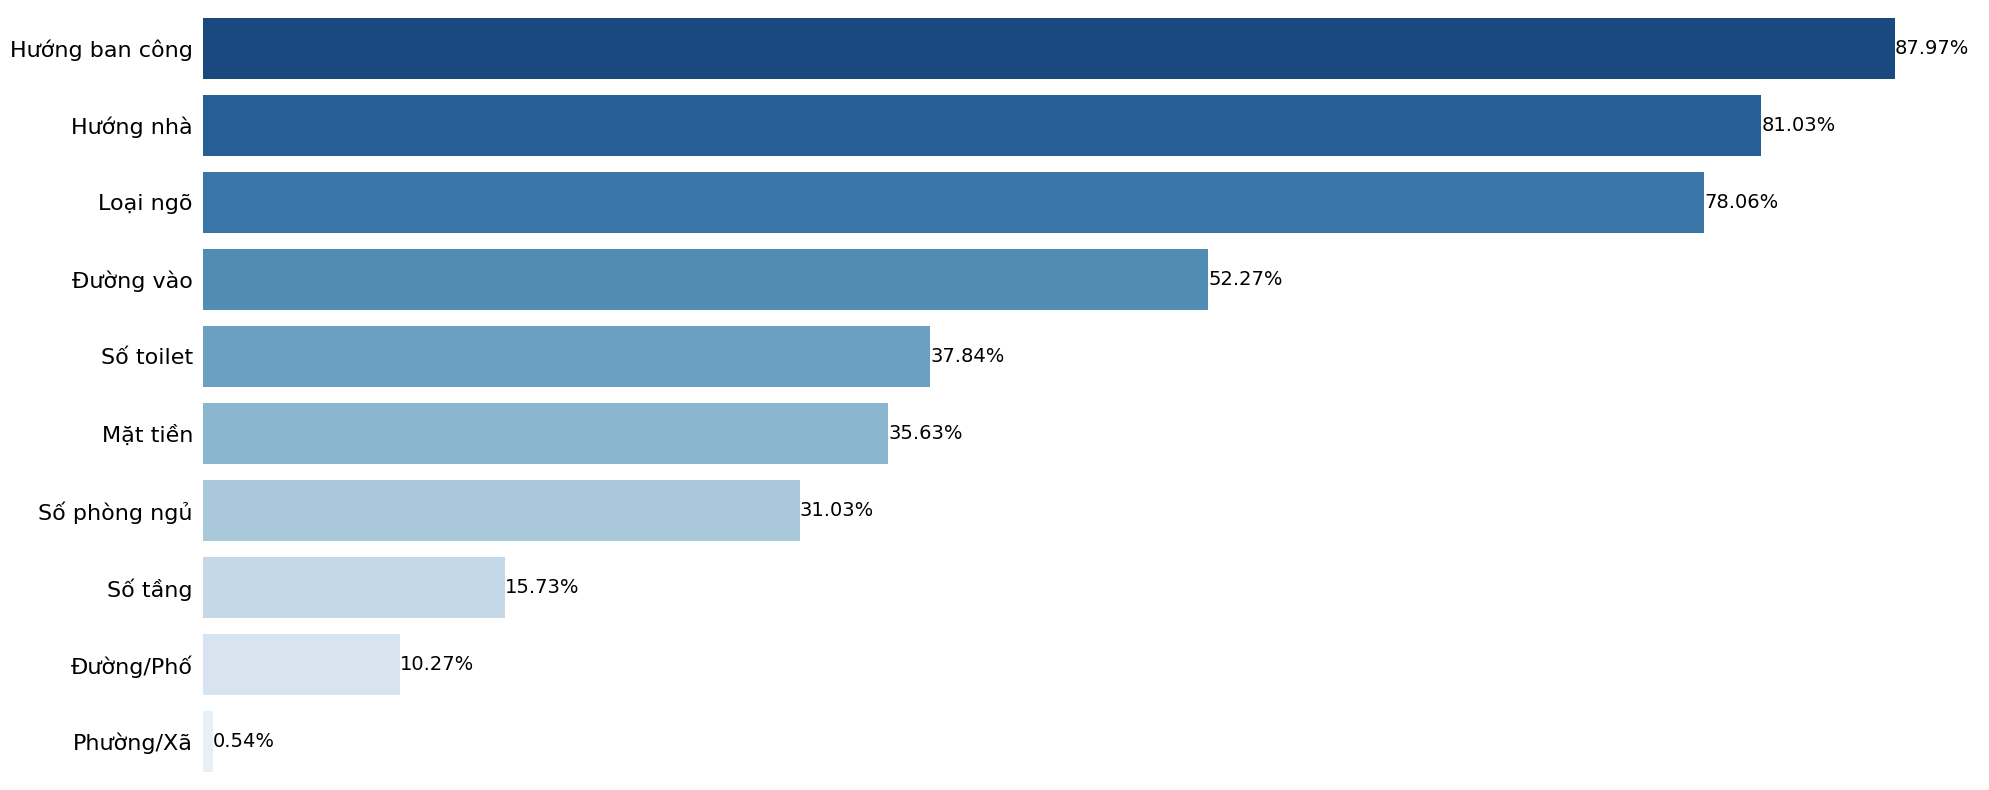

In [12]:
plot_missing_values_percent(data)

In general, there has 13/34 features containing missing value in the dataset, the NaN values mainly concentrates on detailed features, such as 'Hướng ban công;, 'Hướng nhà', 'Loại ngõ','Đường vào','Nội thất',.....

# Overview

### Location

In [13]:
num = data['Phân loại quận'].value_counts()
sum_district = num.sum()
percent = (num/sum_district)*100

df_district = pd.DataFrame({'Số lượng': num, 'Tỷ lệ (%)': percent})
df_district

Số lượng  Tỷ lệ (%)
Phân loại quận                     
Nội thành          23015  90.240747
Ngoại thành         2489   9.759253

Total Number of unique categories of Phân loại quận = 2


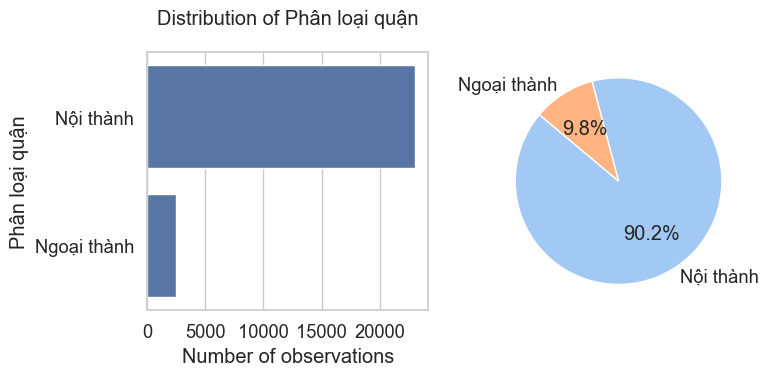

In [14]:
plot_categorical_variables(data, 'Phân loại quận', figsize = (8, 4))

- As a result, there are more than 90% observations in the dataset in Hanoi's inner city 
- Thus, we divide the dataset into 2 parts according to district classification for clearly seeing the insight of each part


In [15]:
data_noithanh = data[data['Phân loại quận'] == 'Nội thành']
data_ngoaithanh = data[data['Phân loại quận'] == 'Ngoại thành']

In [16]:
data_noithanh.head()

Đường/Phố   Phường/Xã   Quận/Huyện Phân loại quận    Loại tin  \
0          Tố Hữu   Dương Nội      Hà Đông      Nội thành  Tin thường   
1          Tố Hữu      La Khê      Hà Đông      Nội thành  Tin thường   
3         Cầu Cốc      Tây Mỗ  Nam Từ Liêm      Nội thành  Tin thường   
4  Hoàng Hoa Thám  Liễu Giai      Ba Đình      Nội thành  Tin thường   
5       Xuân Đỉnh   Xuân Đỉnh  Bắc Từ Liêm      Nội thành  Tin thường   

     Mã tin  Diện tích  Mức giá  Mặt tiền  Đường vào  ... Bán gấp Sân phơi  \
0  39159568       50.0    186.0       NaN        NaN  ...       1        0   
1  38451107      264.0    126.9       NaN        NaN  ...       0        0   
3  39214622       30.0    113.3      3.54        2.0  ...       0        0   
4  38856881       90.0    305.6      5.20       10.0  ...       0        0   
5  39166878       81.3    169.7      5.50        2.5  ...       0        0   

   Nhà thoáng  Gần hồ  An ninh Hiện đại Chỗ để xe Thang máy  Lô góc  \
0           0       0        1        0         0         0       0   
1           1       0        0        1         1         0       0   
3           0       0        0        0         0         0       0   
4           0       0        1        1         0         1       0   
5           0       1        0        0         0         0       0   

   Hỗ trợ vay  
0           0  
1           0  
3           0  
4           0  
5           0  

[5 rows x 34 columns]

In [17]:
data_ngoaithanh.head()

Đường/Phố   Phường/Xã Quận/Huyện Phân loại quận    Loại tin  \
2   Đại lộ Thăng Long   An Thượng   Hoài Đức    Ngoại thành  Tin thường   
47                NaN   Đại Thành   Quốc Oai    Ngoại thành  Tin thường   
53        Nguyễn Xiển   Tân Triều  Thanh Trì    Ngoại thành  Tin thường   
57           Di Trạch    Di Trạch   Hoài Đức    Ngoại thành  Tin thường   
59          Vĩnh Ninh  Vĩnh Quỳnh  Thanh Trì    Ngoại thành  Tin thường   

      Mã tin  Diện tích  Mức giá  Mặt tiền  Đường vào  ... Bán gấp Sân phơi  \
2   39204669      99.00    121.2       5.0       15.0  ...       0        0   
47  39140887      65.00     36.2       4.2        3.0  ...       0        1   
53  39184427      85.25    252.2       6.0       30.0  ...       1        0   
57  39213125      42.00     97.6       4.0        3.5  ...       0        1   
59  37343238      60.00     41.7       4.1        2.2  ...       0        1   

    Nhà thoáng  Gần hồ  An ninh Hiện đại Chỗ để xe Thang máy  Lô góc  \
2            0       0        1        0         0         0       1   
47           0       0        0        1         0         0       0   
53           0       0        0        0         0         0       0   
57           0       0        0        1         0         0       0   
59           1       0        0        1         0         0       0   

    Hỗ trợ vay  
2            0  
47           1  
53           0  
57           0  
59           0  

[5 rows x 34 columns]

In [18]:
count_by_district = data_noithanh['Quận/Huyện'].value_counts().to_frame().reset_index()
count_by_district.columns = ['Quận/Huyện', 'Số lượng']
count_by_district

Quận/Huyện  Số lượng
0       Cầu Giấy      2981
1        Hà Đông      2858
2      Long Biên      2633
3        Đống Đa      2620
4    Nam Từ Liêm      1920
5         Tây Hồ      1854
6      Hoàng Mai      1795
7     Thanh Xuân      1711
8   Hai Bà Trưng      1668
9        Ba Đình      1472
10   Bắc Từ Liêm       863
11     Hoàn Kiếm       640

Total Number of unique categories of Quận/Huyện = 12


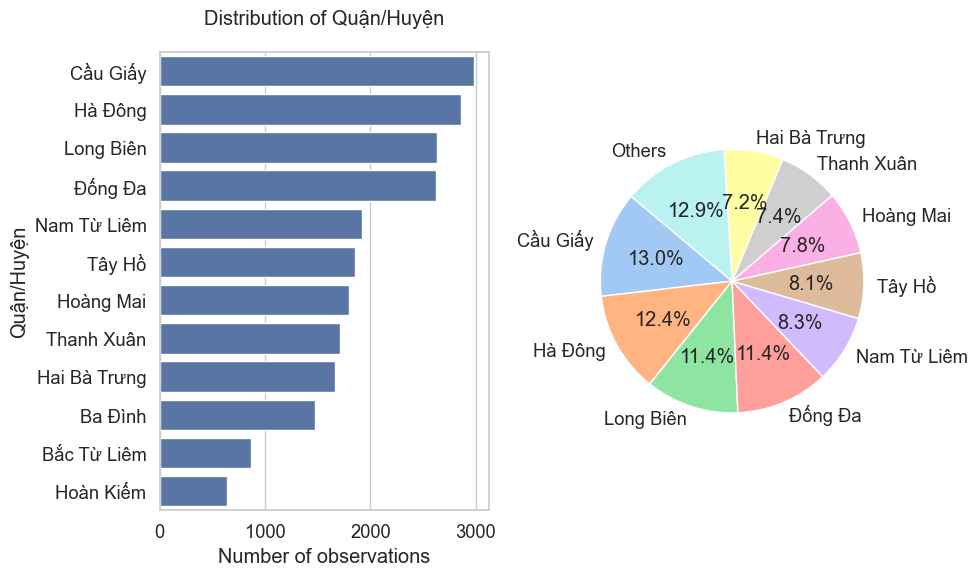

In [19]:
plot_categorical_variables(data_noithanh, 'Quận/Huyện', figsize = (10, 6))

- Houses for sale are concentrated on four districts including 'Cầu Giấy','Hà Đông', 'Long Biên' and 'Đống Đa'. This is understandable because their areas and population densities are quite large. In addition, these are also districts with many hospitals, universities, ....and it is easy to connect to the center as well as other utility locations so the demand for housing seems to be higher than other inner-city districts.
- On the contrary, the number of houses for sale in 'Bắc Từ Liêm' and 'Hoàn Kiếm' is quite low partly because the area of these two districts is much smaller than other districts.

In [20]:
count_by_district = data_ngoaithanh['Quận/Huyện'].value_counts().to_frame().reset_index()
count_by_district.columns = ['Quận/Huyện', 'Số lượng']
count_by_district

Quận/Huyện  Số lượng
0     Hoài Đức       876
1    Thanh Trì       520
2      Gia Lâm       477
3     Đông Anh       173
4      Mê Linh        87
5     Quốc Oai        73
6   Thạch Thất        57
7    Thanh Oai        52
8    Chương Mỹ        48
9      Sơn Tây        39
10  Đan Phượng        33
11  Thường Tín        23
12     Sóc Sơn        17
13       Ba Vì         9
14     Ứng Hòa         3
15    Phúc Thọ         2

Total Number of unique categories of Quận/Huyện = 16


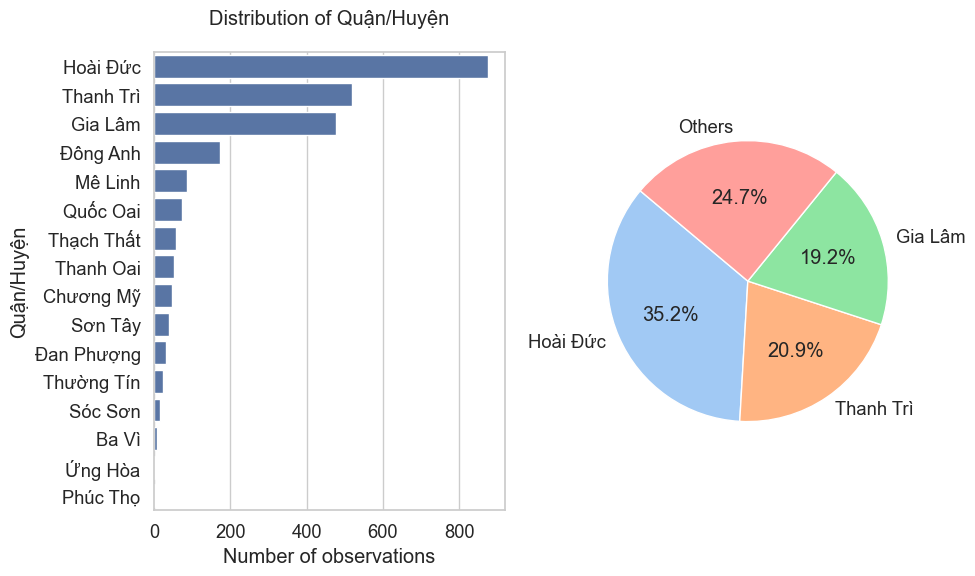

In [21]:
plot_categorical_variables(data_ngoaithanh, 'Quận/Huyện', figsize = (10, 6))

In suburban districts, houses for sale are mostly in 'Gia Lâm', 'Hoài Đức' and 'Thanh Trì' district (these districts close to the inner city).

### Loại tin

In [22]:
data['Loại tin'].value_counts().to_frame().rename(columns = {'Loại tin':'Số lượng'})

count
Loại tin                
Tin thường         25124
Tin VIP Bạc         306
Tin VIP Vàng         72
Tin VIP Kim Cương      2

In [23]:
price_by_type2 = data.groupby('Loại tin')['Mức giá'].agg(['mean', 'max', 'min']).reset_index()
price_by_type2 = price_by_type2.sort_values(by='mean', ascending=False).reset_index(drop=True)
price_by_type2

Loại tin        mean     max    min
0       Tin VIP Bạc  241.841830   972.2   31.6
1  Tin VIP Kim Cương  237.600000   362.7  112.5
2         Tin thường  214.317008  6071.4    0.6
3      Tin VIP Vàng  185.538889   578.6   37.3

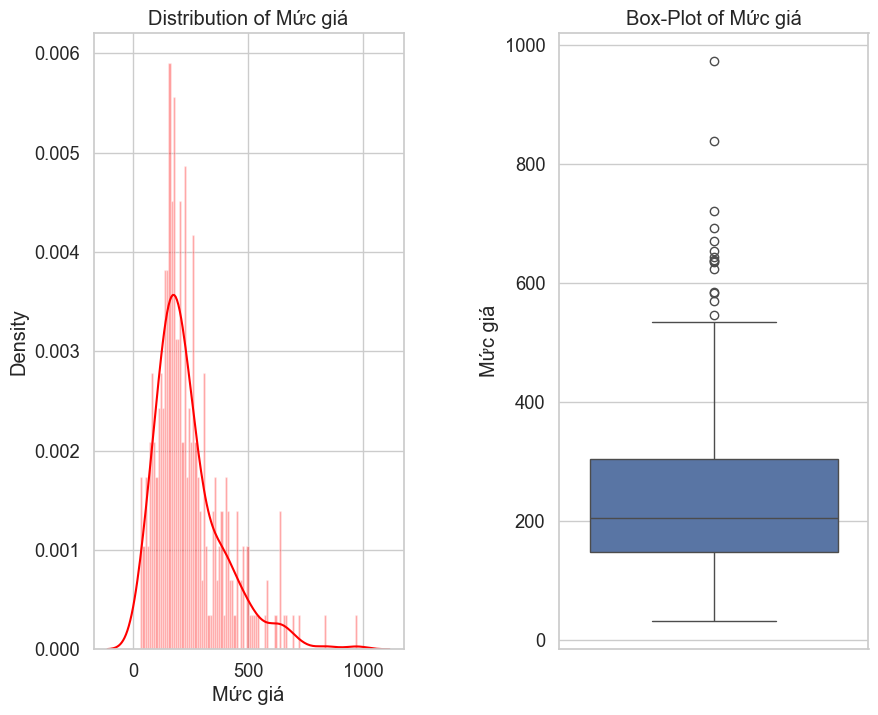

None


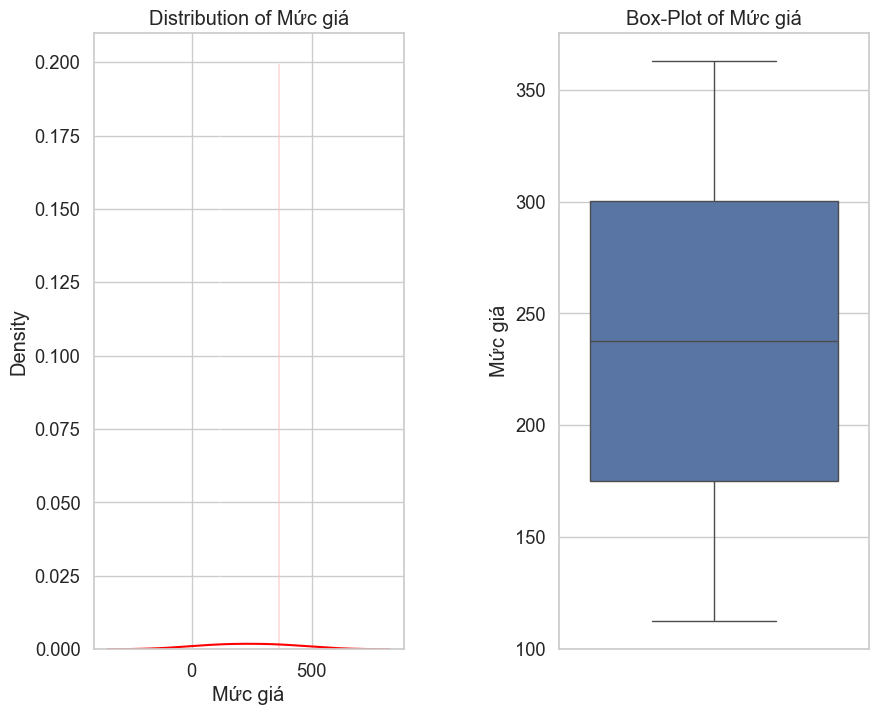

None


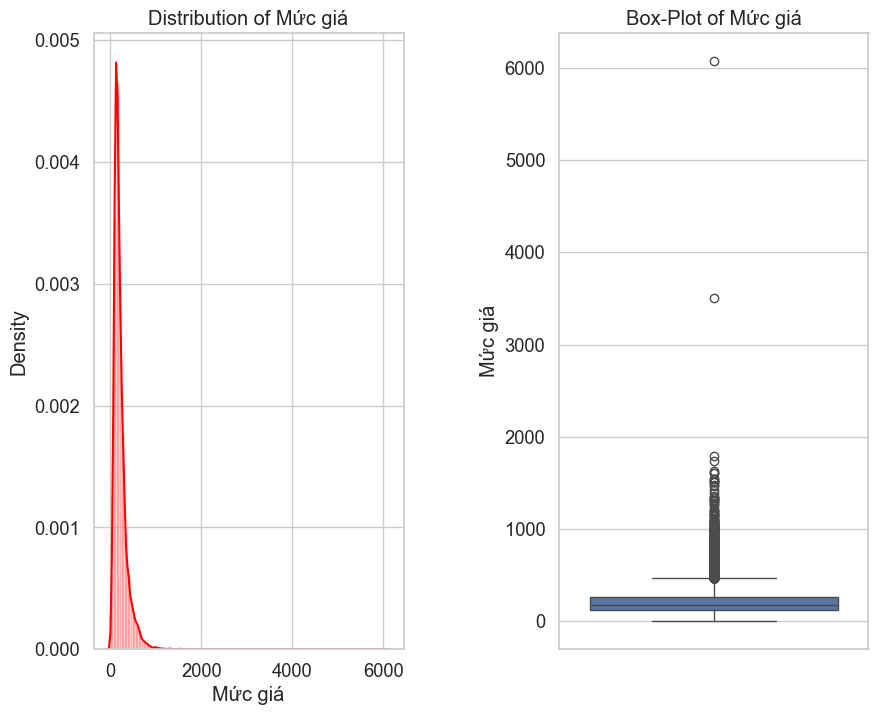

None


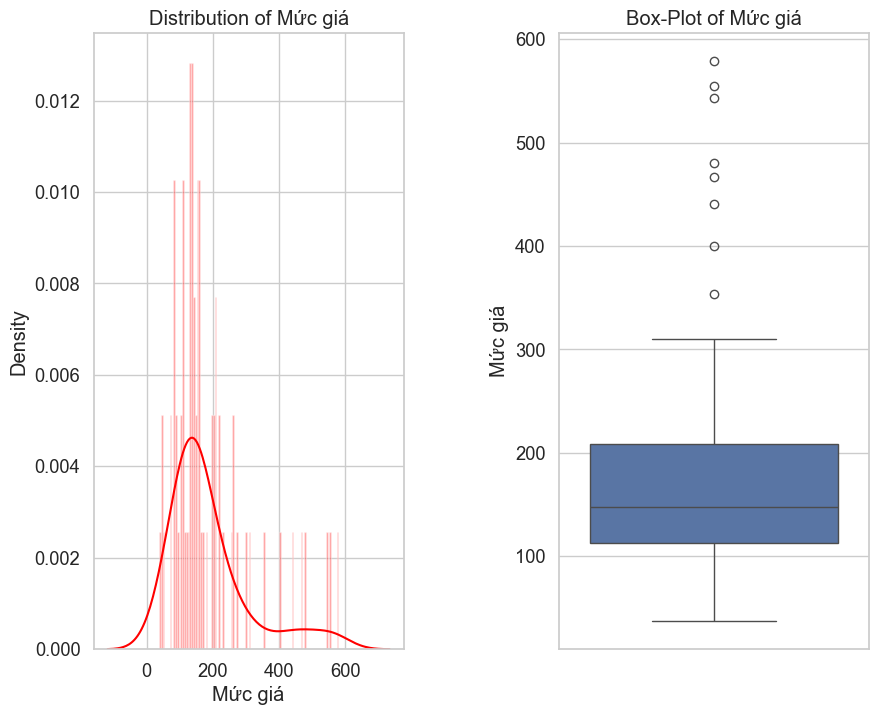

None


In [24]:
for i in price_by_type2['Loại tin']:
    print(plot_numerical_variables(data[data['Loại tin']==i], 'Mức giá', figsize = (10,8)))

### Price 

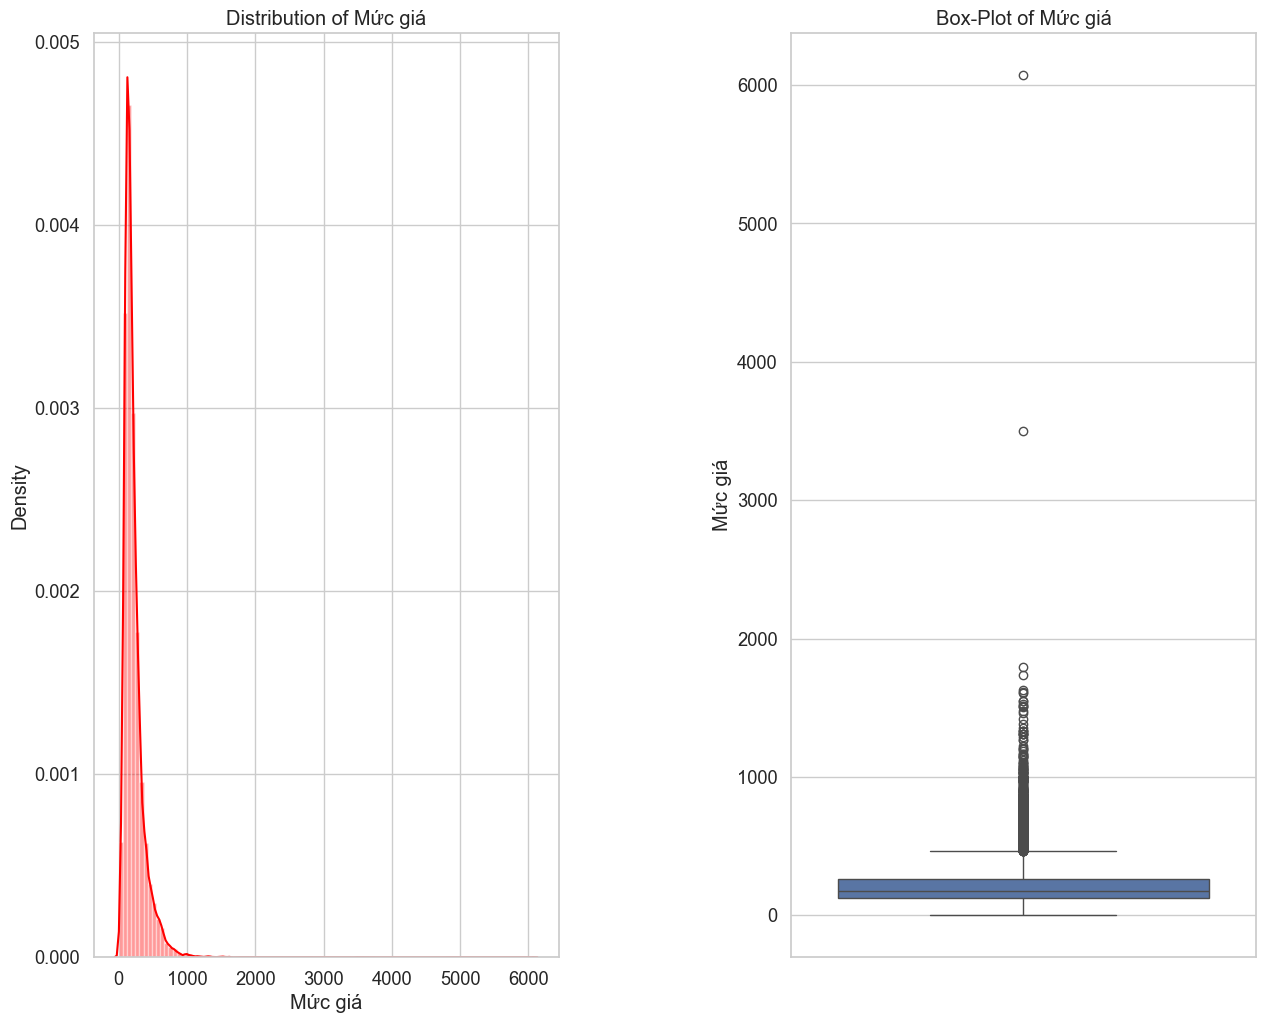

In [25]:
plot_numerical_variables(data, 'Mức giá', figsize = (15,12))

The price of houses fluctuates significiently between 100 and 500 million/m2. Moreover, the dataset has many outliers(with 6000 millions/m2), we need to consider their meanings to delete them because they can affect the model 

# Detailed Analysis

### Location

In [26]:
average_price_by_district = data.groupby('Quận/Huyện')['Mức giá'].agg(['mean', 'min', 'max']).reset_index()
average_price_by_district.columns = ['Quận/Huyện', 'Mức giá trung bình','Mức giá tối thiểu','Mức giá tối đa']
average_price_by_district = average_price_by_district.sort_values(by='Mức giá trung bình', ascending=False).reset_index(drop=True)
average_price_by_district

Quận/Huyện  Mức giá trung bình  Mức giá tối thiểu  Mức giá tối đa
0      Hoàn Kiếm          563.945000                2.7          1794.1
1         Tây Hồ          284.054800               28.3          1625.0
2       Cầu Giấy          270.239114               20.0           888.9
3        Ba Đình          267.391508                0.6          1333.3
4   Hai Bà Trưng          266.304616               24.0          6071.4
5        Đống Đa          255.531870               32.7          1311.1
6     Thanh Xuân          213.436178               20.7           707.3
7    Nam Từ Liêm          186.237865               16.0           751.6
8    Bắc Từ Liêm          171.357242               34.5          3500.0
9        Hà Đông          160.125822               15.9           545.5
10     Hoàng Mai          159.256880               17.0          1464.3
11     Long Biên          151.478883                5.3           636.4
12       Gia Lâm          150.853669               25.0           350.0
13     Thanh Trì          121.578462               12.5           361.1
14    Thường Tín          117.500000               44.8           194.4
15      Hoài Đức           98.675000                7.5           215.4
16      Đông Anh           84.446821               17.8           245.5
17    Đan Phượng           74.893939                6.0           136.3
18       Sơn Tây           69.869231               15.6           146.2
19     Thanh Oai           50.632692               17.0            90.7
20     Chương Mỹ           46.616667                9.3           105.1
21    Thạch Thất           44.157895                7.5           177.8
22       Mê Linh           44.037931               18.0           121.9
23       Ứng Hòa           39.333333               10.0            76.0
24      Quốc Oai           39.024658               10.6            70.0
25       Sóc Sơn           26.494118                3.5           109.8
26      Phúc Thọ           14.000000                7.0            21.0
27         Ba Vì           12.955556                1.3            32.5

- The highest average prices are concentrated in the four central districts of Hanoi: Hoàn Kiếm, Tây Hồ, Cầu Giấy, and Ba Đình. 
- Meanwhile, the lowest average prices are found in two suburban districts far from the city center: Phúc Thọ and Ba Vì.



In [27]:
data[data['Mức giá']<10]

Đường/Phố    Phường/Xã  Quận/Huyện Phân loại quận  \
188           Tây Thăng Long      Tân Lập  Đan Phượng    Ngoại thành   
729                      NaN     Minh Trí     Sóc Sơn    Ngoại thành   
1321              Quốc lộ 32     Tam Hiệp    Phúc Thọ    Ngoại thành   
4002                     419      Hạ Bằng  Thạch Thất    Ngoại thành   
5365                     NaN     Cẩm Lĩnh       Ba Vì    Ngoại thành   
6528                 La Tinh      Đông La    Hoài Đức    Ngoại thành   
6970                Thái Lai     Minh Trí     Sóc Sơn    Ngoại thành   
7313               Thắng Trí     Minh Trí     Sóc Sơn    Ngoại thành   
9420                     NaN  Tiên Phương   Chương Mỹ    Ngoại thành   
12547                    NaN      Yên Bài       Ba Vì    Ngoại thành   
13935                    NaN     Minh Trí     Sóc Sơn    Ngoại thành   
18758               Thái Lai     Minh Trí     Sóc Sơn    Ngoại thành   
18969                    87A      Yên Bài       Ba Vì    Ngoại thành   
21754                Láng Hạ   Thành Công     Ba Đình      Nội thành   
24069         Lý Thường Kiệt     Hàng Bài   Hoàn Kiếm      Nội thành   
24323                  Bồ Đề    Long Biên   Long Biên      Nội thành   
24632  số 20 Ké Mới Tản Lĩnh     Tản Lĩnh       Ba Vì    Ngoại thành   

         Loại tin    Mã tin  Diện tích  Mức giá  Mặt tiền  Đường vào  ...  \
188    Tin thường  36346918      500.0      6.0      20.0        NaN  ...   
729    Tin thường  37226802      930.0      7.3      31.0        NaN  ...   
1321   Tin thường  31972592     1350.0      7.0       NaN        NaN  ...   
4002   Tin thường  38752659      328.0      7.5       NaN        NaN  ...   
5365   Tin thường  39166440    12000.0      1.3       NaN        NaN  ...   
6528   Tin thường  38718063      106.0      7.5       7.0        8.0  ...   
6970   Tin thường  37728308     1100.0      9.1       NaN        NaN  ...   
7313   Tin thường  38107919      225.0      9.0       9.0        7.0  ...   
9420   Tin thường  38600235      450.0      9.3      16.1        3.5  ...   
12547  Tin thường  38529561      750.0      6.1       NaN        NaN  ...   
13935  Tin thường  38227483      930.0      6.5      31.0        NaN  ...   
18758  Tin thường  28577180      630.0      3.5       NaN        NaN  ...   
18969  Tin thường  38524293      657.0      6.5       NaN       10.0  ...   
21754  Tin thường  37901141     3920.0      0.6      85.0        NaN  ...   
24069  Tin thường  37186761      742.0      2.7      30.0        NaN  ...   
24323  Tin thường  36518815   100000.0      5.3     300.0       45.0  ...   
24632  Tin thường  37938234      646.5      5.4       9.0       10.0  ...   

      Bán gấp Sân phơi  Nhà thoáng  Gần hồ  An ninh Hiện đại Chỗ để xe  \
188         0        0           0       1        0        0         0   
729         1        0           0       1        0        1         0   
1321        0        0           0       0        0        0         0   
4002        0        0           0       1        0        0         0   
5365        0        0           0       0        0        0         0   
6528        0        0           0       0        0        0         0   
6970        0        0           0       1        0        0         0   
7313        0        0           0       0        0        0         0   
9420        0        0           0       0        0        0         0   
12547       1        0           0       0        1        0         0   
13935       0        0           0       1        0        1         0   
18758       0        0           1       0        0        0         0   
18969       0        0           0       0        0        0         0   
21754       0        0           0       0        0        1         1   
24069       0        0           0       0        0        0         0   
24323       0        0           1       1        0        0         0   
24632       0        0           0       1        0        0         0   

  

- Housing prices under 10 million VND per square meter are mostly concentrated in the suburban districts.

In [28]:
data[data['Mức giá']>3000]

Đường/Phố     Phường/Xã    Quận/Huyện Phân loại quận    Loại tin  \
20359         NaN     Đông Ngạc   Bắc Từ Liêm      Nội thành  Tin thường   
21808  Mai Hắc Đế  Bùi Thị Xuân  Hai Bà Trưng      Nội thành  Tin thường   

         Mã tin  Diện tích  Mức giá  Mặt tiền  Đường vào  ... Bán gấp  \
20359  39200998      100.0   3500.0       NaN        NaN  ...       0   
21808  39154560      140.0   6071.4       NaN        NaN  ...       0   

      Sân phơi  Nhà thoáng  Gần hồ  An ninh Hiện đại Chỗ để xe Thang máy  \
20359        0           0       0        0        0         0         0   
21808        0           0       0        0        0         0         1   

       Lô góc  Hỗ trợ vay  
20359       0           0  
21808       0           0  

[2 rows x 34 columns]

In [29]:
count_by_outliers = data[data['Mức giá']>500]['Quận/Huyện'].value_counts().to_frame().reset_index()
count_by_outliers.columns = ['Quận/Huyện', 'Số lượng']
count_by_outliers

Quận/Huyện  Số lượng
0      Hoàn Kiếm       360
1       Cầu Giấy       225
2   Hai Bà Trưng       184
3        Đống Đa       168
4         Tây Hồ       142
5        Ba Đình       106
6     Thanh Xuân        49
7    Nam Từ Liêm        24
8      Long Biên        12
9    Bắc Từ Liêm         4
10       Hà Đông         4
11     Hoàng Mai         2

* Housing prices exceeding 500 million VND per square meter are highest in the central districts of Hoàn Kiếm and Cầu Giấy.
* In contrast, the more peripheral districts of Bắc Từ Liêm, Hà Đông, and Hoàng Mai report significantly fewer instances of such high prices, with quantities of 4, 4, and 2, respectively.

### Types of house

In [30]:
data['Loại hình'].value_counts().to_frame().rename(columns = {'Loại hình':'Số lượng'})

count
Loại hình           
Nhà riêng      14183
Mặt phố         4990
Biệt thự        4848
Chung cư mini    956
Shophouse        527

Total Number of unique categories of Loại hình = 5


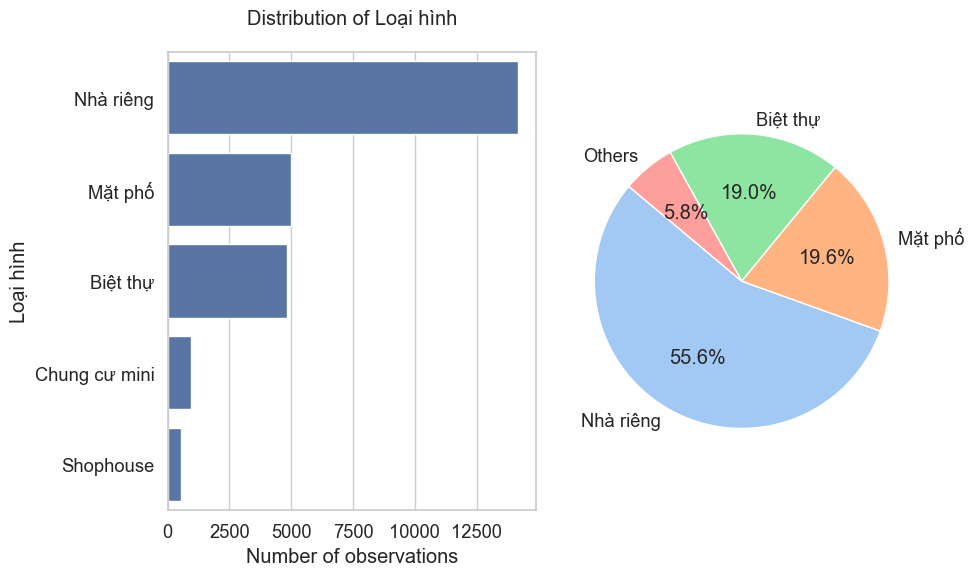

In [31]:
plot_categorical_variables(data, 'Loại hình', figsize = (10, 6))

#### The types of houses listed for sale on the website are predominant by "Nhà riêng", making up over 50%. "Biệt thự" and "Mặt phố" each account for approximately the same percentage

In [32]:
price_by_type = data.groupby('Loại hình')['Mức giá'].agg(['mean', 'min', 'max']).reset_index()
price_by_type.columns = ['Loại hình', 'Mức giá trung bình','Mức giá tối thiểu','Mức giá tối đa']
price_by_type = price_by_type.sort_values(by='Mức giá trung bình', ascending=False).reset_index(drop=True)
price_by_type

Loại hình  Mức giá trung bình  Mức giá tối thiểu  Mức giá tối đa
0        Mặt phố          393.716172                0.6          6071.4
1       Biệt thự          197.705363                1.3          1625.0
2  Chung cư mini          179.415063               13.0          1309.1
3      Shophouse          168.616129               16.0          3500.0
4      Nhà riêng          161.378925                3.5          1269.2

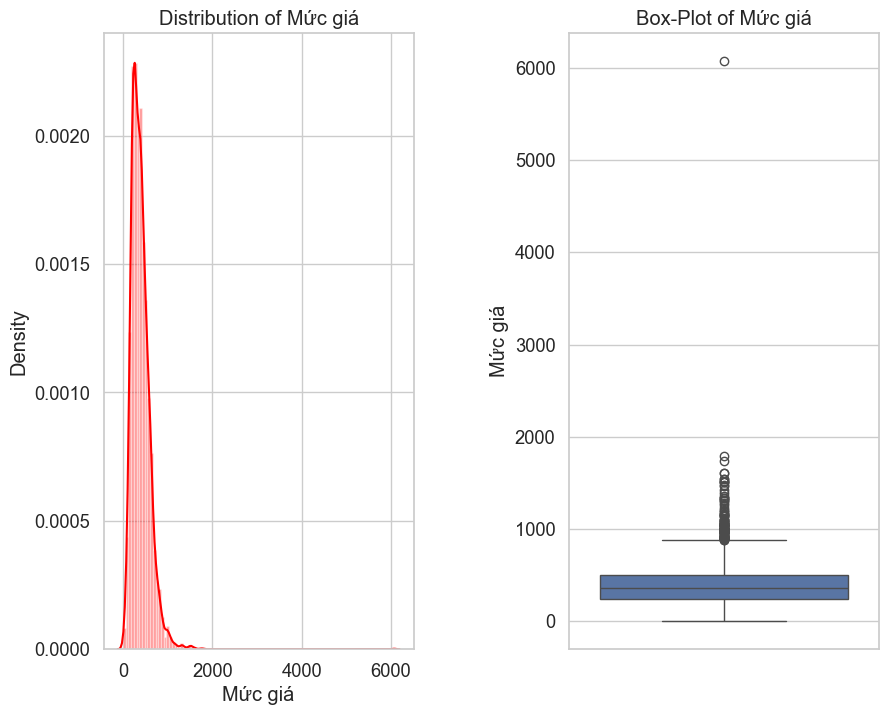

In [33]:
plot_numerical_variables(data[data['Loại hình']=='Mặt phố'], 'Mức giá', figsize = (10,8))

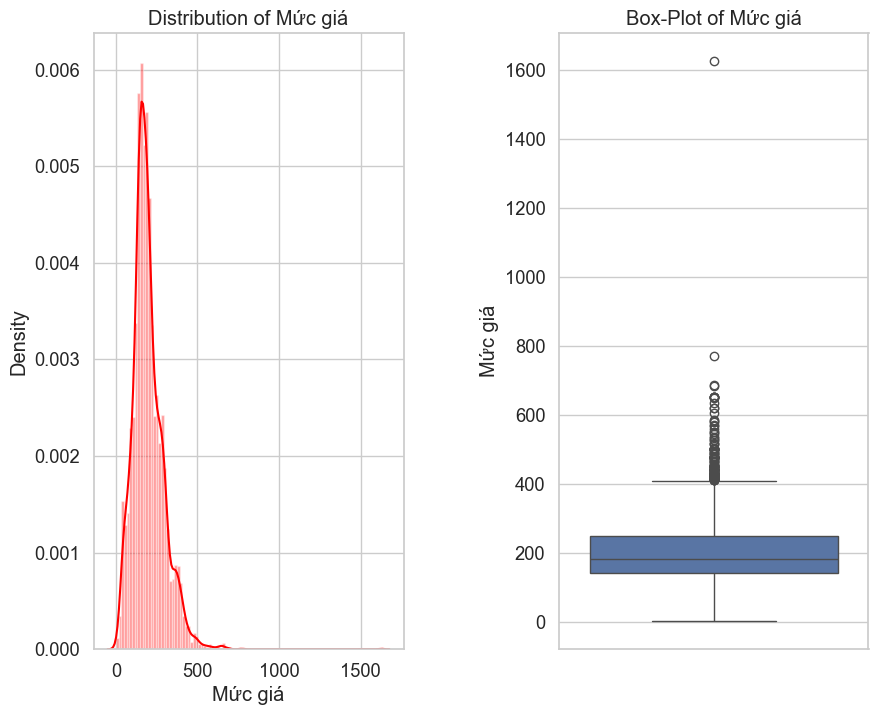

In [34]:
plot_numerical_variables(data[data['Loại hình']=='Biệt thự'], 'Mức giá', figsize = (10,8))

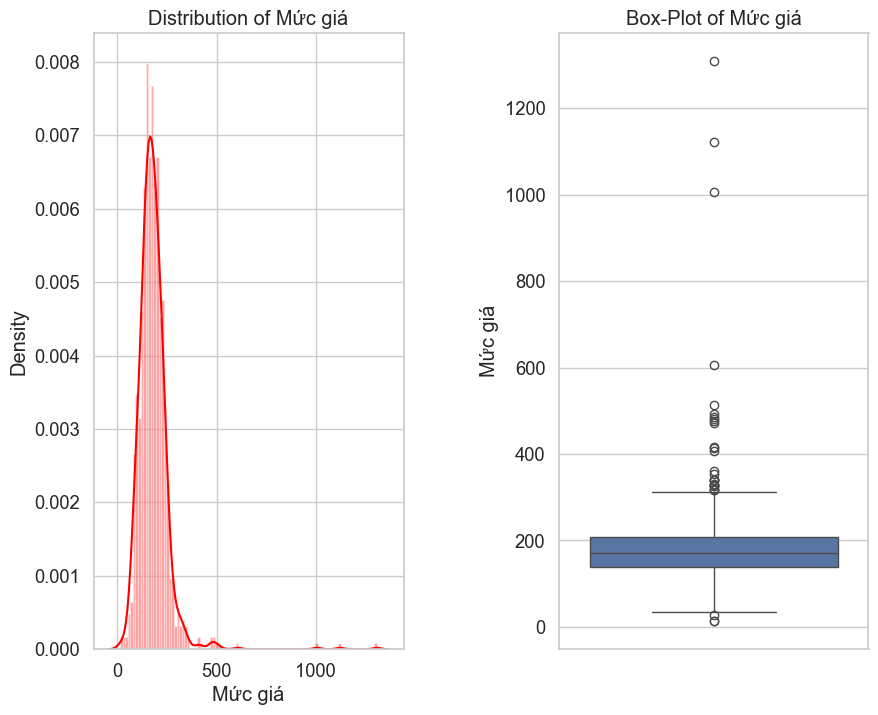

In [35]:
plot_numerical_variables(data[data['Loại hình']=='Chung cư mini'], 'Mức giá', figsize = (10,8))

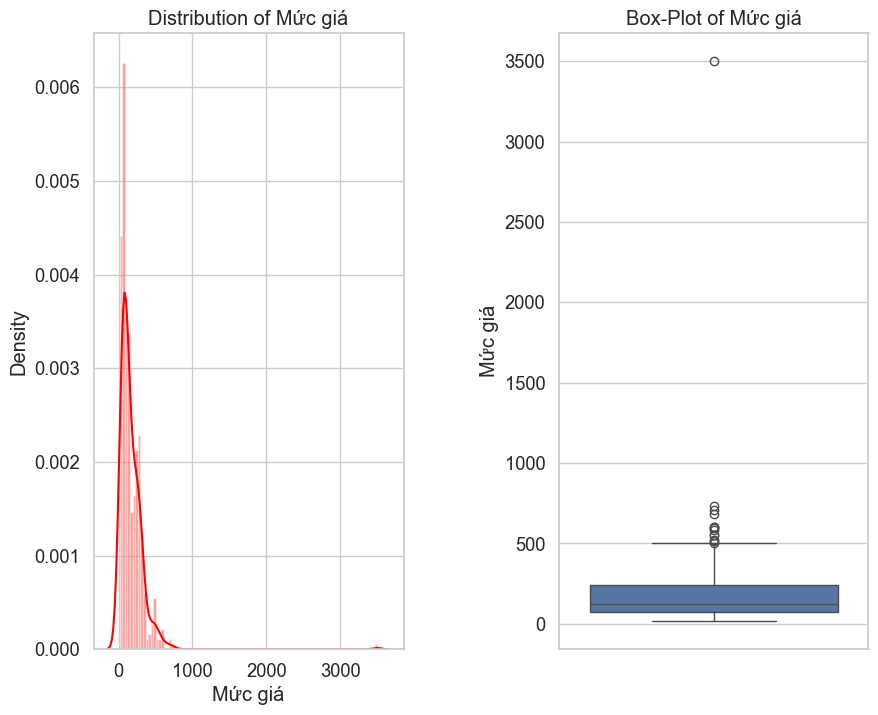

In [36]:
plot_numerical_variables(data[data['Loại hình']=='Shophouse'], 'Mức giá', figsize = (10,8))

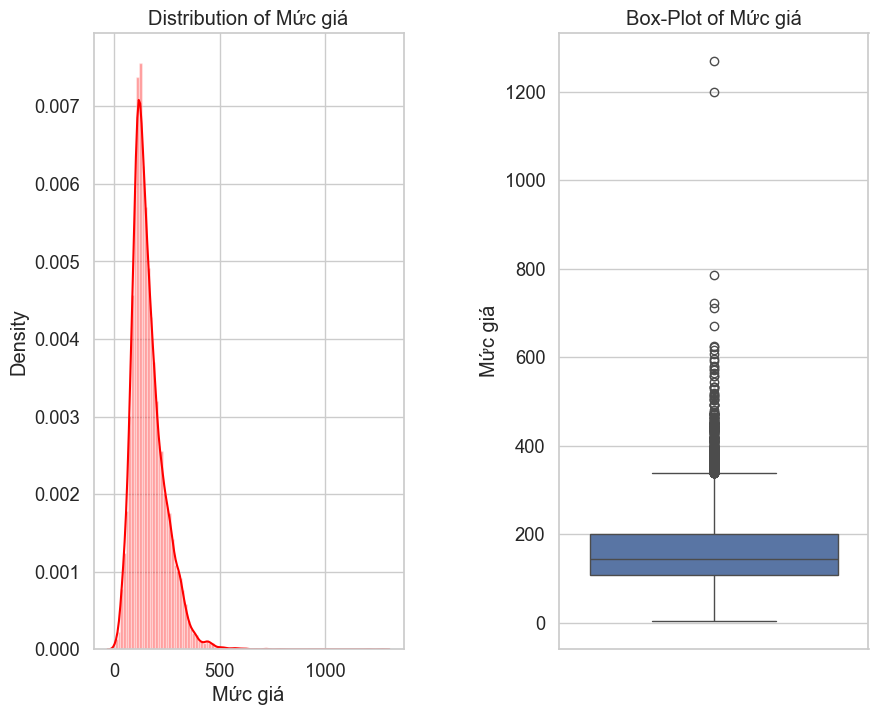

In [37]:
plot_numerical_variables(data[data['Loại hình']=='Nhà riêng'], 'Mức giá', figsize = (10,8))

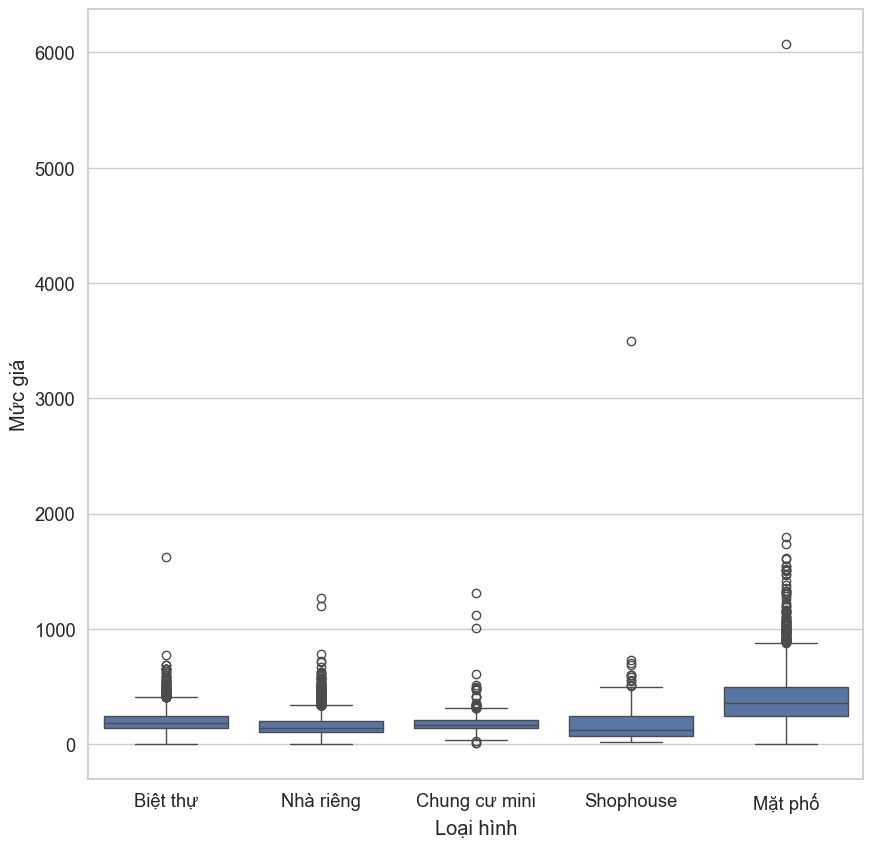

In [38]:
df = pd.concat([data['Mức giá'], data['Loại hình']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='Loại hình', y="Mức giá", data=df)

* The prices of villas primarily range from 170 million VND/m2 to 230 million VND/m2.
* The prices of private houses primarily range from 160 million VND/m2 to 200 million VND/m2.
* The prices of mini apartments primarily range from 170 million VND/m2 to 200 million VND/m2.
* The prices of shophouses primarily range from 70 million VND/m2 to 250 million VND/m2.
* The prices of street-front houses primarily range from 250 million VND/m2 to 500 million VND/m2.

=> Shophouses have the lowest price range, while street-front houses have the highest price range (250-500 million VND/m2). The price ranges of the other three types of houses are relatively similar.

#### Diện tích

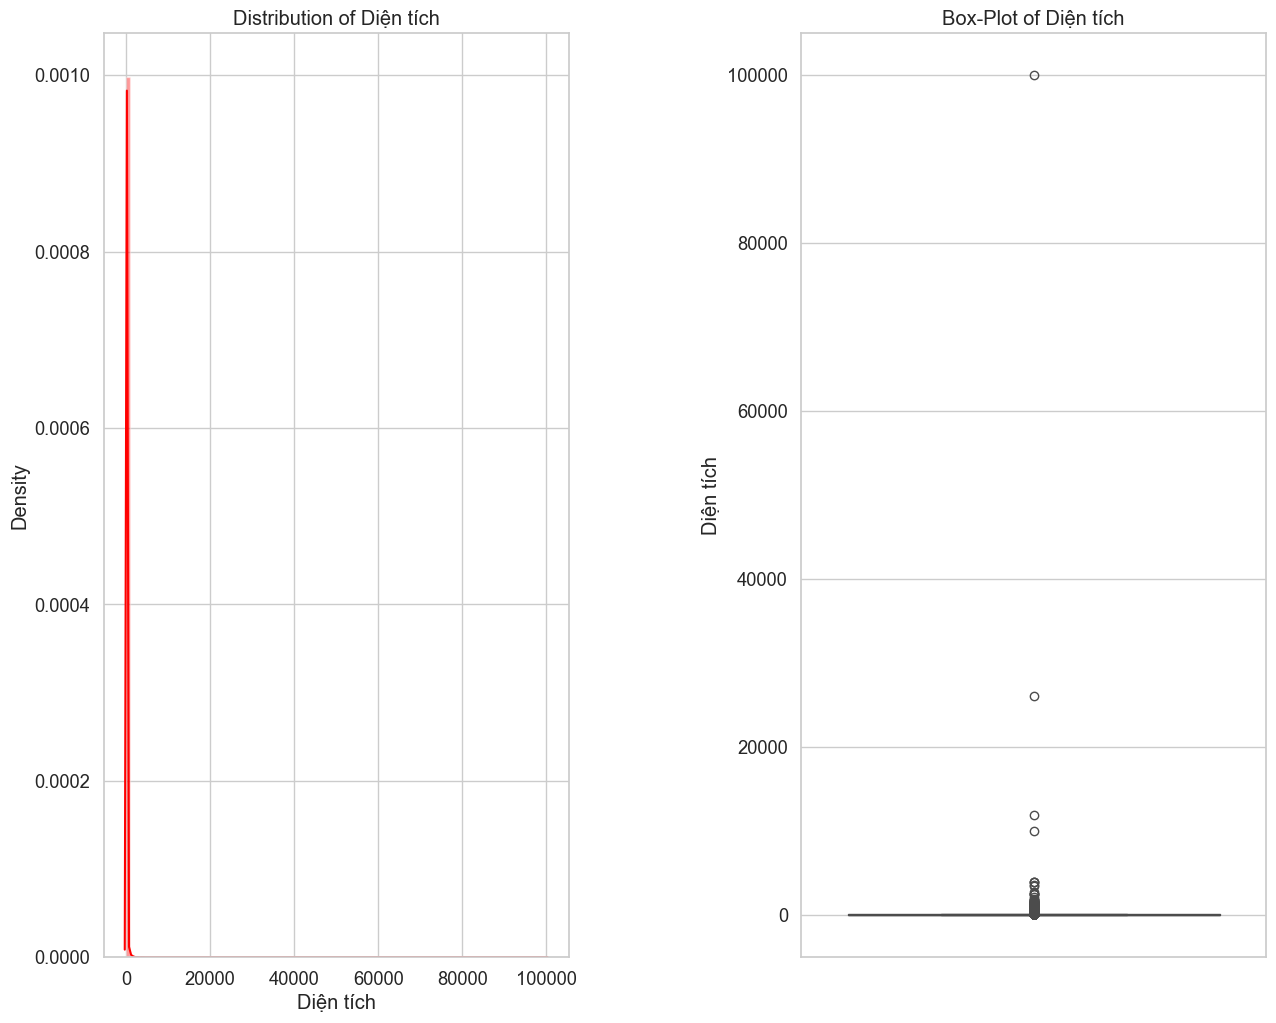

In [39]:
plot_numerical_variables(data, 'Diện tích', figsize = (15,12))

In [40]:
data[data['Diện tích']>5000]

Đường/Phố       Phường/Xã   Quận/Huyện Phân loại quận    Loại tin  \
5365              NaN        Cẩm Lĩnh        Ba Vì    Ngoại thành  Tin thường   
20246          Tố Hữu          Đại Mỗ  Nam Từ Liêm      Nội thành  Tin thường   
24323           Bồ Đề       Long Biên    Long Biên      Nội thành  Tin thường   
25128  Khuất Duy Tiến  Thanh Xuân Bắc   Thanh Xuân      Nội thành  Tin thường   

         Mã tin  Diện tích  Mức giá  Mặt tiền  Đường vào  ... Bán gấp  \
5365   39166440    12000.0      1.3       NaN        NaN  ...       0   
20246  36120271    10000.0     16.0       NaN        NaN  ...       0   
24323  36518815   100000.0      5.3     300.0       45.0  ...       0   
25128  39167255    26104.0     30.6     200.0       15.0  ...       0   

      Sân phơi  Nhà thoáng  Gần hồ  An ninh Hiện đại Chỗ để xe Thang máy  \
5365         0           0       0        0        0         0         0   
20246        0           0       1        1        1         0         1   
24323        0           1       1        0        0         0         1   
25128        0           0       0        0        0         1         0   

       Lô góc  Hỗ trợ vay  
5365        0           0  
20246       0           0  
24323       0           0  
25128       0           0  

[4 rows x 34 columns]

In [41]:
avg_price_by_area = data.groupby(pd.cut(data[data['Mức giá']>=0]['Diện tích'], bins=[0,40, 100, float('inf')], labels=['Small (<40m2)', 'Medium (40-100m2)', 'Large (>100m2)']))['Mức giá'].agg(['mean', 'max', 'min'])
avg_price_by_area

mean     max   min
Diện tích                                  
Small (<40m2)      144.800184  1475.0  21.2
Medium (40-100m2)  211.678486  3500.0  10.7
Large (>100m2)     274.123565  6071.4   0.6


House prices are categorized into three levels based on size: small (<40m2), medium (40-100m2), and large (>100m2). The average prices correspond accordingly to these size categories.

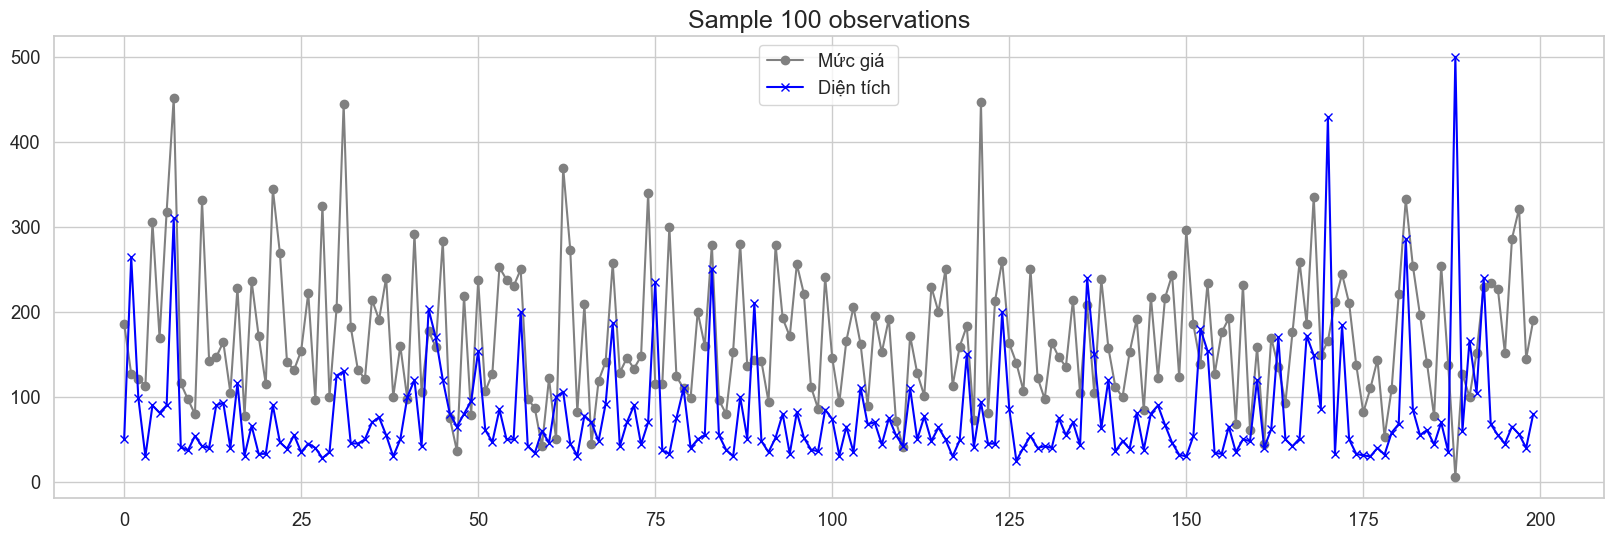

In [42]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(data.index[:200], data['Mức giá'][:200], color='grey', marker = 'o')
ax.plot(data.index[:200], data['Diện tích'][:200], color='blue', marker = 'x')
ax.set_title('Sample 100 observations', size=18)
plt.legend(['Mức giá', 'Diện tích'])

In [43]:
average_area_by_district = data.groupby('Quận/Huyện')['Diện tích'].agg(['mean', 'min', 'max']).reset_index()
average_area_by_district.columns = ['Quận/Huyện', 'Diện tích trung bình','Diện tích tối thiểu','Diện tích tối đa']

combined_data = pd.merge(average_area_by_district, average_price_by_district, on='Quận/Huyện')
combined_data = combined_data.sort_values(by='Diện tích trung bình', ascending=False).reset_index(drop=True)

desired_order = ['Quận/Huyện', 'Diện tích trung bình', 'Mức giá trung bình', 'Diện tích tối thiểu', 'Mức giá tối thiểu', 'Diện tích tối đa', 'Mức giá tối đa']
combined_data = combined_data[desired_order]

combined_data

Quận/Huyện  Diện tích trung bình  Mức giá trung bình  \
0          Ba Vì           1715.944444           12.955556   
1       Phúc Thọ            875.000000           14.000000   
2        Sóc Sơn            465.882353           26.494118   
3     Thạch Thất            331.547368           44.157895   
4        Mê Linh            239.998851           44.037931   
5         Tây Hồ            147.808015          284.054800   
6      Hoàn Kiếm            147.038687          563.945000   
7       Quốc Oai            141.491781           39.024658   
8        Sơn Tây            138.666667           69.869231   
9        Gia Lâm            134.030189          150.853669   
10     Long Biên            130.785127          151.478883   
11    Đan Phượng            123.439394           74.893939   
12      Đông Anh            117.794855           84.446821   
13      Hoài Đức            116.612192           98.675000   
14   Nam Từ Liêm            114.992656          186.237865   
15      Cầu Giấy            102.450819          270.239114   
16   Bắc Từ Liêm            102.185898          171.357242   
17    Thanh Xuân             96.785365          213.436178   
18       Ứng Hòa             95.133333           39.333333   
19       Ba Đình             94.961433          267.391508   
20       Hà Đông             91.245549          160.125822   
21    Thường Tín             90.317391          117.500000   
22     Hoàng Mai             83.409287          159.256880   
23  Hai Bà Trưng             80.988165          266.304616   
24       Đống Đa             77.978519          255.531870   
25     Thanh Trì             66.558462          121.578462   
26     Chương Mỹ             66.429167           46.616667   
27     Thanh Oai             48.634808           50.632692   

    Diện tích tối thiểu  Mức giá tối thiểu  Diện tích tối đa  Mức giá tối đa  
0                 80.00                1.3           12000.0            32.5  
1                400.00                7.0            1350.0            21.0  
2                 58.00                3.5            1800.0           109.8  
3                 67.00                7.5            1589.0           177.8  
4                 42.00               18.0             426.0           121.9  
5                 20.00               28.3            4000.0          1625.0  
6                 10.00                2.7            1305.0          1794.1  
7                 40.00               10.6             915.0            70.0  
8                 65.00               15.6             423.0           146.2  
9                 26.00               25.0             500.0           350.0  
10                15.00                5.3          100000.0           636.4  
11                37.00                6.0             500.0           136.3  
12                32.13               17.8            1200.0           245.5  
13                30.00                7.5            1590.0           215.4  
14                25.70               16.0           10000.0           751.6  
15                20.00               20.0            4000.0           888.9  
16                24.00               34.5             800.0          3500.0  
17                14.00               20.7           26104.0           707.3  
18                73.40               10.0             137.0            76.0  
19                13.00                0.6            3920.0          1333.3  
20                20.00               15.9             700.0           545.5  
21                40.00               44.8             300.0           194.4  
22                12.00               17.0            2785.0          1464.3  
23                10.00               24.0             618.0          6071.4  
24                10.00               32.7             802.0          1311.1  
25                25.00               12.5             388.0           361.1  
26                30.00                9.3             450.0           105

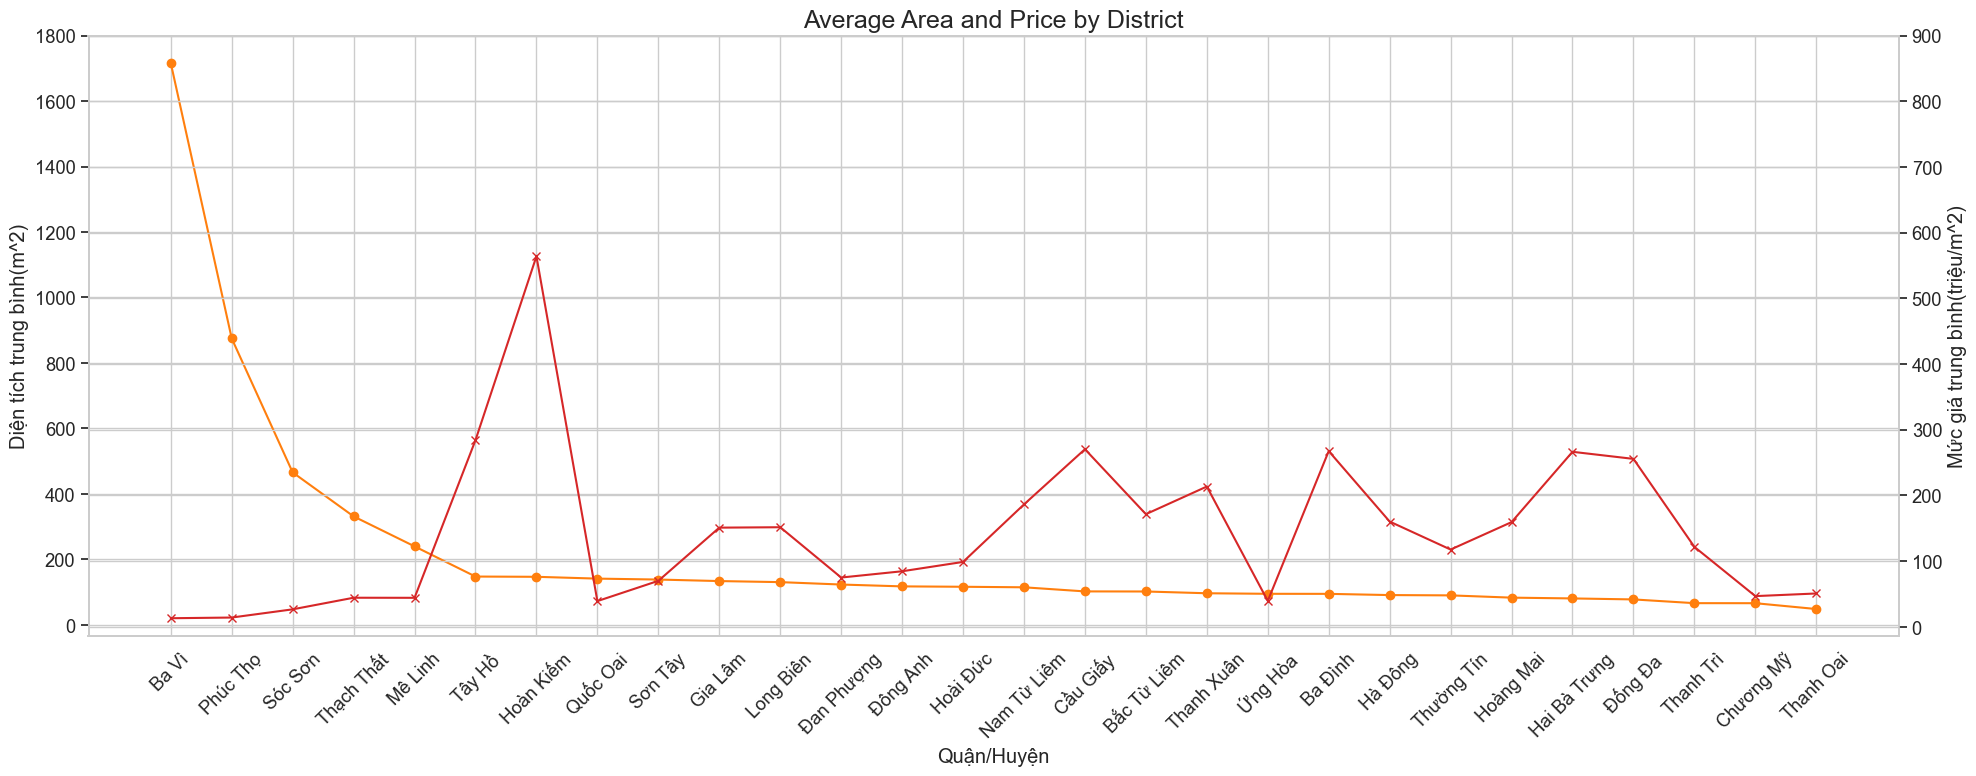

In [44]:
fig, ax1 = plt.subplots(figsize=(20, 8))

color = 'tab:orange'
ax1.set_xlabel('Quận/Huyện')
ax1.set_ylabel('Diện tích trung bình(m^2)')
ax1.plot(combined_data['Quận/Huyện'], combined_data['Diện tích trung bình'], color=color, marker='o')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45) 

yticks_left = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]
ax1.set_yticks(yticks_left)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mức giá trung bình(triệu/m^2)')
ax2.plot(combined_data['Quận/Huyện'], combined_data['Mức giá trung bình'], color=color, marker='x')
ax2.tick_params(axis='y')

yticks_right = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
ax2.set_yticks(yticks_right)
plt.title('Average Area and Price by District', size=18)
ax1.grid(True)
plt.tight_layout()
plt.show()


* As you can see in the graph, the average land area for sale in various districts is quite similar, except for some suburban districts: Ba Vì, Phúc Thọ, Sóc Sơn, and Thạch Thất. 
* In contrast, the average prices in the central districts of Hanoi are very high: Hoàn Kiếm at 550 million VND/m2; Tây Hồ, Cầu Giấy, Ba Đình, Hai Bà Trưng, and Đống Đa around 300 million VND/m2.

=> Indeed, for properties of the same size, the prices can vary significantly depending on the location where they are being sold, whether it's in the city center or the suburbs.

### Mặt tiền

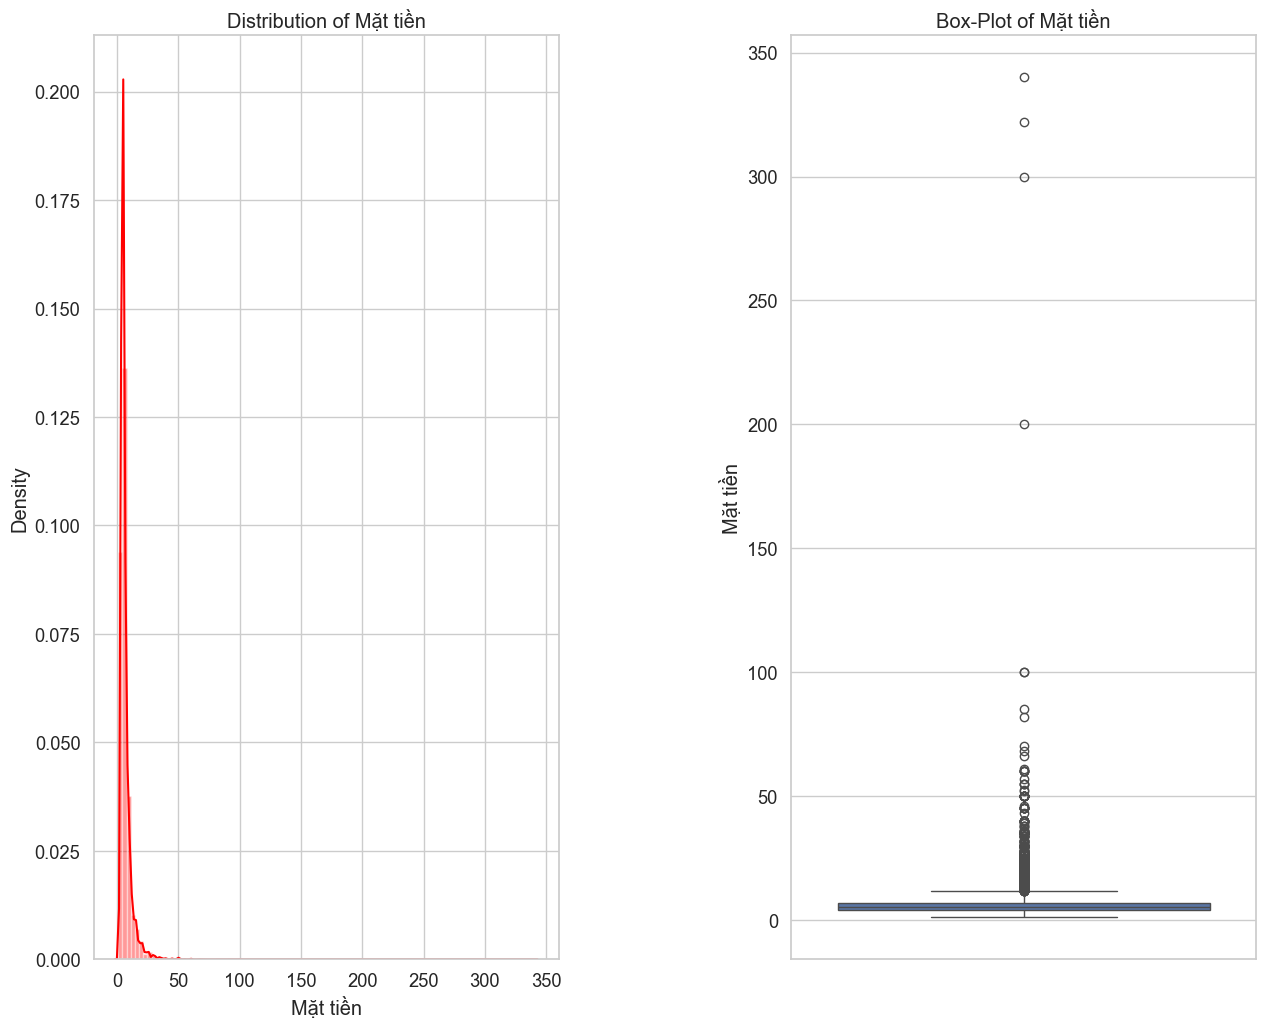

In [45]:
plot_numerical_variables(data, 'Mặt tiền', figsize = (15,12))

In [46]:
avg_price_by_mattien = data.groupby(pd.cut(data[data['Mức giá']>=0]['Mặt tiền'], bins=[0,5, float('inf')], labels=['Small (<5m)', 'Large (>5m)']))['Mức giá'].agg(['mean', 'max', 'min'])
avg_price_by_mattien

mean     max   min
Mặt tiền                             
Small (<5m)  182.061158  1794.1  13.5
Large (>5m)  271.003314  1738.1   0.6

Frontage is divided into two categories: small frontage (<5m) and large frontage (>5m).

##### mặt tiền và giá theo quận

In [47]:
average_mattien_by_district = data.groupby('Quận/Huyện')['Mặt tiền'].agg(['mean', 'min', 'max']).reset_index()
average_mattien_by_district.columns = ['Quận/Huyện', 'Mặt tiền trung bình','Mặt tiền tối thiểu','Mặt tiền tối đa']

combined_data = pd.merge(average_mattien_by_district, average_price_by_district, on='Quận/Huyện')
combined_data = combined_data.sort_values(by='Mặt tiền trung bình', ascending=False).reset_index(drop=True)

desired_order = ['Quận/Huyện', 'Mặt tiền trung bình', 'Mức giá trung bình', 'Mặt tiền tối thiểu', 'Mức giá tối thiểu', 'Mặt tiền tối đa', 'Mức giá tối đa']
combined_data = combined_data[desired_order]

combined_data

Quận/Huyện  Mặt tiền trung bình  Mức giá trung bình  Mặt tiền tối thiểu  \
0        Sóc Sơn            16.600000           26.494118                4.50   
1     Thạch Thất            14.612245           44.157895                5.00   
2          Ba Vì            13.000000           12.955556                5.00   
3        Mê Linh            12.006667           44.037931                3.00   
4         Tây Hồ             8.302217          284.054800                3.00   
5        Gia Lâm             7.962154          150.853669                3.20   
6    Nam Từ Liêm             7.867265          186.237865                1.00   
7      Hoàn Kiếm             7.745822          563.945000                2.20   
8       Quốc Oai             7.619200           39.024658                3.50   
9       Hoài Đức             7.390750           98.675000                3.00   
10   Bắc Từ Liêm             7.195836          171.357242                2.78   
11      Cầu Giấy             6.982510          270.239114                2.00   
12      Đông Anh             6.505556           84.446821                2.00   
13       Ba Đình             6.391020          267.391508                2.50   
14       Sơn Tây             6.331250           69.869231                4.00   
15       Hà Đông             6.330839          160.125822                3.00   
16     Long Biên             6.283932          151.478883                2.00   
17    Đan Phượng             6.257692           74.893939                3.80   
18     Hoàng Mai             6.197632          159.256880                2.20   
19     Thanh Trì             5.951246          121.578462                1.00   
20       Đống Đa             5.794427          255.531870                2.00   
21    Thanh Xuân             5.723472          213.436178                2.70   
22       Ứng Hòa             5.666667           39.333333                5.00   
23    Thường Tín             5.635000          117.500000                3.80   
24  Hai Bà Trưng             5.610121          266.304616                1.60   
25     Chương Mỹ             5.050000           46.616667                3.20   
26     Thanh Oai             4.196667           50.632692                3.00   
27      Phúc Thọ                  NaN           14.000000                 NaN   

    Mức giá tối thiểu  Mặt tiền tối đa  Mức giá tối đa  
0                 3.5            50.00           109.8  
1                 7.5            60.00           177.8  
2                 1.3            25.00            32.5  
3                18.0            38.00           121.9  
4                28.3            68.00          1625.0  
5                25.0            37.00           350.0  
6                16.0           340.00           751.6  
7                 2.7            55.00          1794.1  
8                10.6            25.00            70.0  
9                 7.5           322.00           215.4  
10               34.5            40.00          3500.0  
11               20.0            66.00           888.9  
12               17.8            30.00           245.5  
13                0.6            85.00          1333.3  
14               15.6            10.00           146.2  
15               15.9            50.00           545.5  
16                5.3           300.00           636.4  
17                6.0            20.00           136.3  
18               17.0           100.00          1464.3  
19               12.5            45.00           361.1  
20               32.7            82.00          1311.1  
21               20.7           200.00           707.3  
22               10.0             7.00            76.0  
23               44.8            15.00           194.4  
24               24.0            57.00          6071.4  
25                9.3            16.10           105.1  
26               17.0             7.39            90.7  
27                7.0              NaN            21.0

The average frontage of properties in the districts and counties mainly ranges from 5 meters to 8 meters.

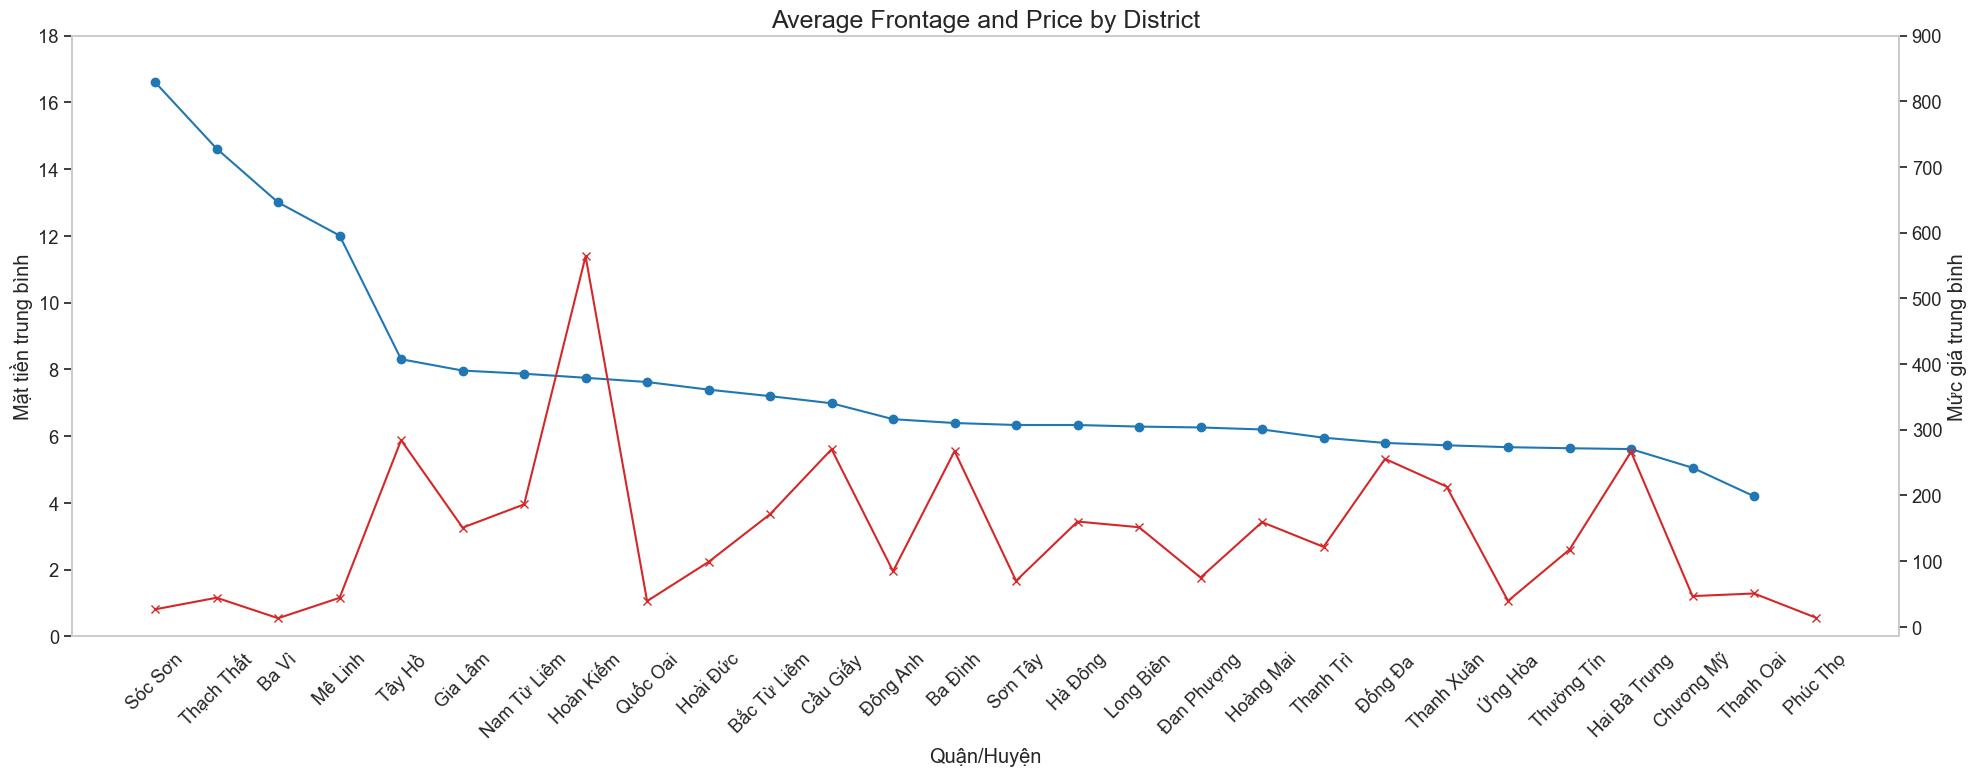

In [48]:
fig, ax1 = plt.subplots(figsize=(20, 8))

color = 'tab:blue'
ax1.set_xlabel('Quận/Huyện')
ax1.set_ylabel('Mặt tiền trung bình')
ax1.plot(combined_data['Quận/Huyện'], combined_data['Mặt tiền trung bình'], color=color, marker='o')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45) 

yticks_left = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
ax1.set_yticks(yticks_left)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mức giá trung bình')
ax2.plot(combined_data['Quận/Huyện'], combined_data['Mức giá trung bình'], color=color, marker='x')
ax2.tick_params(axis='y')
yticks_right = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
ax2.set_yticks(yticks_right)

plt.title('Average Frontage and Price by District', size=18)
ax1.grid(linewidth=0)
ax2.grid(linewidth=0)
ax1.grid(True)
plt.tight_layout()
plt.show()


As you can see from the graph, the "Average Frontage and Price by District" chart closely resembles the "Average Area by District" chart. Despite having similar average frontages, house prices in the central districts of the city are significantly higher than those in the peripheral districts and suburban areas.

### Đường vào 

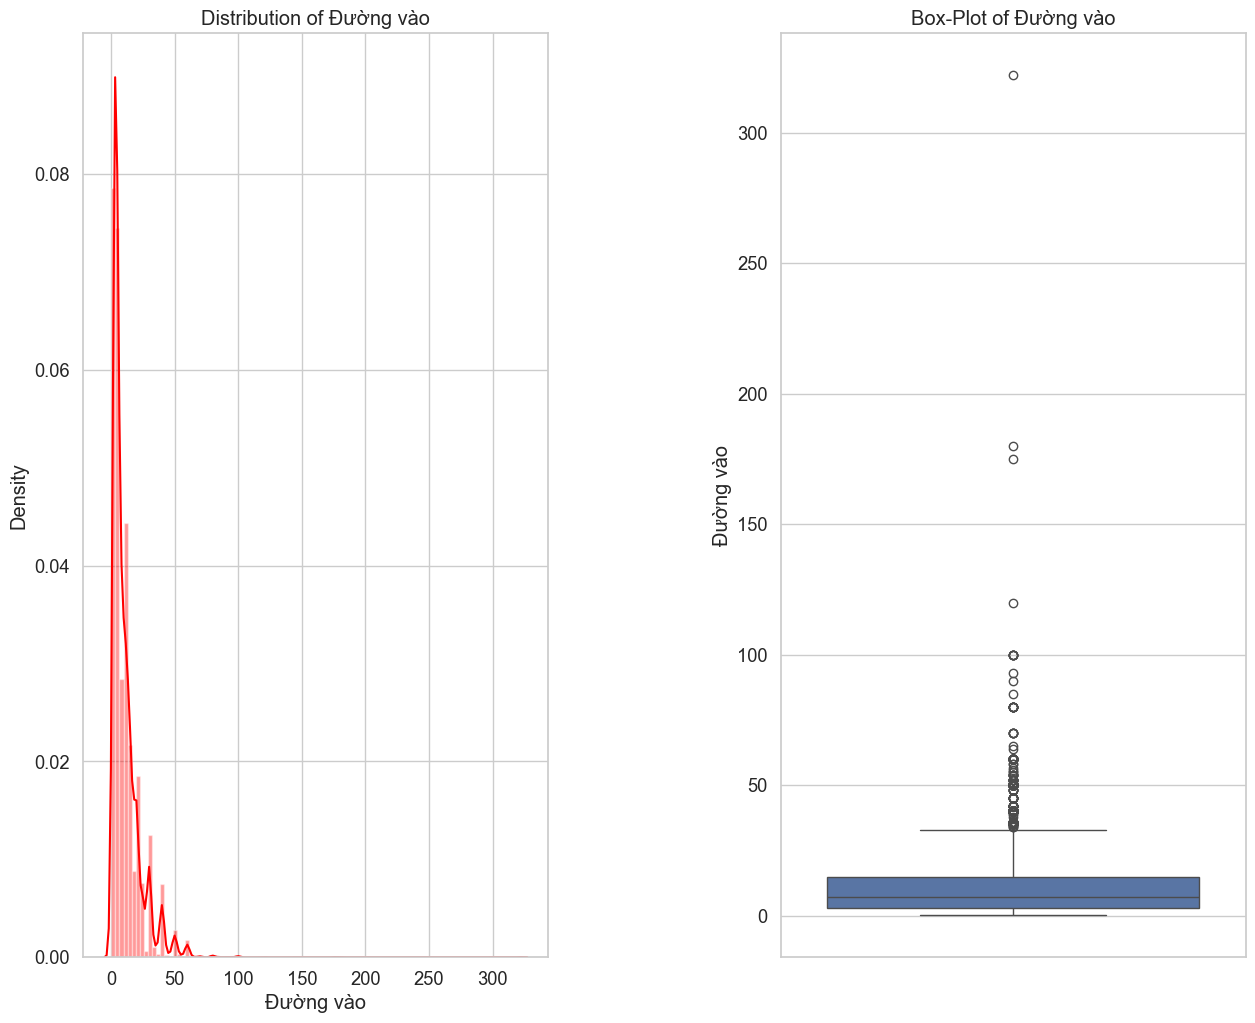

In [49]:
plot_numerical_variables(data, 'Đường vào', figsize = (15,12))

In [50]:
avg_price_by_duongvao = data.groupby(pd.cut(data[data['Mức giá']>=0]['Đường vào'], bins=[0,3, float('inf')], labels=['Small (<3m)', 'Large (>3m)']))['Mức giá'].agg(['mean', 'max', 'min'])
avg_price_by_duongvao

mean     max   min
Đường vào                            
Small (<3m)  123.916104   592.0  13.5
Large (>3m)  231.724441  1547.6   5.3

Access roads are categorized into two types: small access roads (<3m) and large access roads (>3m).

In [51]:
average_area_by_district = data.groupby('Quận/Huyện')['Đường vào'].agg(['mean', 'min', 'max']).reset_index()
average_area_by_district.columns = ['Quận/Huyện', 'Đường vào trung bình','Đường vào tối thiểu','Đường vào tối đa']

combined_data = pd.merge(average_area_by_district, average_price_by_district, on='Quận/Huyện')
combined_data = combined_data.sort_values(by='Đường vào trung bình', ascending=False).reset_index(drop=True)

desired_order = ['Quận/Huyện', 'Đường vào trung bình', 'Mức giá trung bình', 'Đường vào tối thiểu', 'Mức giá tối thiểu', 'Đường vào tối đa', 'Mức giá tối đa']
combined_data = combined_data[desired_order]

combined_data

Quận/Huyện  Đường vào trung bình  Mức giá trung bình  \
0     Thường Tín             18.552632          117.500000   
1     Đan Phượng             18.500000           74.893939   
2        Sơn Tây             18.206897           69.869231   
3        Mê Linh             17.354545           44.037931   
4        Gia Lâm             15.692754          150.853669   
5      Hoàn Kiếm             14.984793          563.945000   
6         Tây Hồ             13.026711          284.054800   
7        Hà Đông             12.972832          160.125822   
8     Thạch Thất             12.808511           44.157895   
9    Nam Từ Liêm             11.939716          186.237865   
10  Hai Bà Trưng             11.379797          266.304616   
11      Cầu Giấy             11.201331          270.239114   
12   Bắc Từ Liêm             10.841365          171.357242   
13     Long Biên             10.178199          151.478883   
14      Đông Anh             10.083065           84.446821   
15         Ba Vì             10.000000           12.955556   
16       Đống Đa              9.782890          255.531870   
17    Thanh Xuân              9.723846          213.436178   
18     Hoàng Mai              9.672171          159.256880   
19       Ba Đình              9.498052          267.391508   
20      Quốc Oai              8.645143           39.024658   
21     Thanh Trì              8.592391          121.578462   
22      Hoài Đức              8.537279           98.675000   
23       Sóc Sơn              6.500000           26.494118   
24       Ứng Hòa              6.000000           39.333333   
25     Thanh Oai              5.888235           50.632692   
26     Chương Mỹ              5.526471           46.616667   
27      Phúc Thọ                   NaN           14.000000   

    Đường vào tối thiểu  Mức giá tối thiểu  Đường vào tối đa  Mức giá tối đa  
0                 5.000               44.8              33.0           194.4  
1                 2.500                6.0              60.0           136.3  
2                 6.000               15.6              35.0           146.2  
3                 3.500               18.0             100.0           121.9  
4                 2.000               25.0              70.0           350.0  
5                 2.000                2.7              52.0          1794.1  
6                 1.100               28.3              80.0          1625.0  
7                 1.700               15.9              70.0           545.5  
8                 5.000                7.5              22.0           177.8  
9                 1.000               16.0             322.0           751.6  
10                1.000               24.0             100.0          6071.4  
11                2.000               20.0              90.0           888.9  
12                1.500               34.5             175.0          3500.0  
13                0.200                5.3              60.0           636.4  
14                2.200               17.8              40.0           245.5  
15                8.000                1.3              12.0            32.5  
16                1.300               32.7             180.0          1311.1  
17                1.800               20.7              60.0           707.3  
18                1.000               17.0              80.0          1464.3  
19                1.500                0.6             100.0          1333.3  
20                1.012               10.6              42.0            70.0  
21                2.000               12.5              50.0           361.1  
22                2.000                7.5              70.0           215.4  
23                3.500                3.5              10.0           109.8  
24                5.000               10.0               7.0            76.0  
25                2.000               17.0              30.0            90.7  
26                2.000                9.3              25.0           105

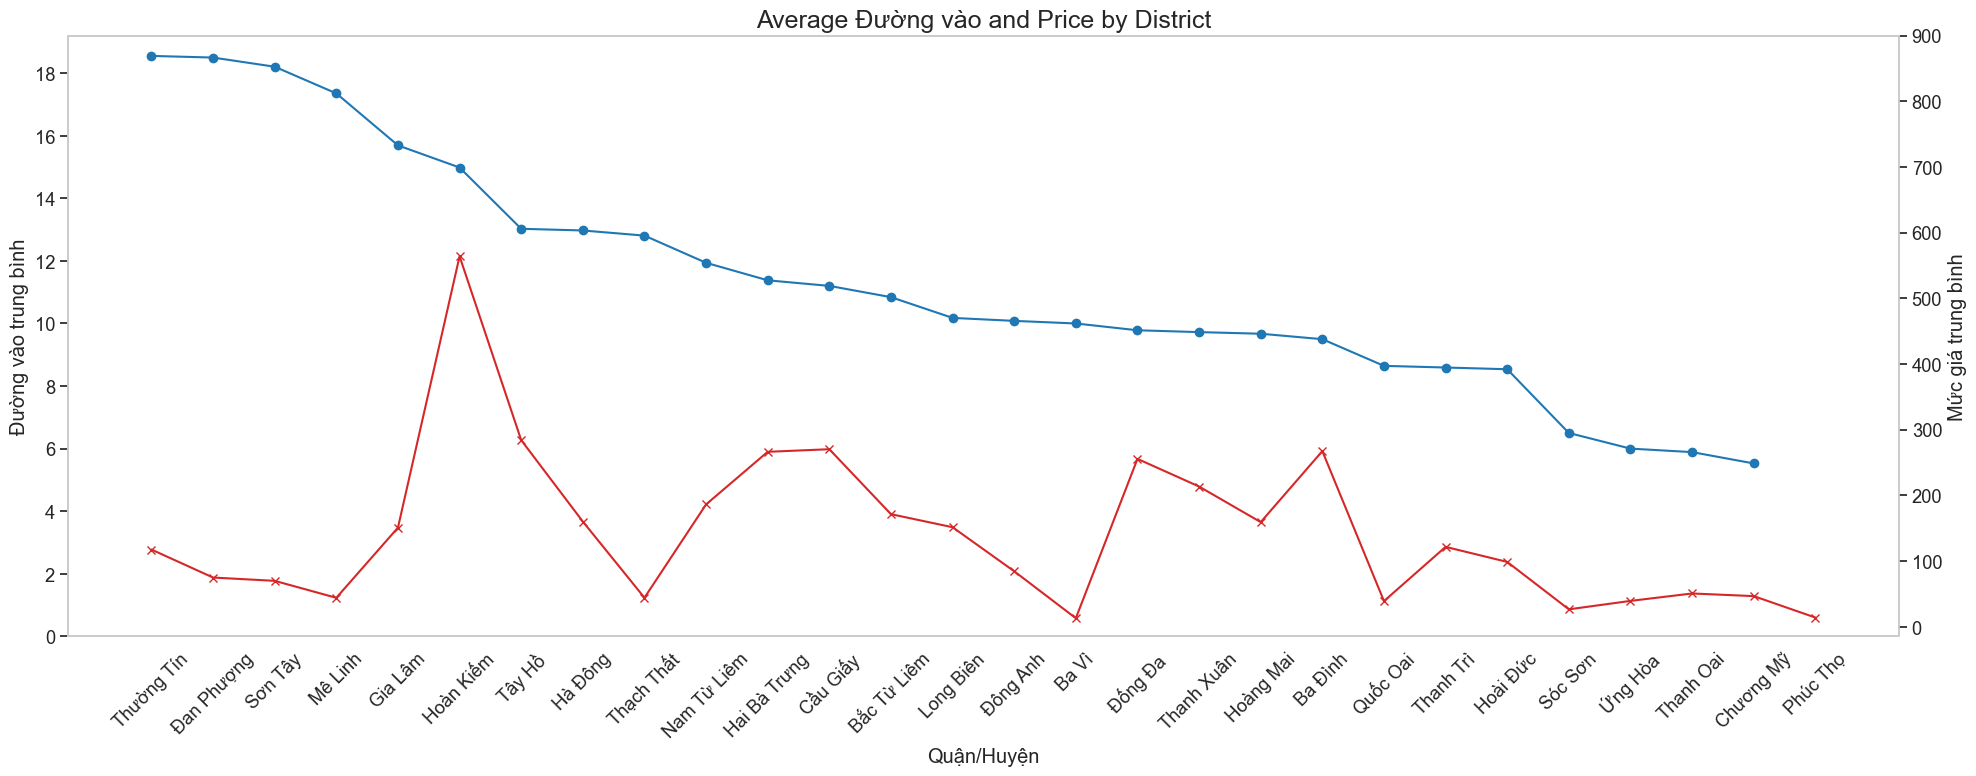

In [52]:
fig, ax1 = plt.subplots(figsize=(20, 8))


color = 'tab:blue'
ax1.set_xlabel('Quận/Huyện')
ax1.set_ylabel('Đường vào trung bình')
ax1.plot(combined_data['Quận/Huyện'], combined_data['Đường vào trung bình'], color=color, marker='o')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45) 


yticks_left = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
ax1.set_yticks(yticks_left)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mức giá trung bình')
ax2.plot(combined_data['Quận/Huyện'], combined_data['Mức giá trung bình'], color=color, marker='x')
ax2.tick_params(axis='y')

yticks_right = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
ax2.set_yticks(yticks_right)
ax1.grid(linewidth=0)
ax2.grid(linewidth=0)
plt.title('Average Đường vào and Price by District', size=18)
plt.tight_layout()
plt.show()

The line chart depicting the average access road width and price by district demonstrates similarity with both of the above-mentioned charts.

### Số tầng

In [53]:
data['Số tầng'].value_counts().to_frame().rename(columns = {'Số tầng':'Số lượng'})

count
Số tầng       
5.0       7227
4.0       5455
6.0       2334
3.0       2024
7.0       1726
8.0        876
2.0        562
9.0        516
1.0        475
10.0       212
11.0        33
12.0        19
15.0         8
24.0         7
13.0         5
16.0         5
14.0         2
35.0         1
50.0         1
19.0         1
20.0         1
21.0         1

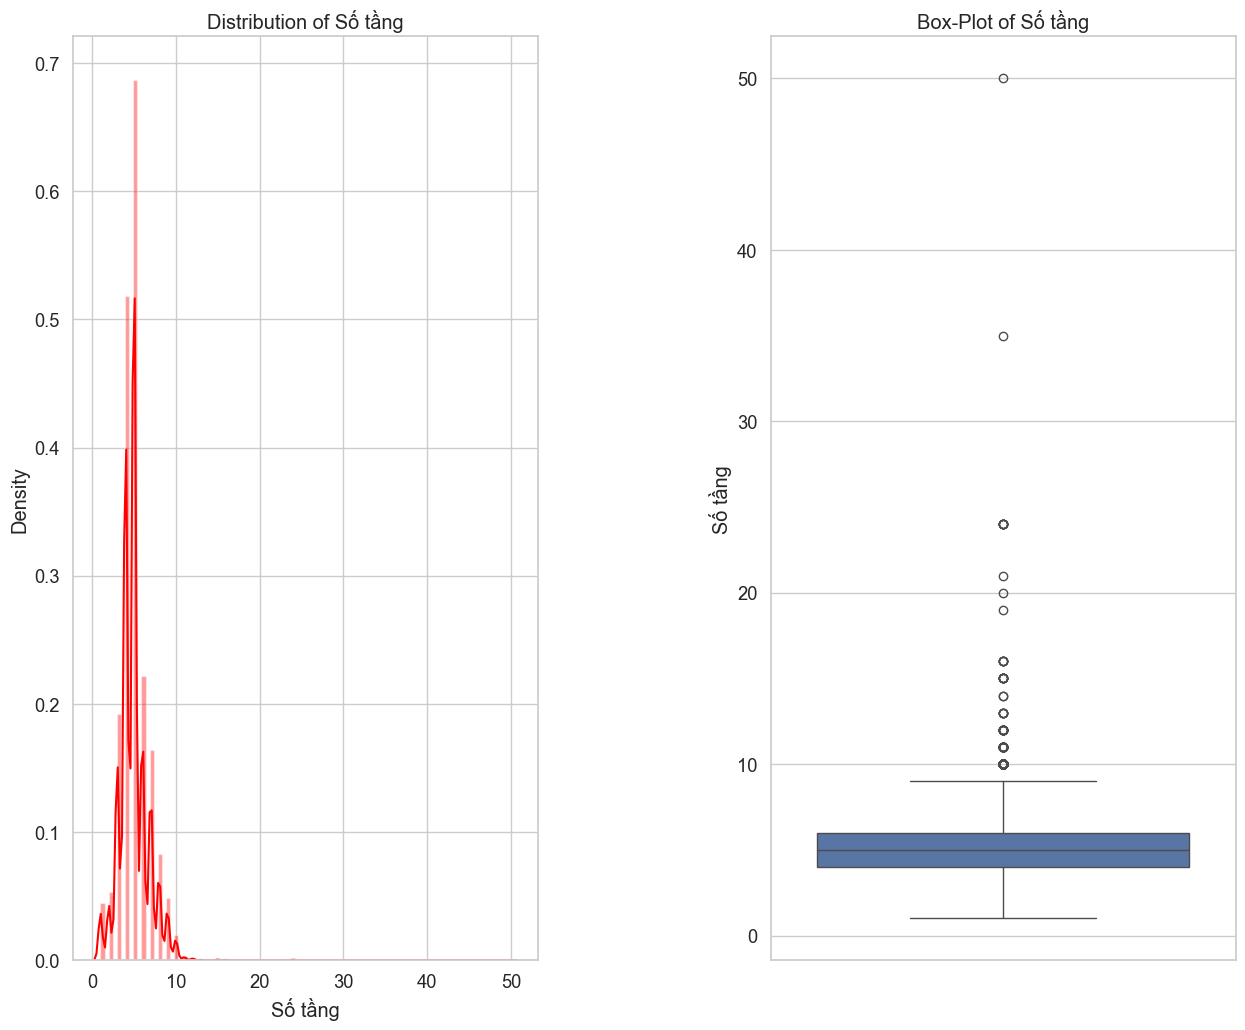

In [54]:
plot_numerical_variables(data, 'Số tầng', figsize = (15,12))


The types of houses listed for sale on the website mainly range from 3 to 7 floors, although there are still some outliers appearing, such as those with 24, 35, and 50 floors.

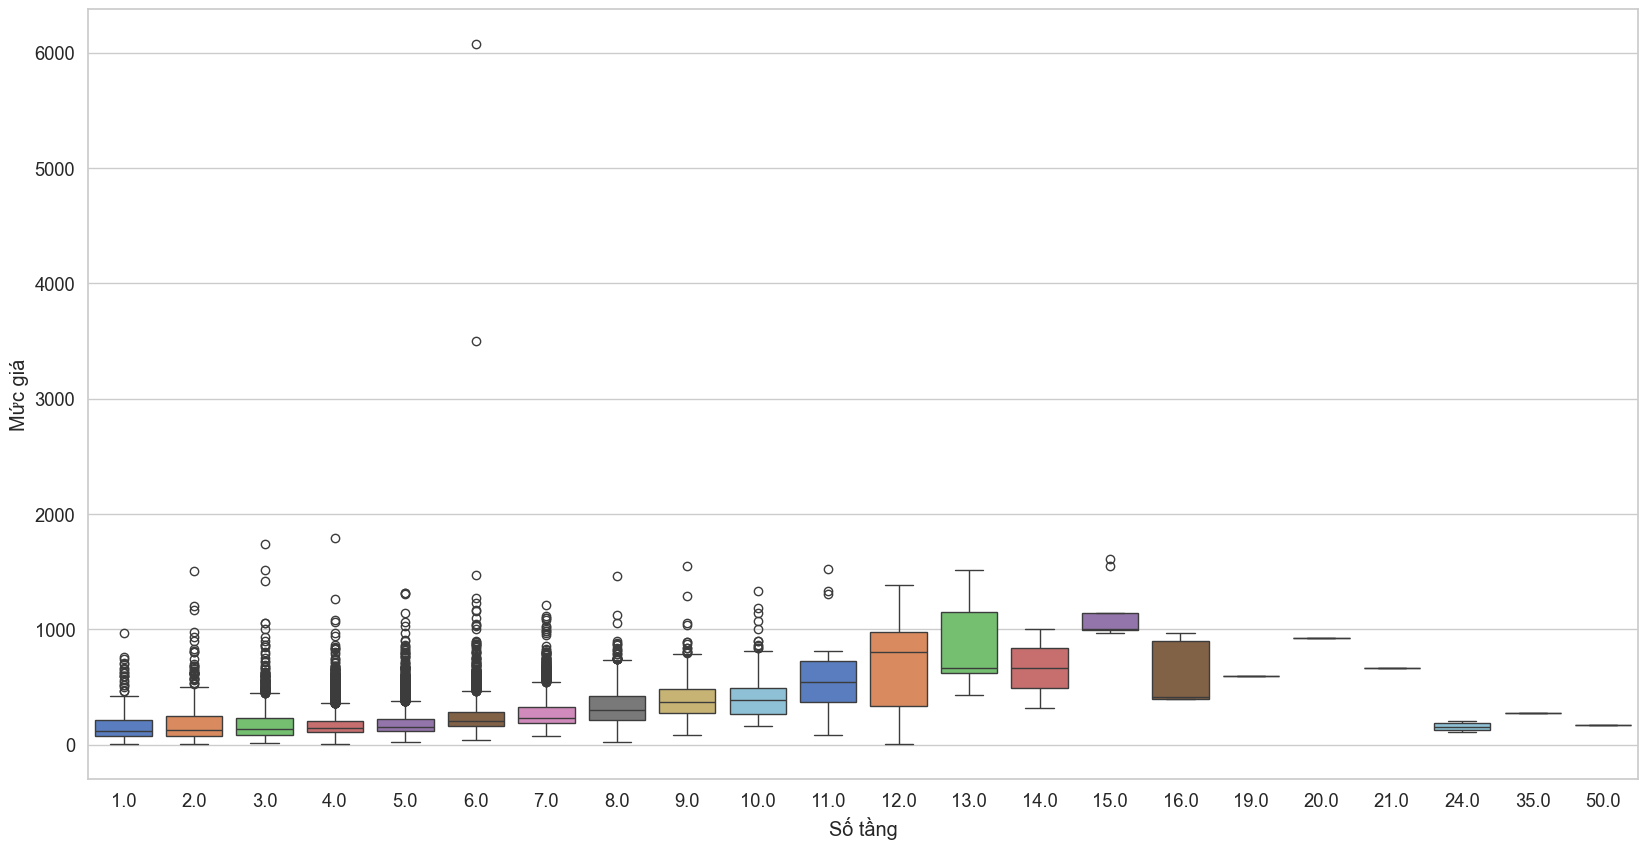

In [55]:
df = pd.concat([data['Mức giá'], data['Số tầng']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Số tầng', y="Mức giá", data=df,palette="muted")

In [56]:
avg_price_by_floor = data.groupby(pd.cut(data[data['Mức giá'] >= 0]['Số tầng'], bins=[1, 4, 7, float('inf')], labels=['Nhà thấp tầng(1-3 tầng)', 'Nhà trung tầng(4-6 tầng)', 'Nhà cao tầng(>= 7 tầng)']))['Mức giá'].agg(['mean', 'max', 'min'])
avg_price_by_floor

mean     max   min
Số tầng                                           
Nhà thấp tầng(1-3 tầng)   177.526837  1794.1   5.3
Nhà trung tầng(4-6 tầng)  215.683255  6071.4  23.7
Nhà cao tầng(>= 7 tầng)   383.684301  1612.9   2.7

The number of floors of a house is categorized into three levels: low floor(<1-3 floors), medium floor (<4-6 floors), and high floor (>= 7 floors), with corresponding average prices. Generally, the taller the house is, the higher the price is, and vice versa.

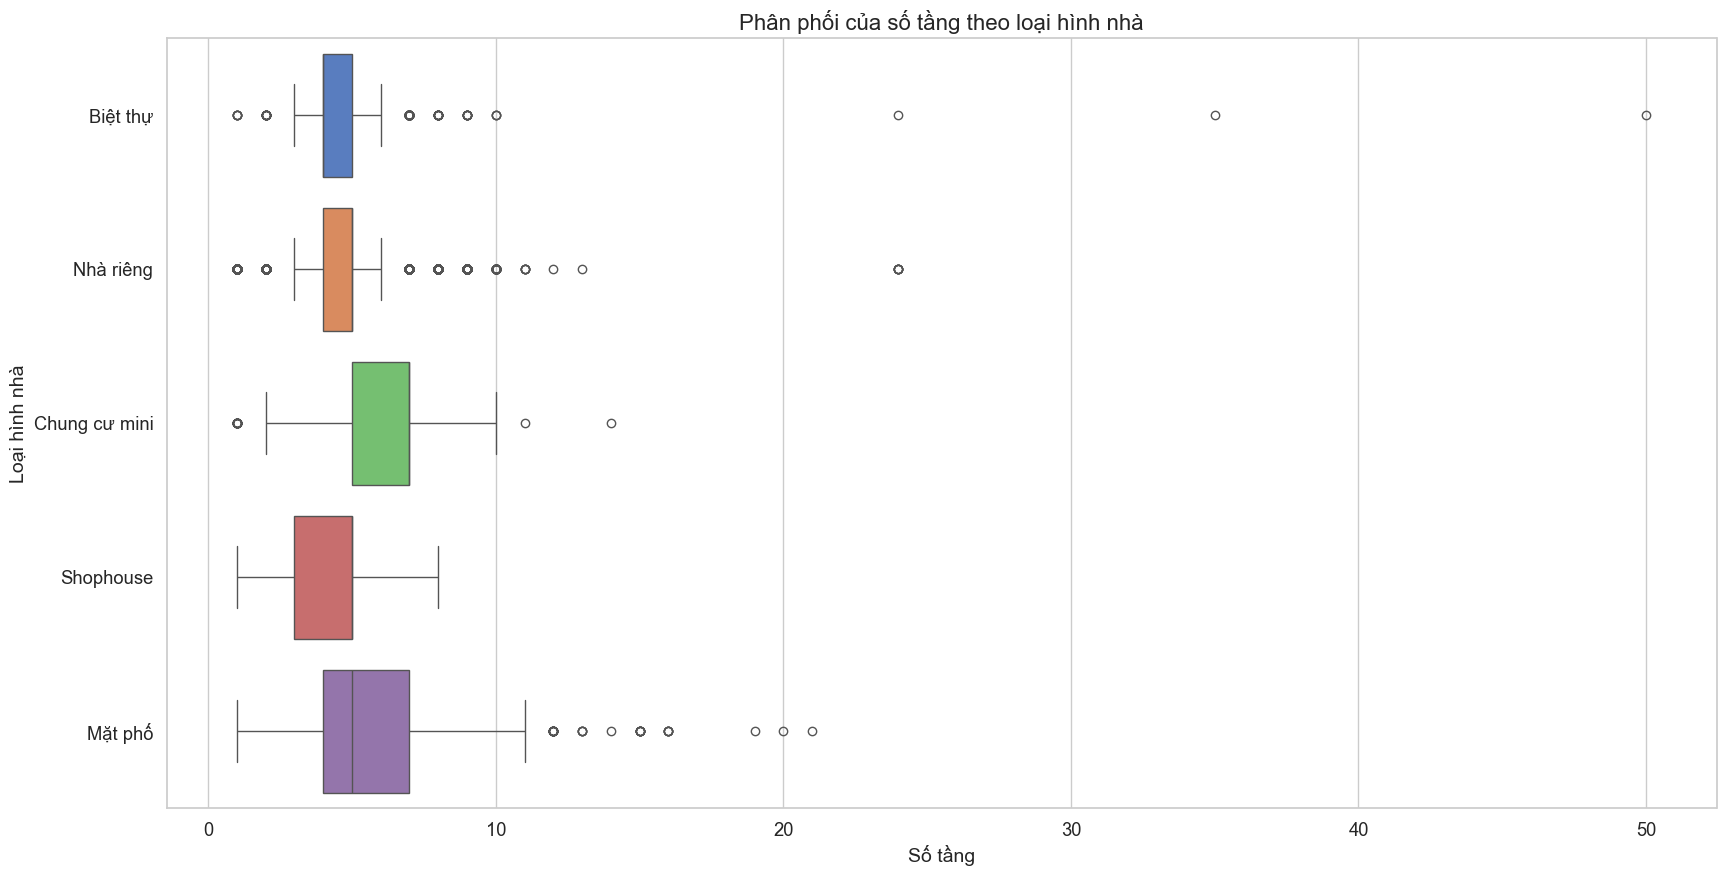

In [57]:
df = pd.concat([data[['Mức giá', 'Số tầng', 'Loại hình']]], axis=1)
# Vẽ box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Số tầng', y="Loại hình", data=df, palette="muted")
plt.title('Phân phối của số tầng theo loại hình nhà', fontsize=16)
plt.xlabel('Số tầng', fontsize=14)
plt.ylabel('Loại hình nhà', fontsize=14)
plt.show()

With the Distribution of Floors by Housing Type chart, we can observe that villas and private houses have similar fluctuation levels in terms of the number of floors. Shophouses tend to be built with fewer floors. Finally, mini apartments and street-front houses have significantly more floors constructed, with greater variability in the number of floors

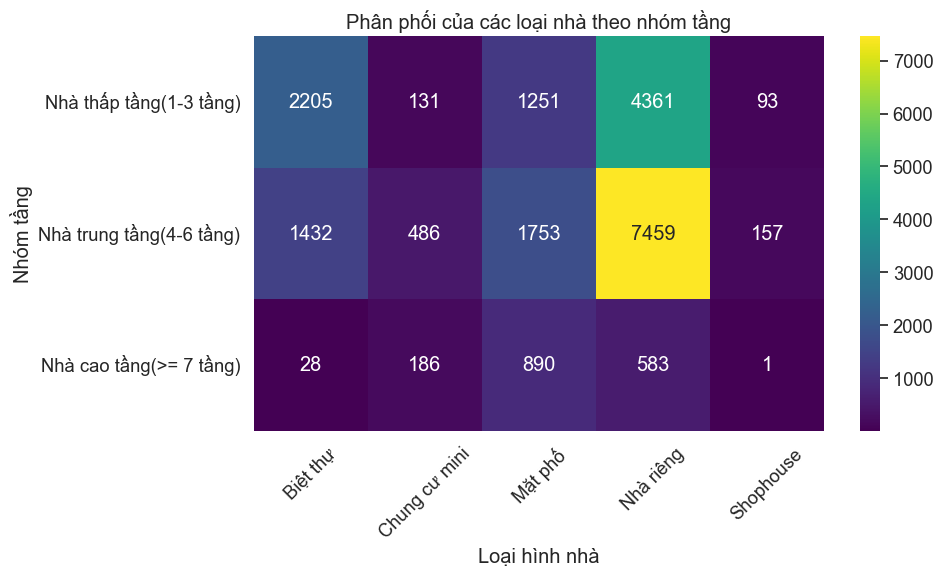

In [58]:
df = data[['Mức giá', 'Số tầng', 'Loại hình']]
df['Nhóm tầng'] = pd.cut(df['Số tầng'], bins=[1, 4, 7, float('inf')], labels=['Nhà thấp tầng(1-3 tầng)', 'Nhà trung tầng(4-6 tầng)', 'Nhà cao tầng(>= 7 tầng)'])

distribution_by_floor_and_type = pd.pivot_table(df, index='Nhóm tầng', columns='Loại hình', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(distribution_by_floor_and_type, annot=True, fmt='d', cmap='viridis')
plt.title('Phân phối của các loại nhà theo nhóm tầng')
plt.xlabel('Loại hình nhà')
plt.ylabel('Nhóm tầng')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Số phòng ngủ

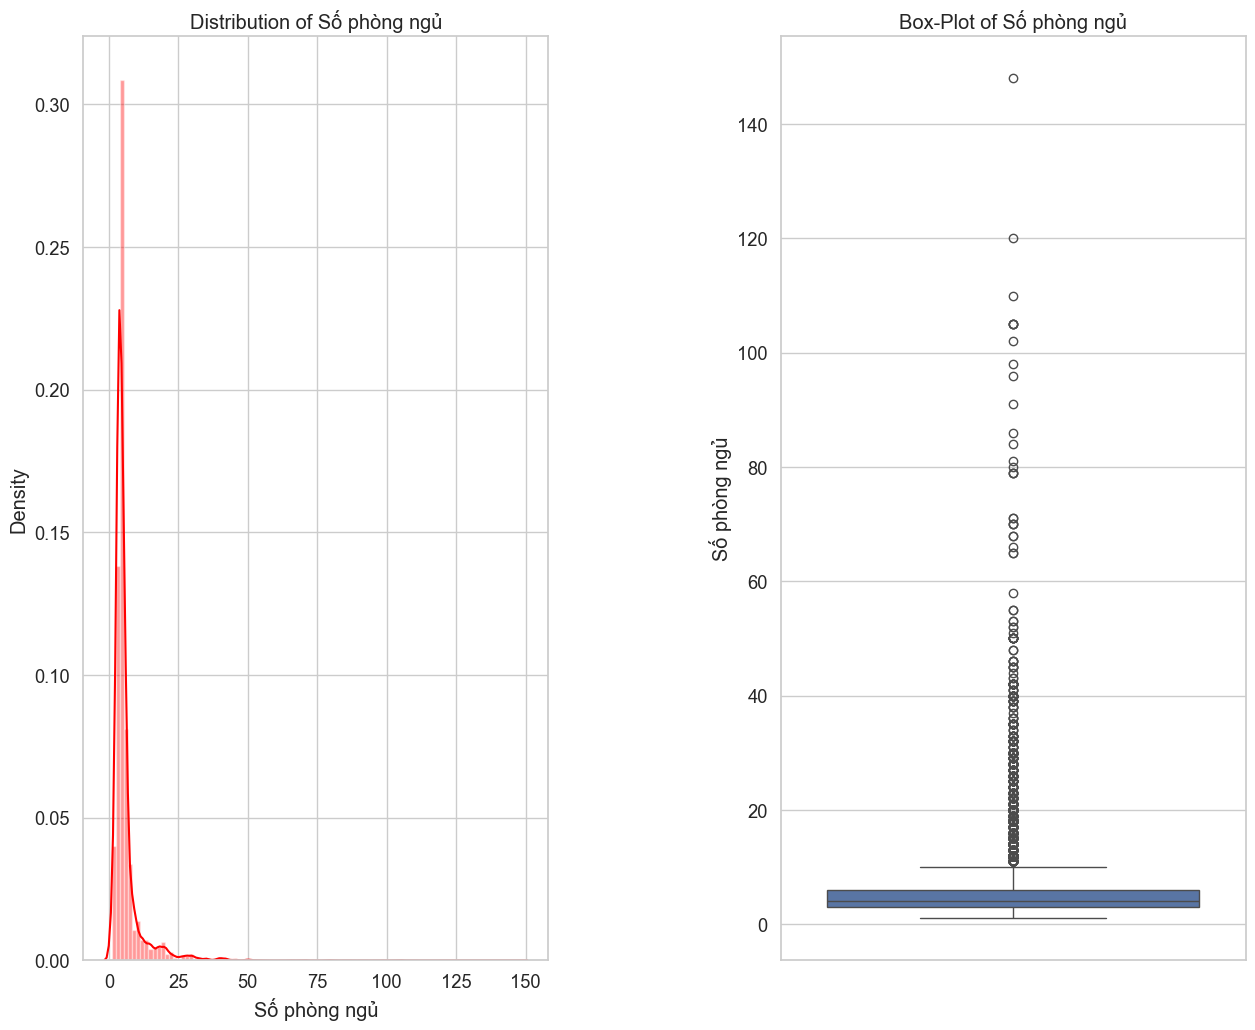

In [59]:
plot_numerical_variables(data, 'Số phòng ngủ', figsize = (15,12))

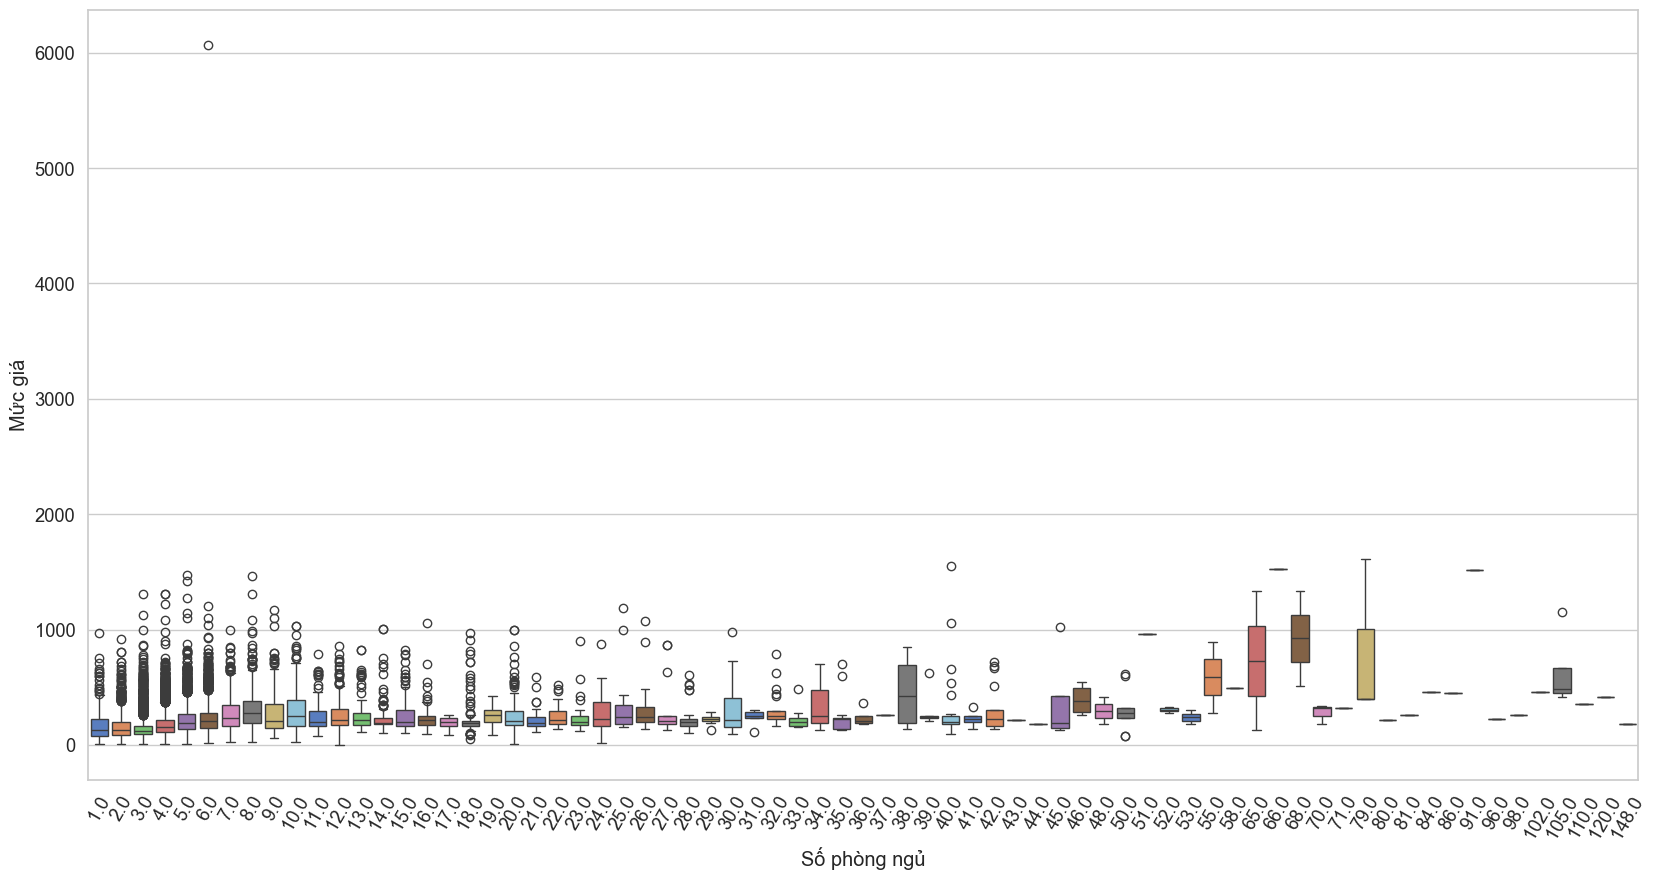

In [60]:
df = pd.concat([data['Mức giá'], data['Số phòng ngủ']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=60)
fig = sns.boxplot(x='Số phòng ngủ', y="Mức giá", data=df,palette="muted")

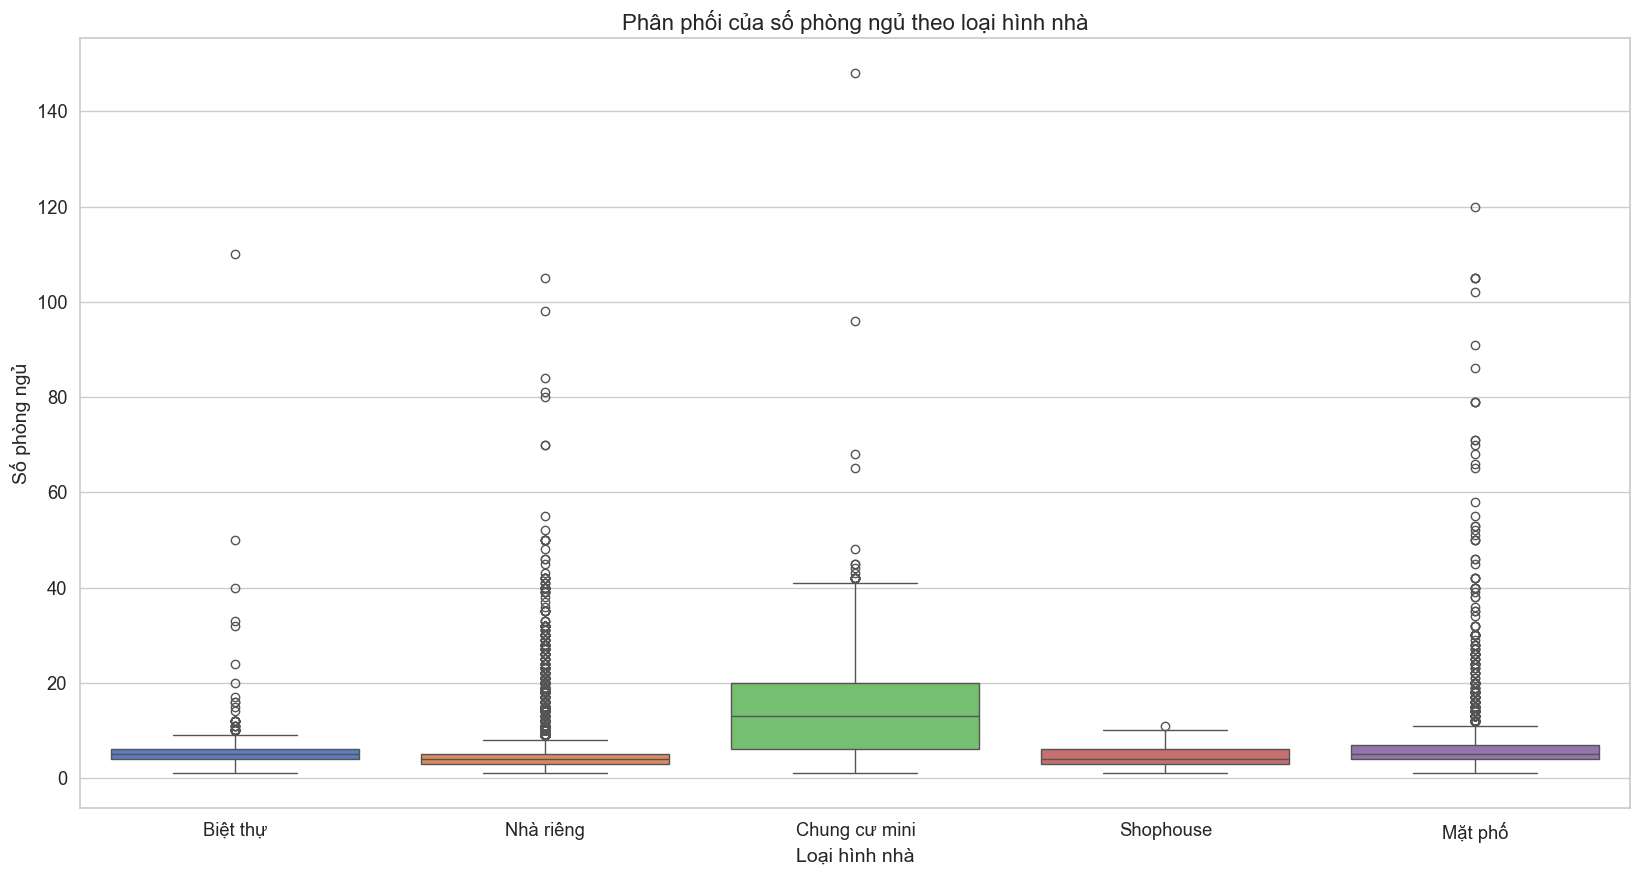

In [61]:
df = pd.concat([data[['Số phòng ngủ', 'Loại hình']]], axis=1)
# Vẽ box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Loại hình', y="Số phòng ngủ", data=df, palette="muted")
plt.title('Phân phối của số phòng ngủ theo loại hình nhà', fontsize=16)
plt.xlabel('Loại hình nhà', fontsize=14)
plt.ylabel('Số phòng ngủ', fontsize=14)
plt.show()


The above boxplot illustrates the distribution of the number of bedrooms by housing type. Due to the nature of the properties being sold, mini apartments exhibit the greatest variability and typically have more bedrooms compared to other types of houses. The other types of houses have relatively similar fluctuations in the number of bedrooms.

### Số toilet

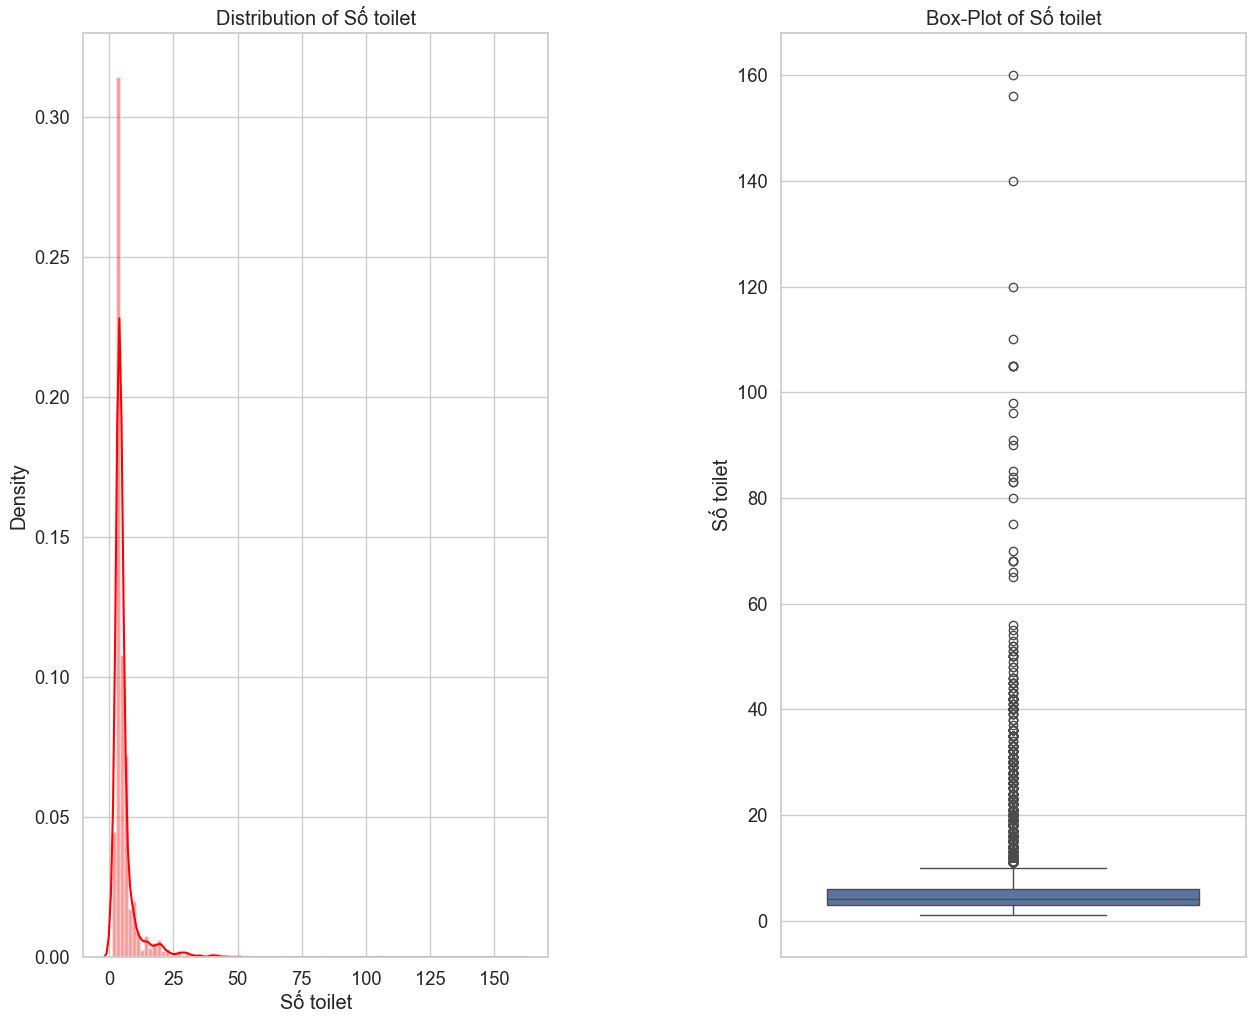

In [62]:
plot_numerical_variables(data, 'Số toilet', figsize = (15,12))

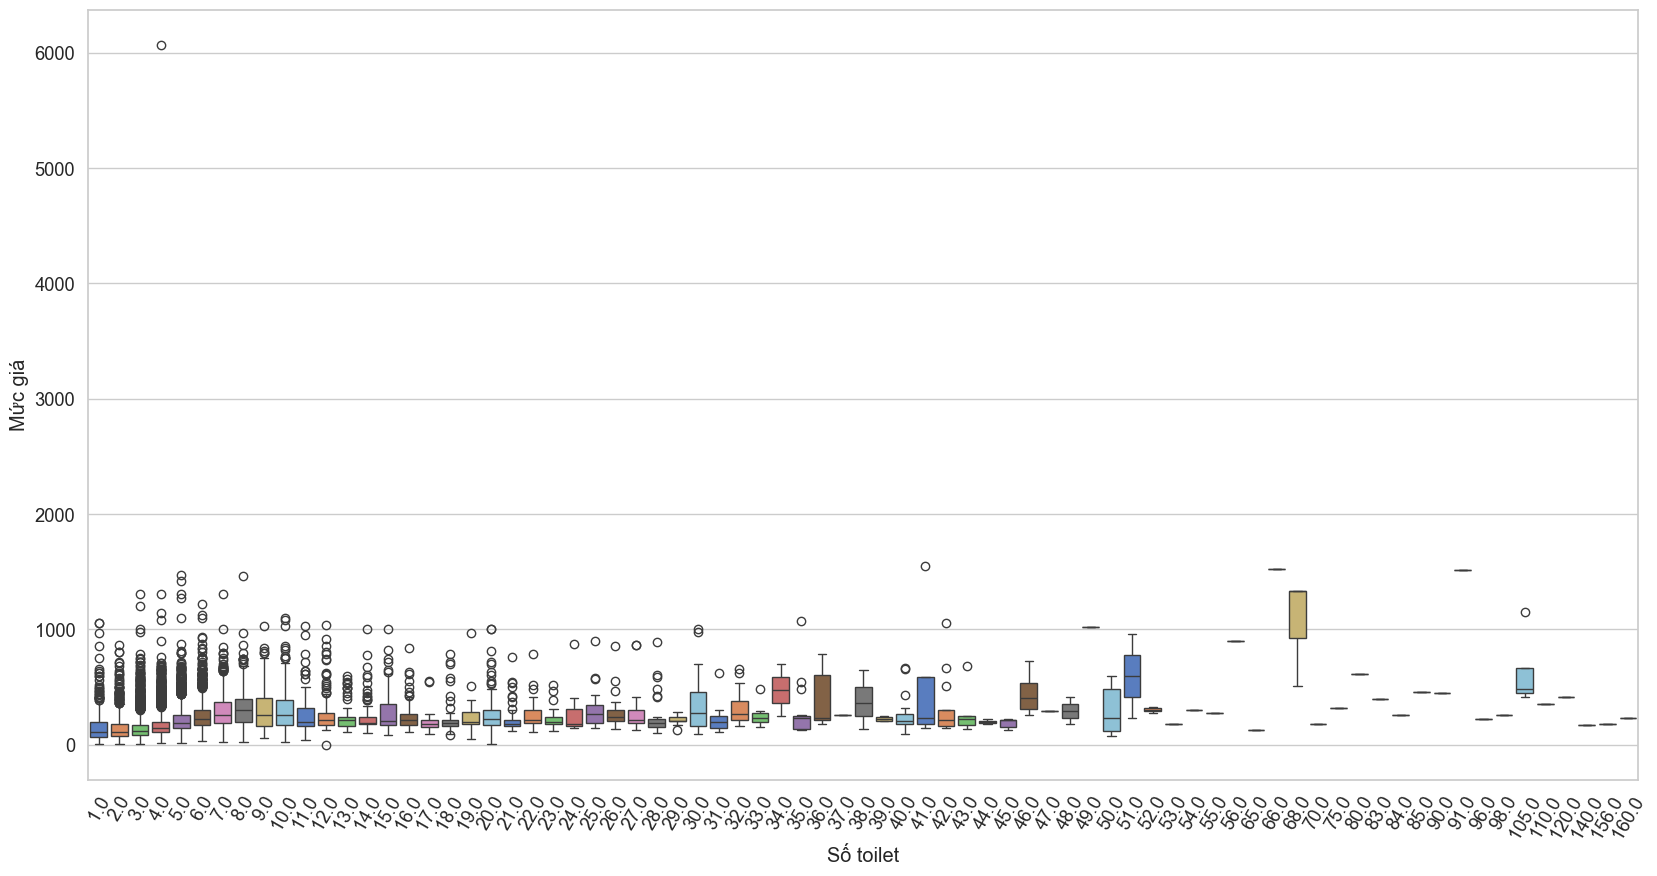

In [63]:
df = pd.concat([data['Mức giá'], data['Số toilet']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=60)
fig = sns.boxplot(x='Số toilet', y="Mức giá", data=df,palette="muted")

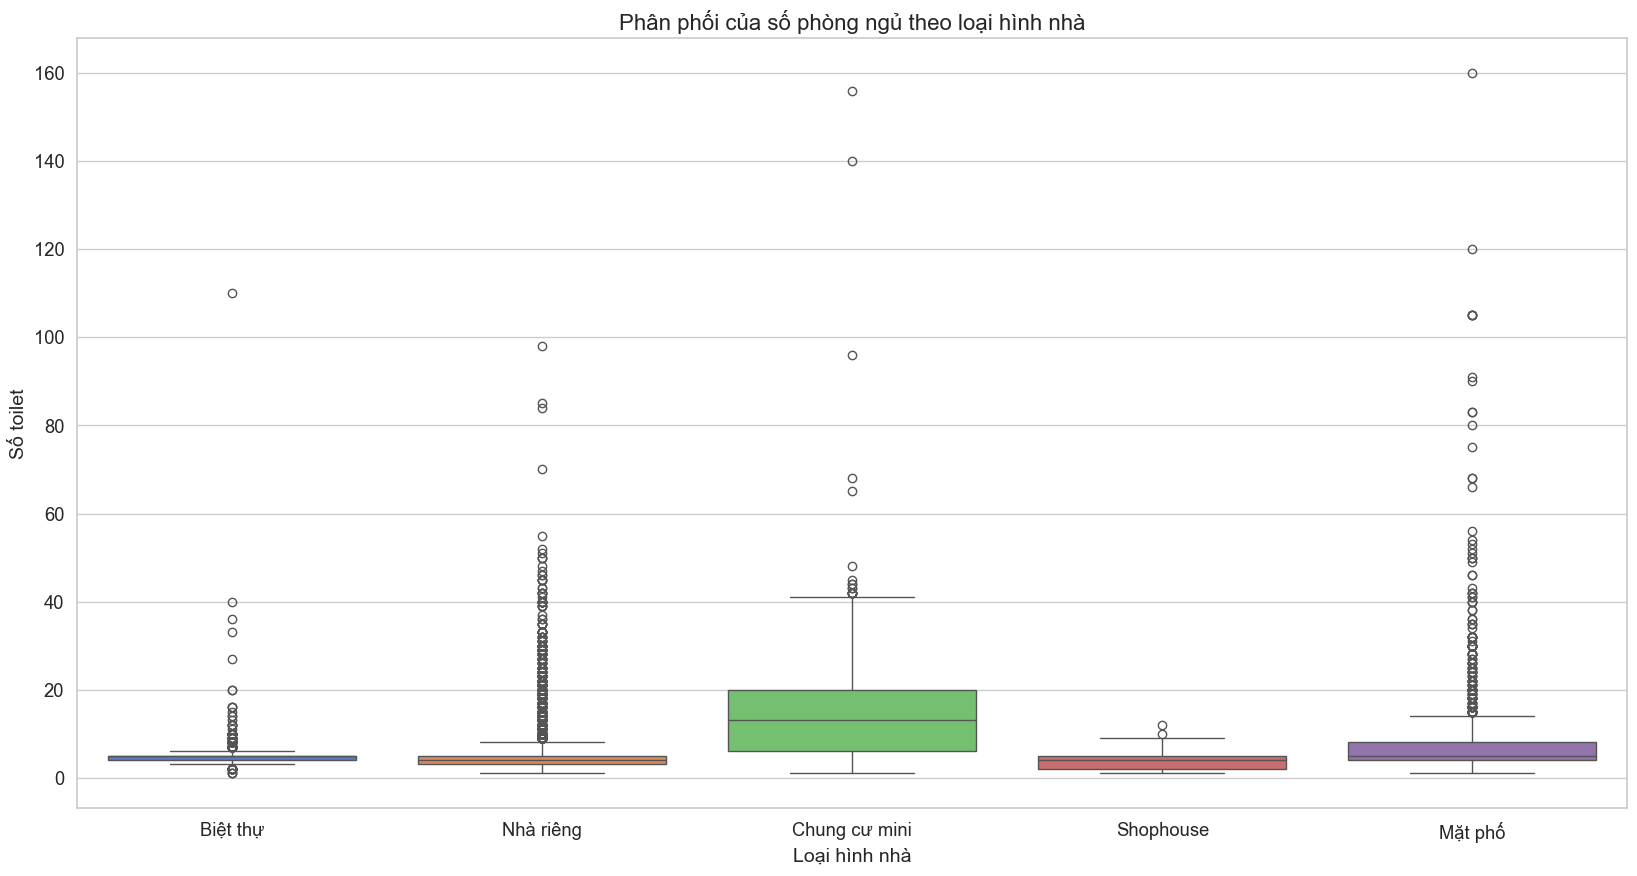

In [64]:
df = pd.concat([data[['Số toilet', 'Loại hình']]], axis=1)
# Vẽ box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Loại hình', y="Số toilet", data=df, palette="muted")
plt.title('Phân phối của số phòng ngủ theo loại hình nhà', fontsize=16)
plt.xlabel('Loại hình nhà', fontsize=14)
plt.ylabel('Số toilet', fontsize=14)
plt.show()

We can observe that the distribution of the number of toilets in different types of houses mirrors the distribution of the number of floors. Additionally, the pricing based on the number of floors, bedrooms, and toilets in various types of houses also shows a similar equivalence.

### Hướng nhà

There are a total of 8 house orientations, including the cardinal directions East, West, South, and North, as well as the secondary directions: Southeast, Northeast, Northwest, and Southwest. Due to the climatic characteristics of Northern Vietnam, we will classify these orientations into 3 categories: Favorable (South, Southeast), Unfavorable (North, Northwest, West), and Normal for the remaining directions. This classification applies similarly to balcony orientations.

In [65]:
data['Hướng nhà'].value_counts().to_frame().rename(columns = {'Hướng nhà':'Số lượng'})

count
Hướng nhà        
Đông - Nam   1538
Đông - Bắc    715
Tây - Bắc     685
Tây - Nam     684
Nam           439
Bắc           285
Đông          280
Tây           213

In [66]:
price_by_direction = data.groupby('Hướng nhà')['Mức giá'].agg(['mean', 'min', 'max']).reset_index()
price_by_direction.columns = ['Hướng nhà', 'Mức giá trung bình','Mức giá tối thiểu','Mức giá tối đa']
price_by_direction = price_by_direction.sort_values(by='Mức giá trung bình', ascending=False).reset_index(drop=True)
price_by_direction

Hướng nhà  Mức giá trung bình  Mức giá tối thiểu  Mức giá tối đa
0  Đông - Bắc          204.146853               10.6          1073.9
1   Tây - Nam          190.698538                9.3           864.9
2         Tây          190.215493               36.0          1625.0
3   Tây - Bắc          190.089489               10.8           835.7
4  Đông - Nam          188.450390                5.3          1269.2
5         Nam          185.200456                6.0          1000.0
6         Bắc          176.682105                7.5           785.7
7        Đông          175.994643               15.9           714.3

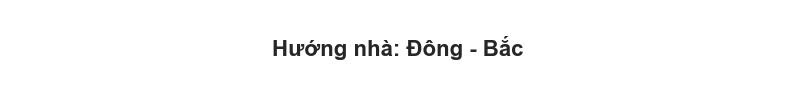

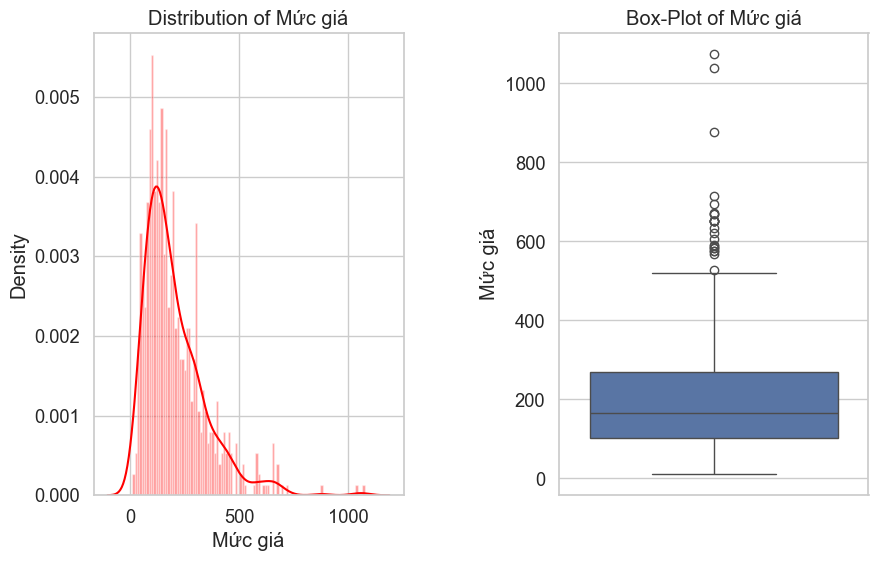

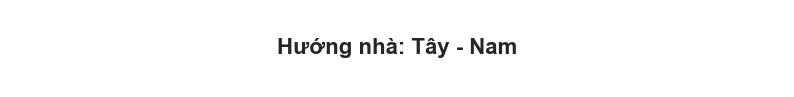

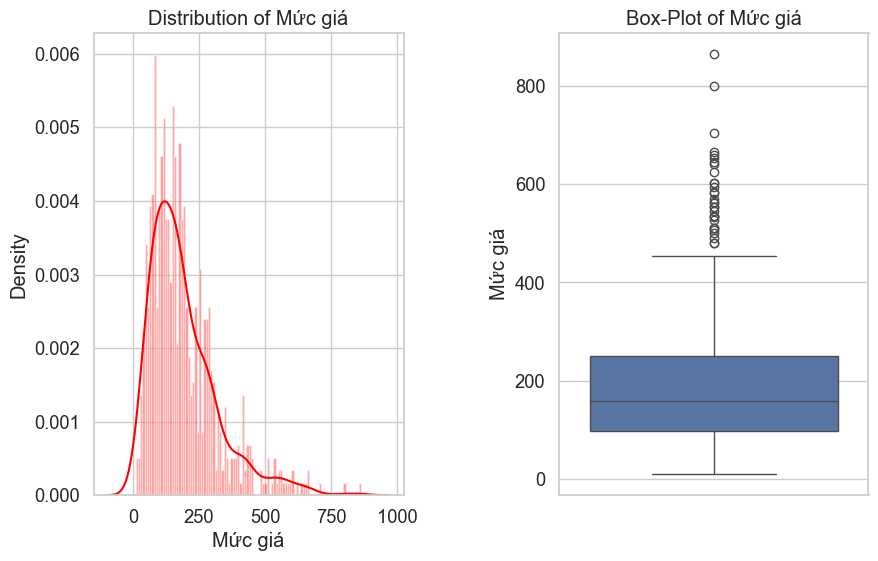

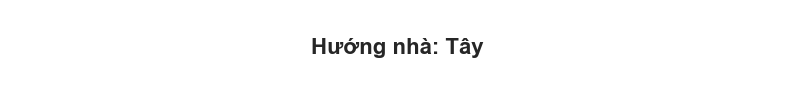

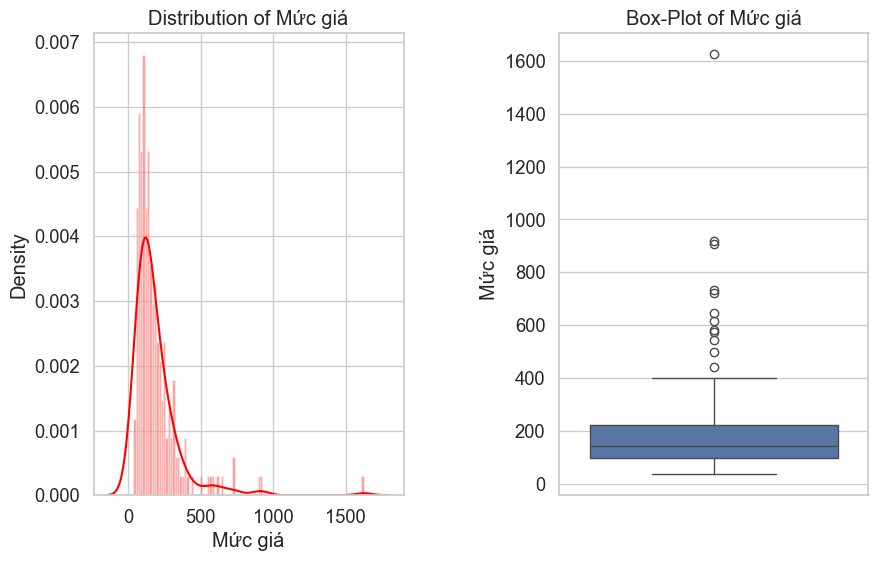

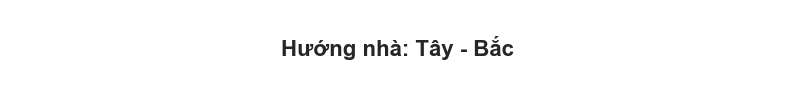

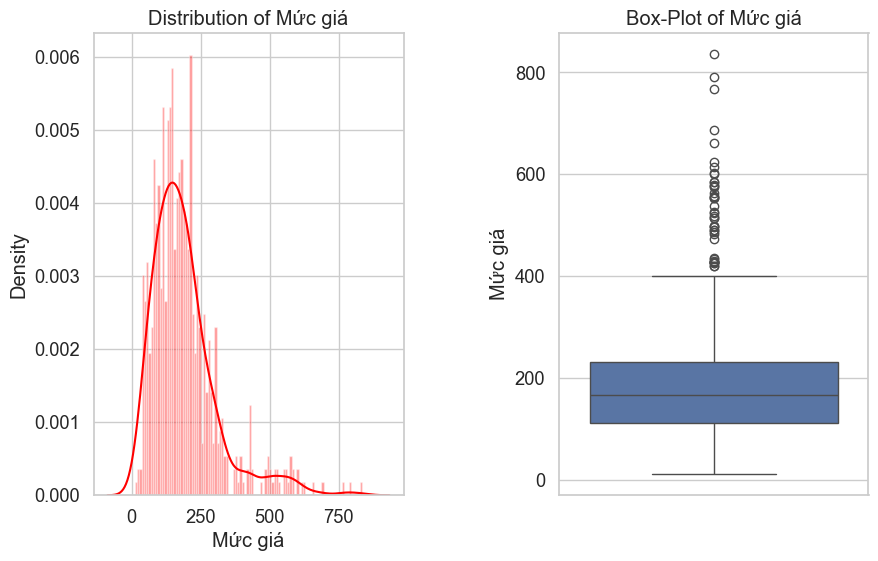

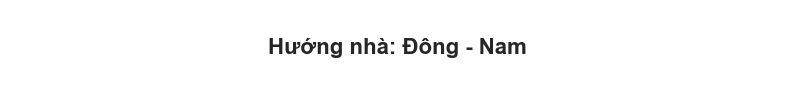

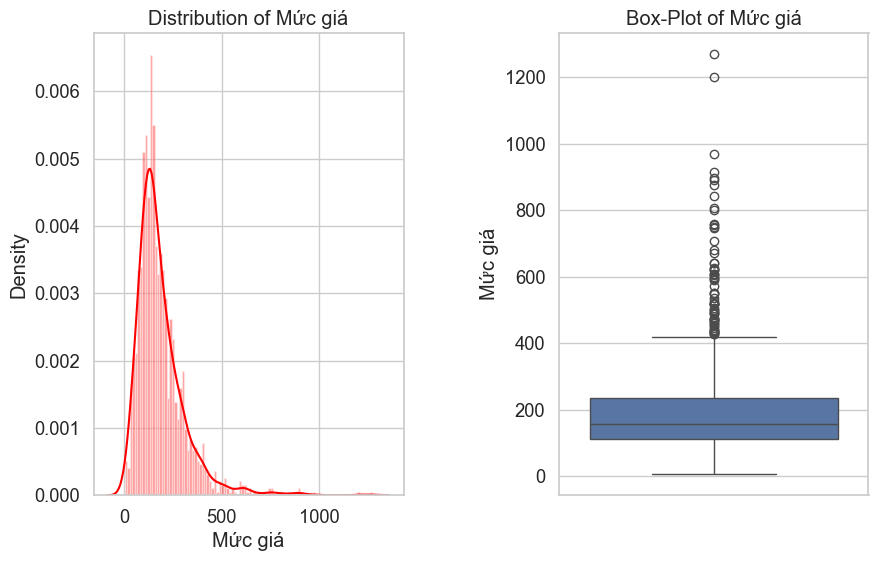

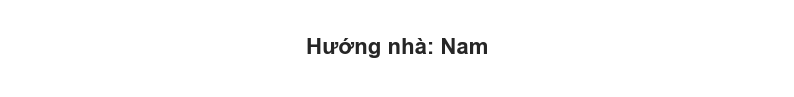

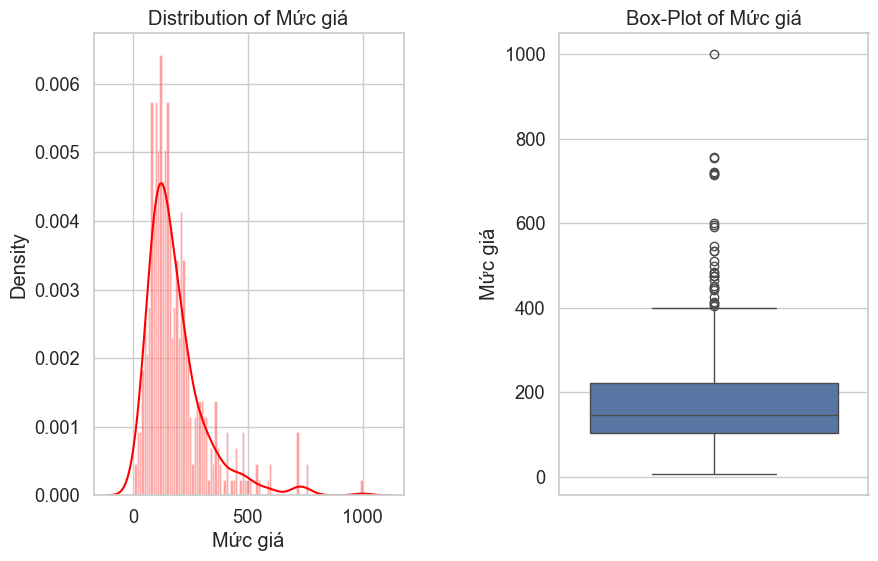

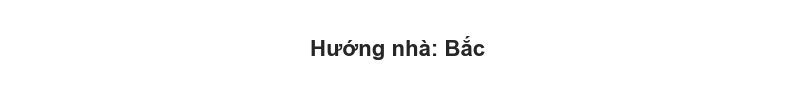

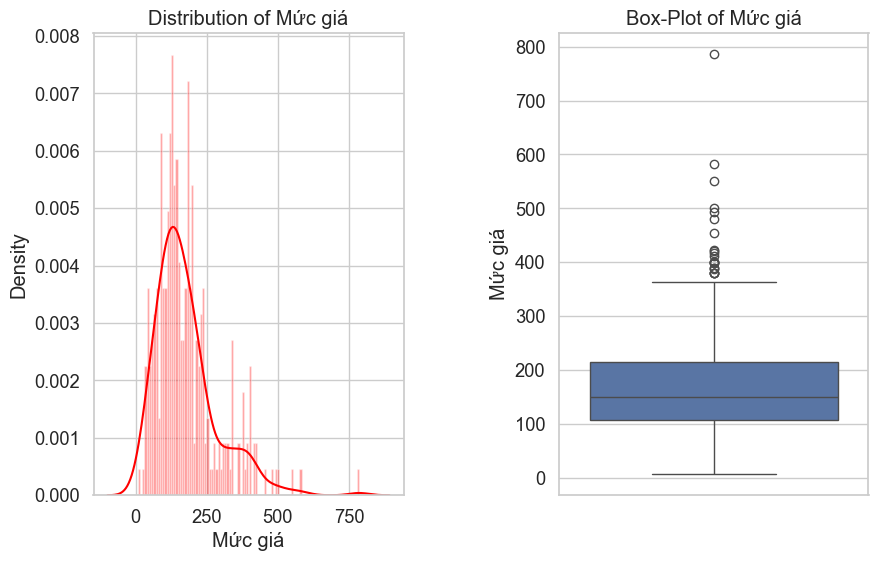

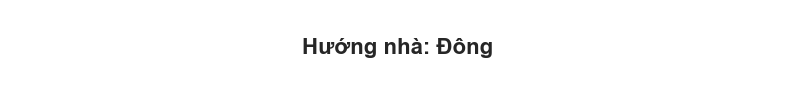

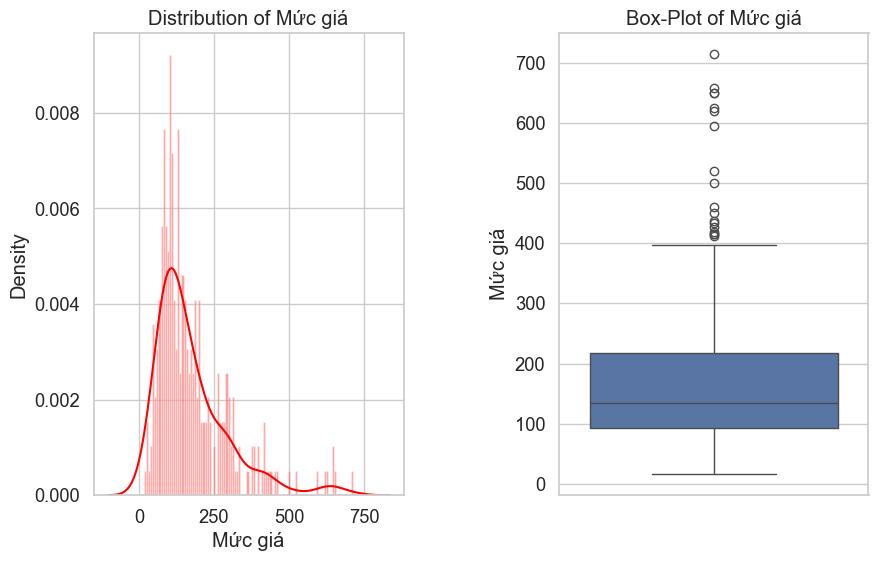

In [67]:
for i in price_by_direction['Hướng nhà']:
    subset = data[data['Hướng nhà'] == i]
    title = f'Hướng nhà: {i}'
    plot_with_title(subset, title)

In [68]:
def categorize_direction(direction):
    favorable_directions = ['Nam', 'Đông Nam']
    unfavorable_directions = ['Bắc', 'Tây Bắc', 'Tây']
    if direction in favorable_directions:
        return 'Thuận lợi'
    elif direction in unfavorable_directions:
        return 'Không thuận lợi'
    else:
        return 'Bình thường'

data['Nhóm hướng nhà'] = data['Hướng nhà'].apply(categorize_direction)

avg_price_by_direction = data.groupby('Nhóm hướng nhà')['Mức giá'].agg(['mean', 'max', 'min'])

avg_price_by_direction


mean     max  min
Nhóm hướng nhà                          
Bình thường      215.743265  6071.4  0.6
Không thuận lợi  182.470482  1625.0  7.5
Thuận lợi        185.200456  1000.0  6.0

As analyzed, houses with normal orientations have the highest average prices, followed by houses with favorable orientations, and lastly, houses with unfavorable orientations. Therefore, it can be concluded that the orientation of a house does not significantly impact the selling price of houses in Hanoi.

### Hướng ban công

In [69]:
data['Hướng ban công'].value_counts().to_frame().rename(columns = {'Hướng ban công':'Số lượng'})

count
Hướng ban công       
Đông - Nam        994
Đông - Bắc        461
Tây - Nam         434
Tây - Bắc         410
Nam               297
Đông              164
Bắc               163
Tây               146

In [70]:
price_by_balcony = data.groupby('Hướng ban công')['Mức giá'].agg(['mean', 'min', 'max']).reset_index()
price_by_balcony.columns = ['Hướng ban công', 'Mức giá trung bình','Mức giá tối thiểu','Mức giá tối đa']
price_by_balcony = price_by_balcony.sort_values(by='Mức giá trung bình', ascending=False).reset_index(drop=True)
price_by_balcony

Hướng ban công  Mức giá trung bình  Mức giá tối thiểu  Mức giá tối đa
0     Đông - Bắc          199.972017               10.6          1073.9
1     Đông - Nam          197.499899                5.3          1269.2
2      Tây - Nam          194.324654               10.0           864.9
3            Nam          191.569697               25.0          1000.0
4      Tây - Bắc          191.438293               23.7           661.0
5           Đông          164.841463               23.0           650.0
6            Bắc          164.580982                7.5           714.3
7            Tây          159.483562               17.6           722.7

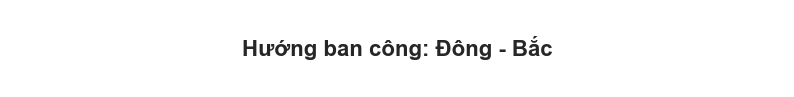

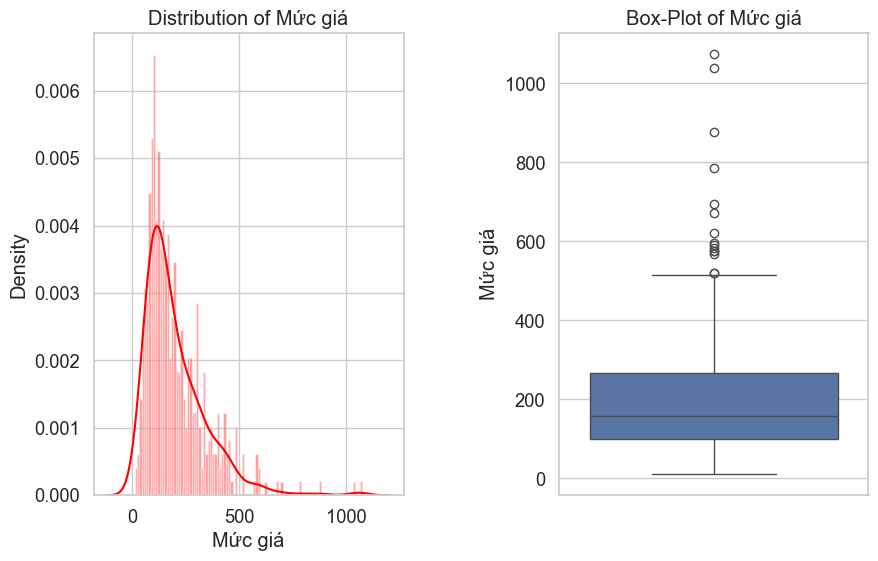

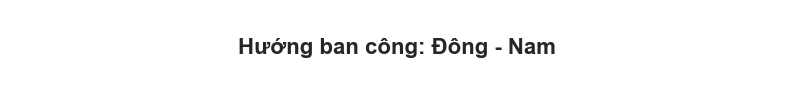

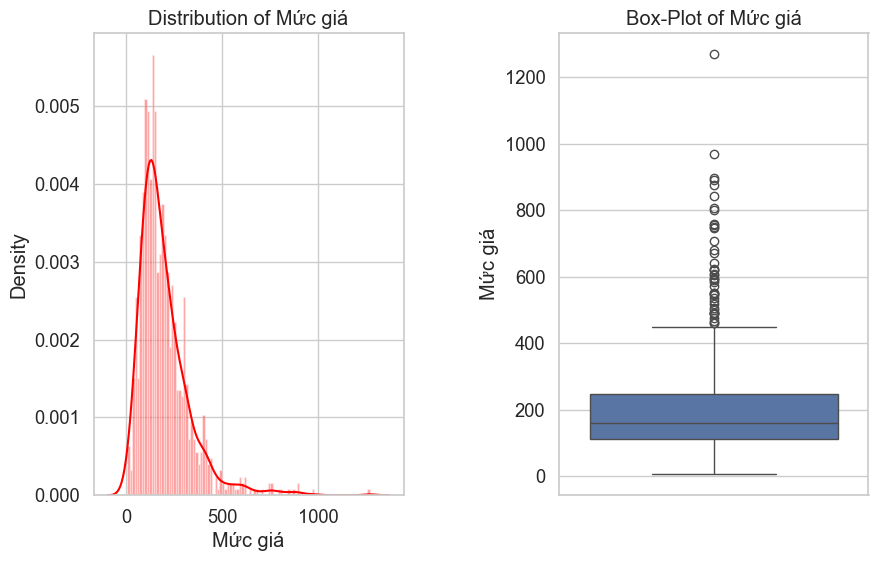

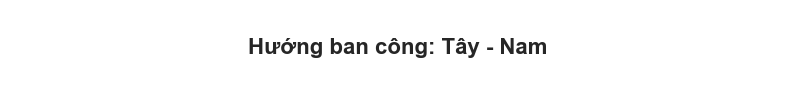

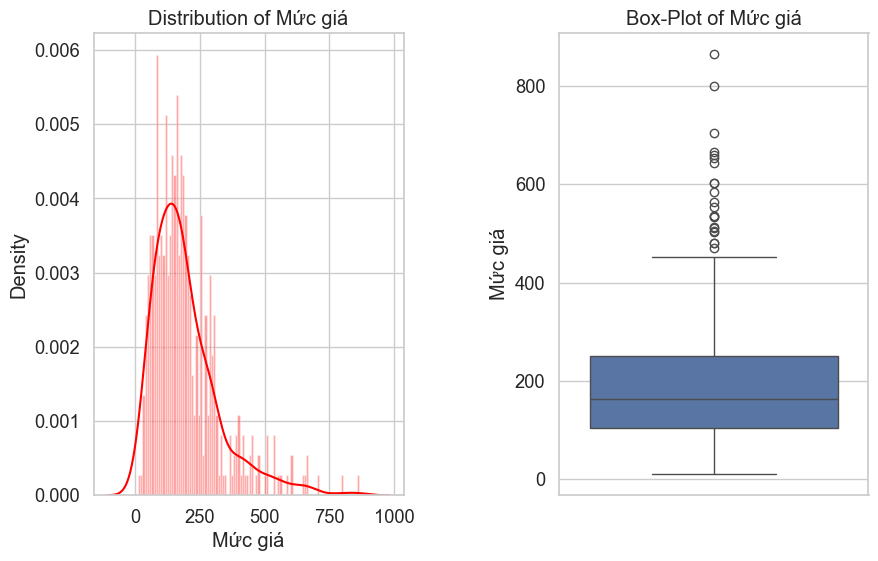

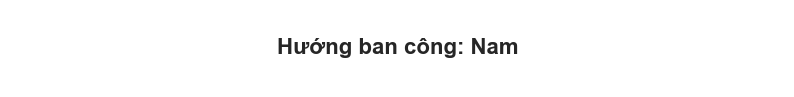

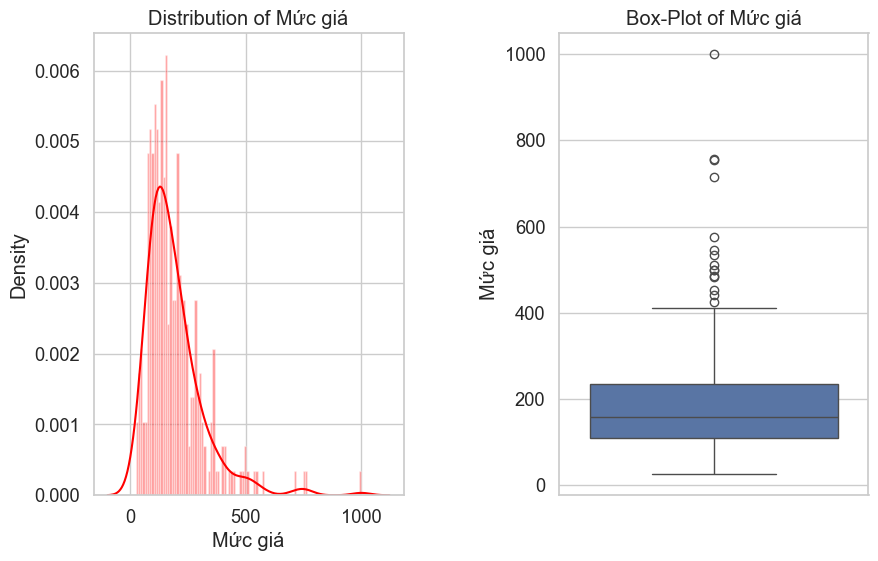

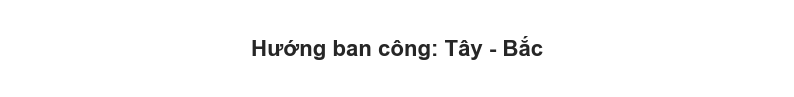

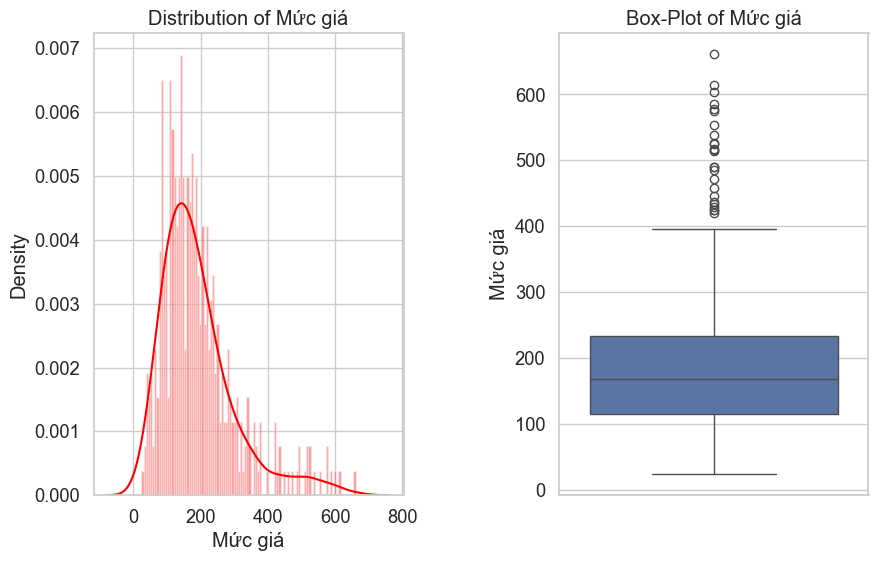

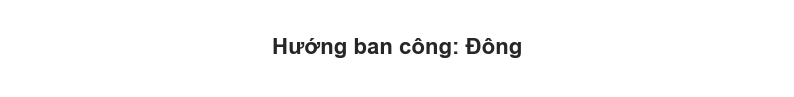

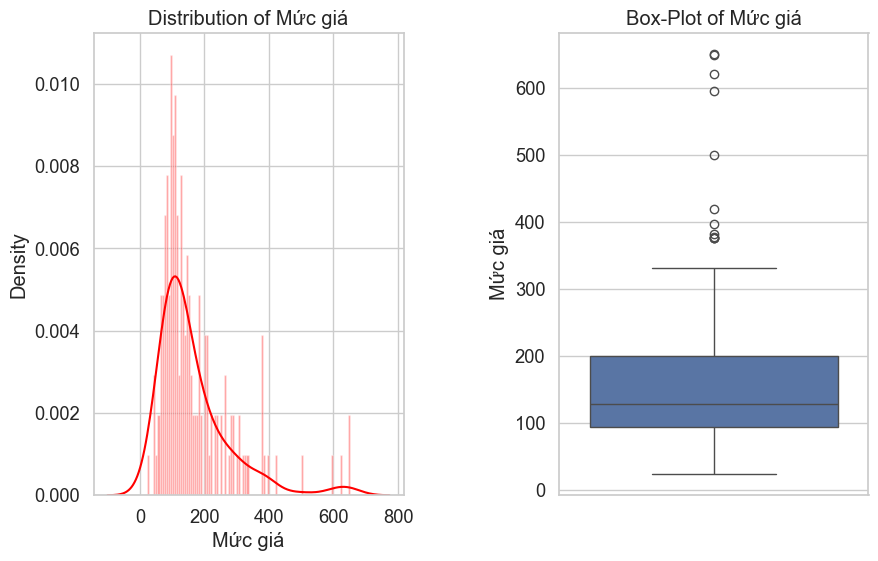

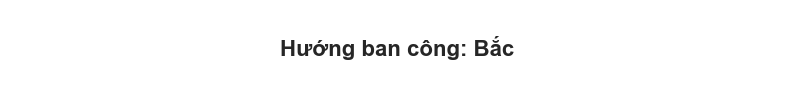

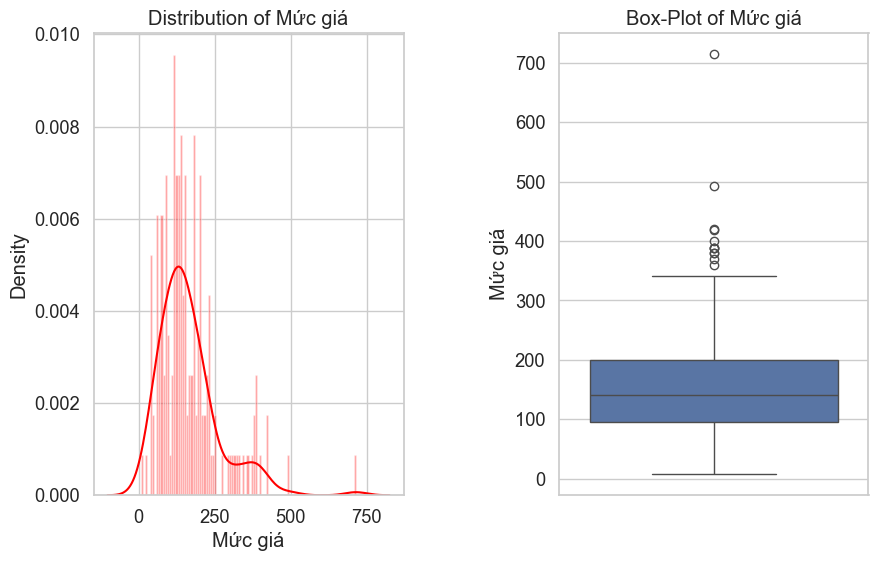

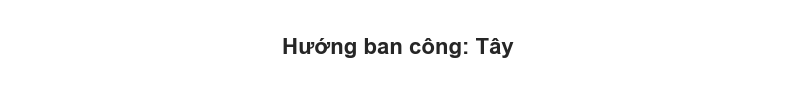

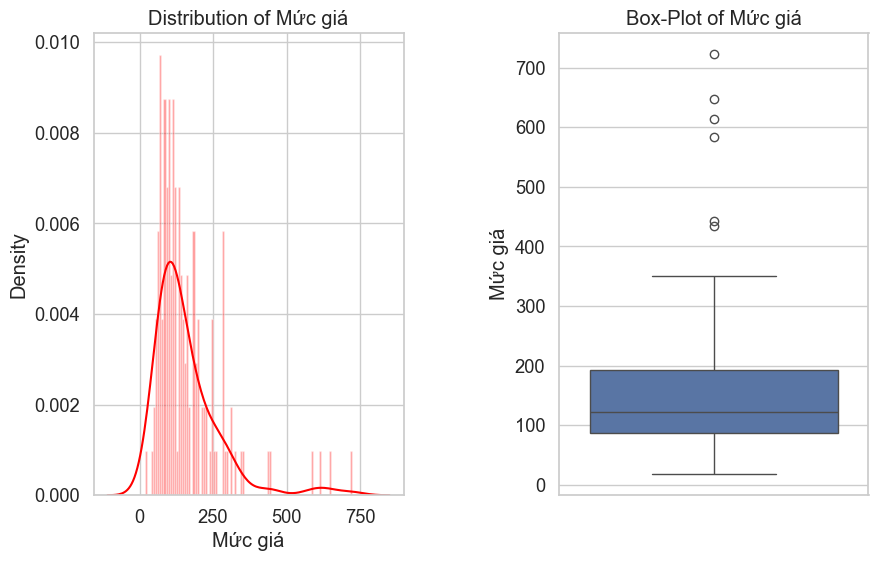

In [71]:
for i in price_by_balcony['Hướng ban công']:
    subset = data[data['Hướng ban công'] == i]
    title = f'Hướng ban công: {i}'
    plot_with_title(subset, title)

In [72]:
def categorize_direction(direction):
    favorable_directions = ['Nam', 'Đông Nam']
    unfavorable_directions = ['Bắc', 'Tây Bắc', 'Tây']
    if direction in favorable_directions:
        return 'Thuận lợi'
    elif direction in unfavorable_directions:
        return 'Không thuận lợi'
    else:
        return 'Bình thường'

data['Nhóm hướng ban công'] = data['Hướng ban công'].apply(categorize_direction)

avg_price_by_direction = data.groupby('Nhóm hướng ban công')['Mức giá'].agg(['mean', 'max', 'min'])

avg_price_by_direction


mean     max   min
Nhóm hướng ban công                          
Bình thường          215.492433  6071.4   0.6
Không thuận lợi      162.172492   722.7   7.5
Thuận lợi            191.569697  1000.0  25.0

As can be compared with the house orientation analysis above, the balcony orientation group shows a similar pattern with the average prices of each group. Therefore, the conclusion is consistent with the house orientation group: balcony orientation does not significantly impact the average selling price of houses in Hanoi.

### Loại ngõ

In [73]:
data['Loại ngõ'].value_counts().to_frame().rename(columns = {'Loại ngõ':'Số lượng'})

count
Loại ngõ       
Nhỏ        4268
Rộng       1328

In [74]:
price_by_loaingo = data.groupby('Loại ngõ')['Mức giá'].agg(['mean', 'min', 'max']).reset_index()
price_by_loaingo.columns = ['Loại ngõ', 'Mức giá trung bình','Mức giá tối thiểu','Mức giá tối đa']
price_by_loaingo = price_by_loaingo.sort_values(by='Mức giá trung bình', ascending=False).reset_index(drop=True)
price_by_loaingo

Loại ngõ  Mức giá trung bình  Mức giá tối thiểu  Mức giá tối đa
0      Nhỏ          215.289714                3.5          1166.7
1     Rộng          188.305196                5.4          1309.1

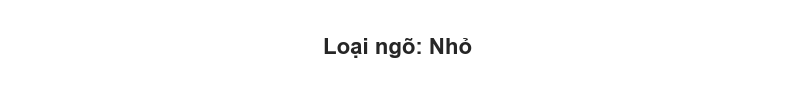

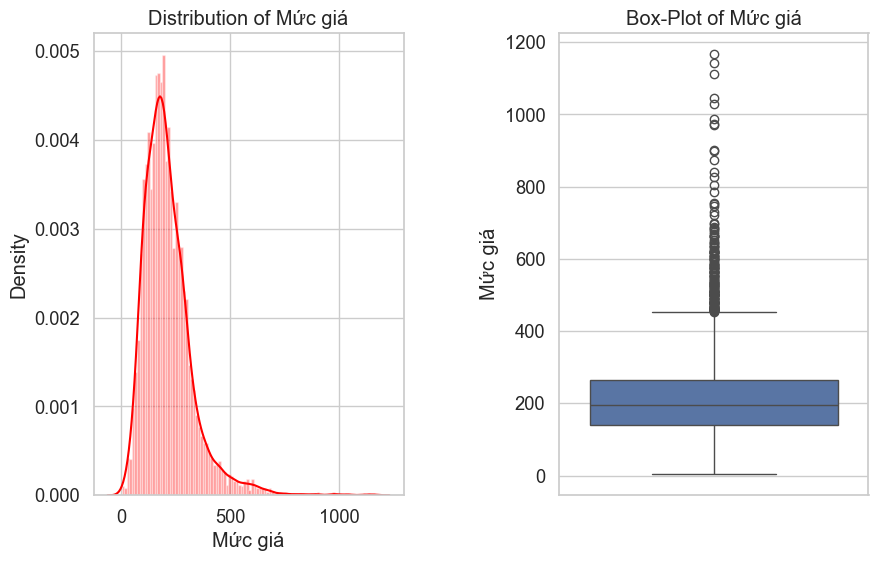

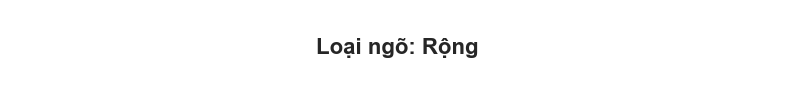

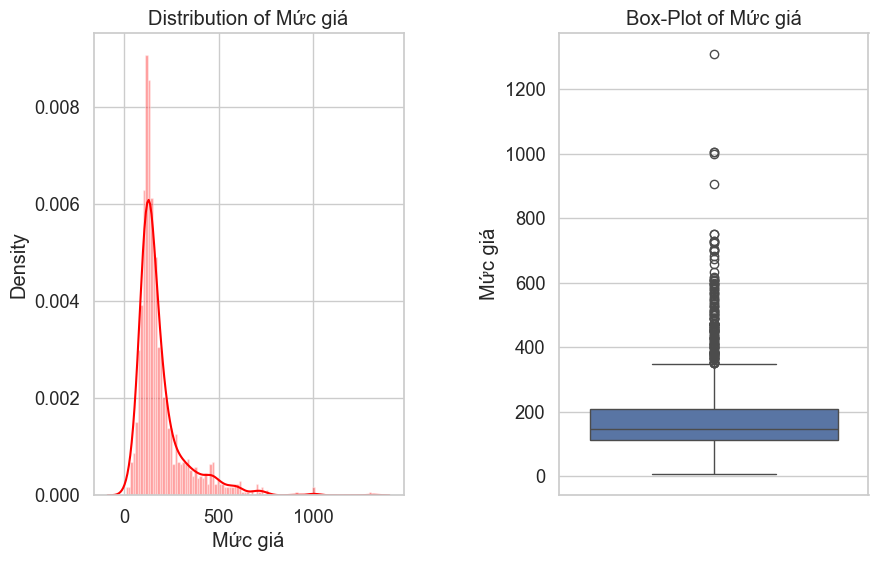

In [75]:
for i in price_by_loaingo['Loại ngõ']:
    subset = data[data['Loại ngõ'] == i]
    title = f'Loại ngõ: {i}'
    plot_with_title(subset, title)

#### Nội thất

In [76]:
data['Nội thất'].value_counts().to_frame().rename(columns = {'Nội thất':'Số lượng'})

count
Nội thất                    
Khác                   11383
Full nội thất           9823
Nội thất cơ bản         2792
Nội thất cao cấp         765
Chưa có nội thất         651
Nội thất thô              81
Nguyên bản chủ đầu tư      9

In [77]:
price_by_furniture = data.groupby('Nội thất')['Mức giá'].agg(['mean', 'max', 'min']).reset_index()
price_by_furniture = price_by_furniture.sort_values(by='mean', ascending=False).reset_index(drop=True)
price_by_furniture

Nội thất        mean     max    min
0  Nguyên bản chủ đầu tư  303.766667   620.9  101.6
1       Nội thất cao cấp  232.684314  1189.2    5.3
2          Full nội thất  219.348254  6071.4    7.3
3                   Khác  219.099754  1738.1    0.6
4       Chưa có nội thất  197.535484  3500.0   11.9
5        Nội thất cơ bản  179.360924  1309.1    9.0
6           Nội thất thô  167.395062   683.8   34.1

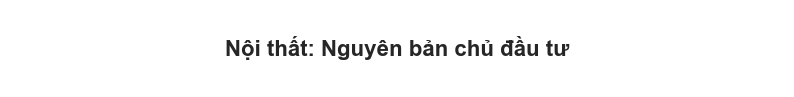

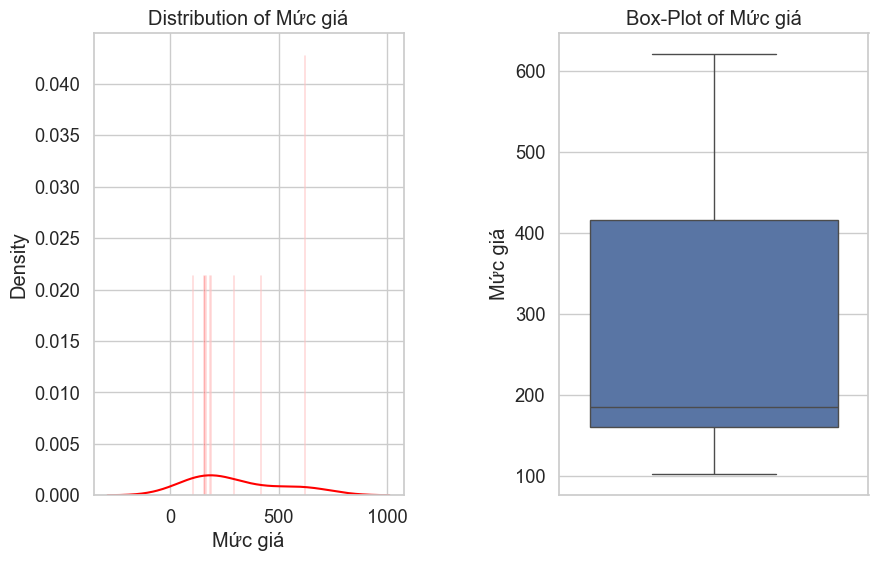

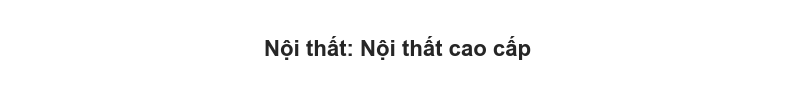

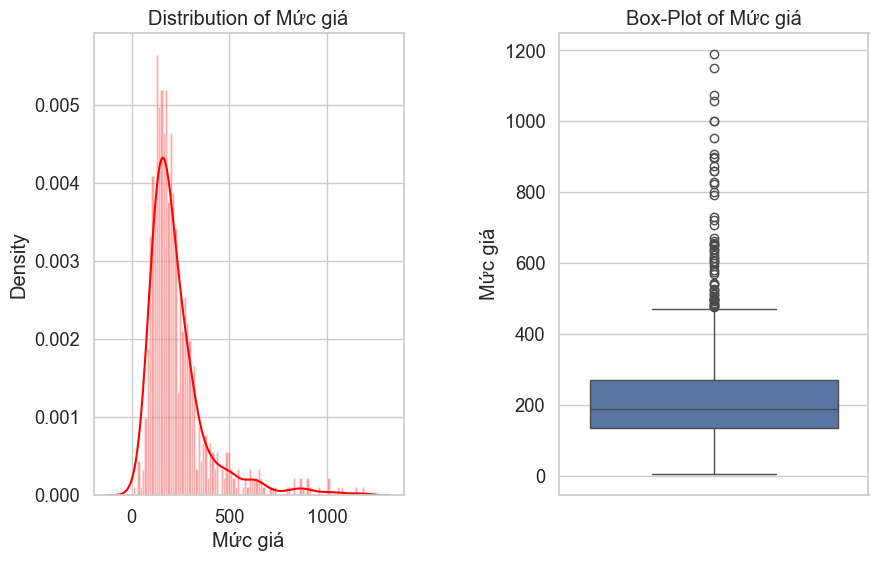

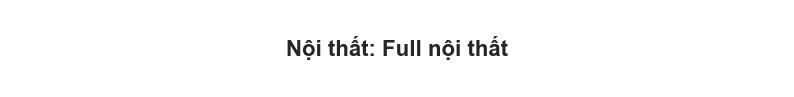

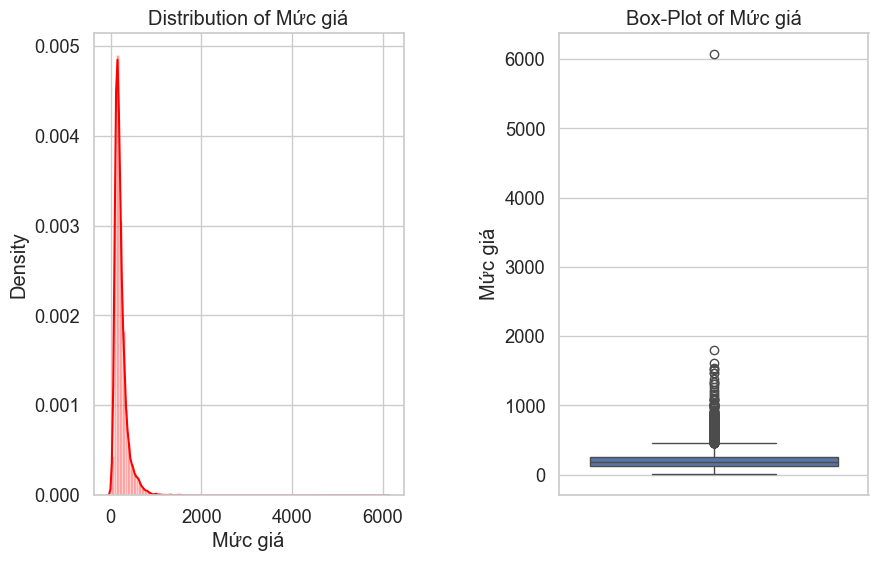

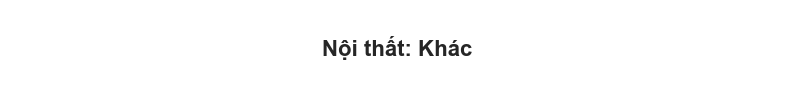

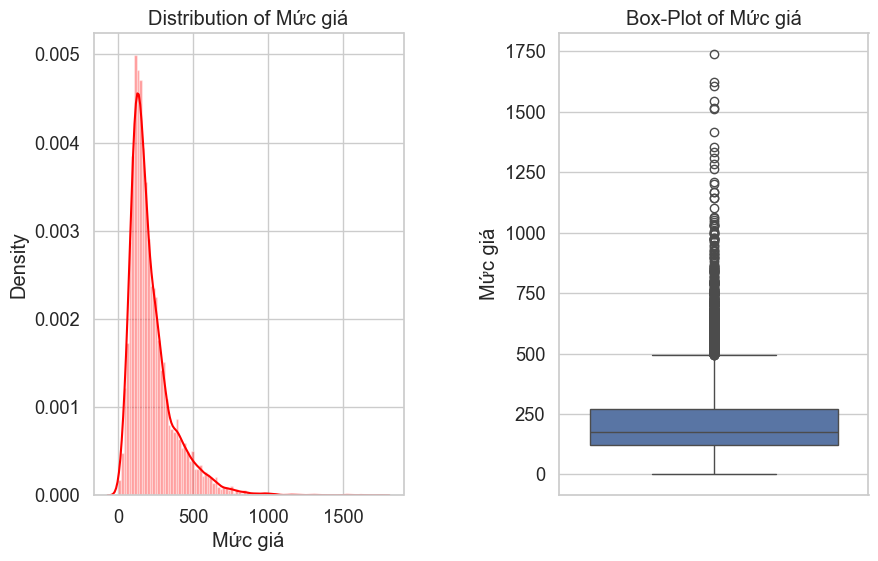

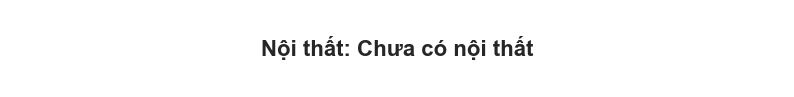

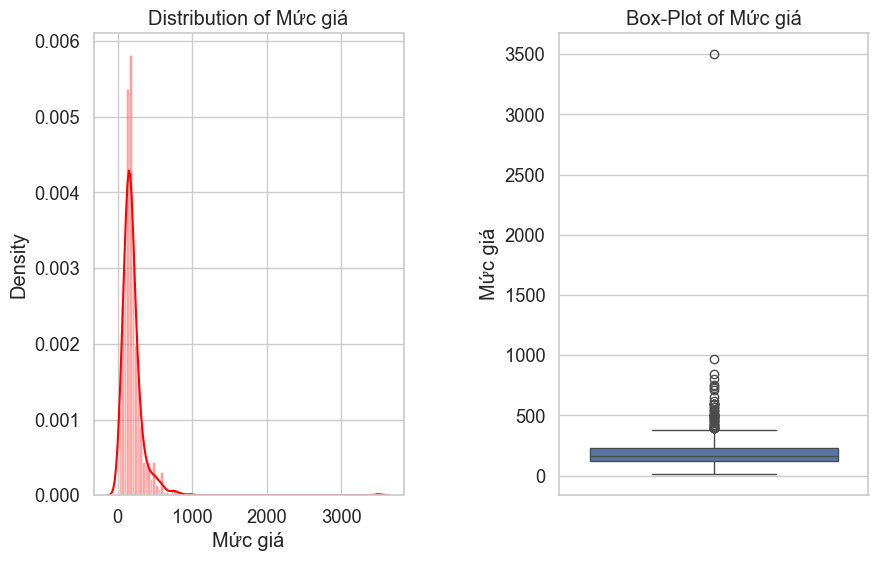

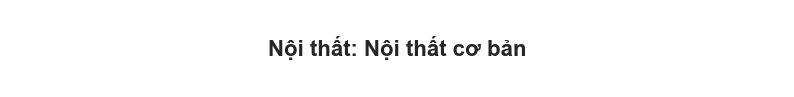

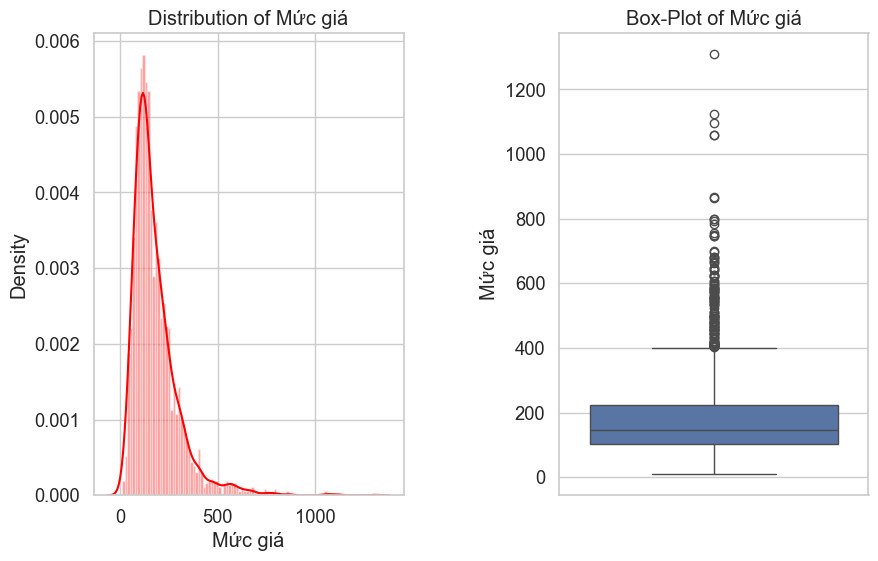

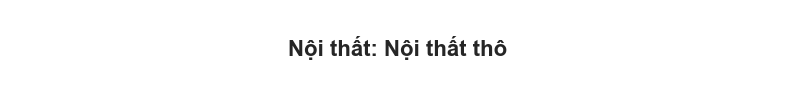

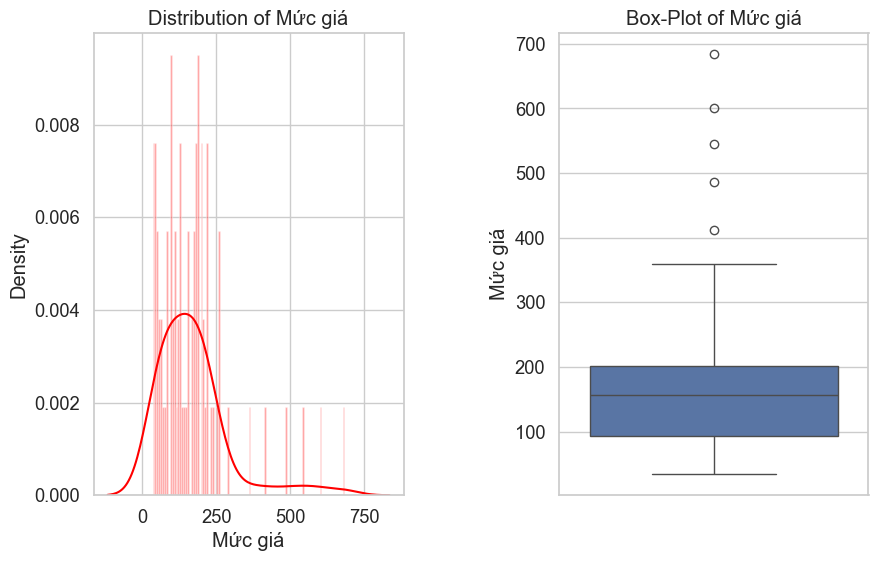

In [78]:
for i in price_by_furniture['Nội thất']:
    subset = data[data['Nội thất'] == i]
    title = f'Nội thất: {i}'
    plot_with_title(subset, title)


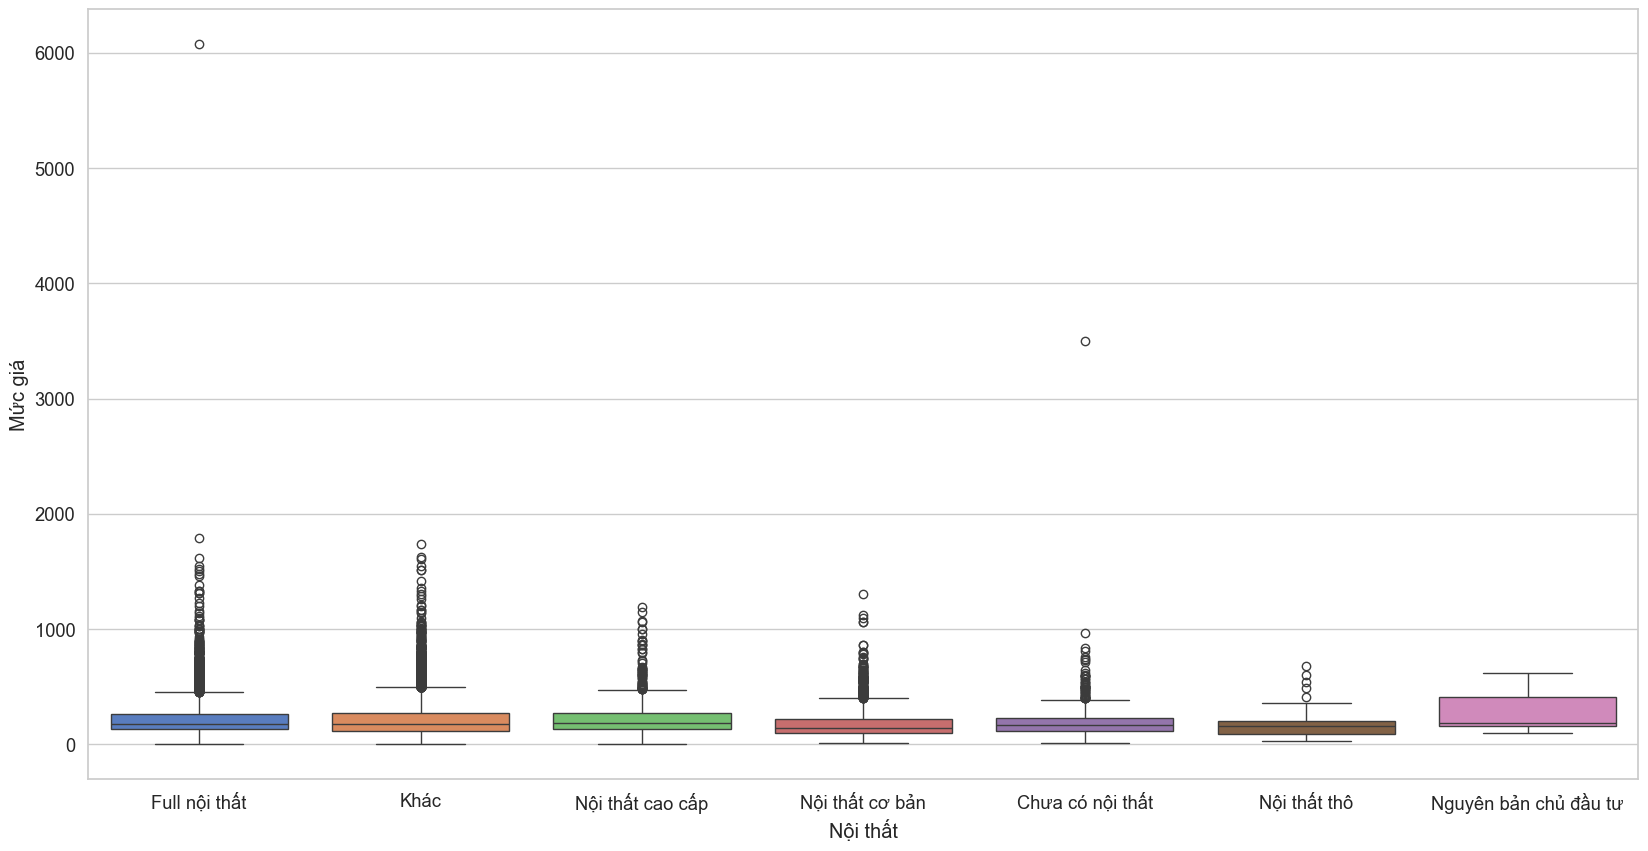

In [79]:
df = pd.concat([data['Mức giá'], data['Nội thất']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Nội thất', y="Mức giá", data=df,palette="muted")

#### Pháp lý

In [80]:
data['Pháp lý'].value_counts().to_frame().rename(columns = {'Pháp lý':'Số lượng'})

count
Pháp lý                              
Sổ đỏ, sổ hồng, pháp lý đầy đủ  20188
Khác                             4864
Hợp đồng mua bán                  342
Đang chờ sổ                        99
Sổ chung                            6
Vi bằng                             5

In [81]:
price_by_phaply = data.groupby('Pháp lý')['Mức giá'].agg(['mean', 'max', 'min']).reset_index()
price_by_phaply = price_by_phaply.sort_values(by='mean', ascending=False).reset_index(drop=True)
price_by_phaply

Pháp lý        mean     max   min
0                            Khác  218.326192  1625.0   1.3
1  Sổ đỏ, sổ hồng, pháp lý đầy đủ  215.362532  6071.4   0.6
2                     Đang chờ sổ  161.894949  3500.0   3.5
3                Hợp đồng mua bán  134.365789   518.5   6.5
4                        Sổ chung   75.350000   111.5  44.4
5                         Vi bằng   45.580000    79.5  12.5

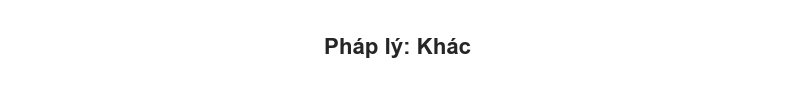

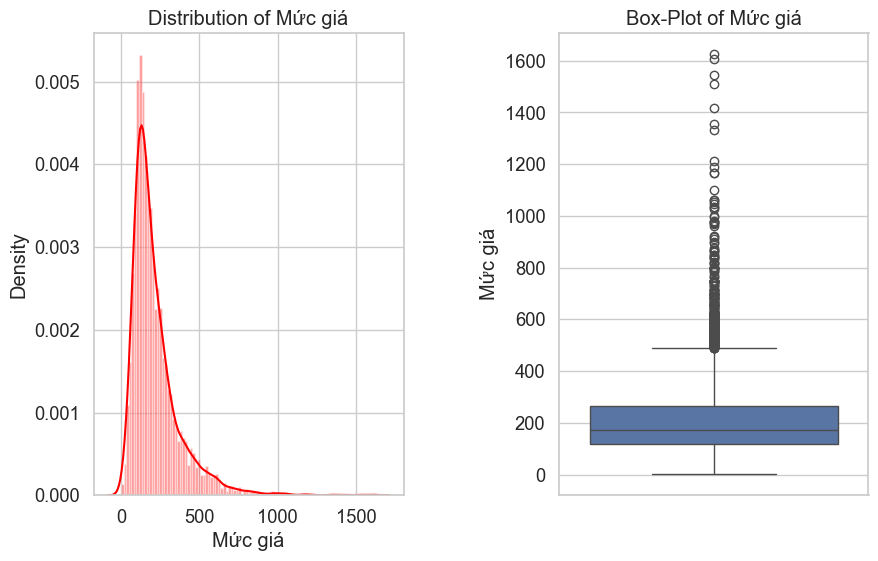

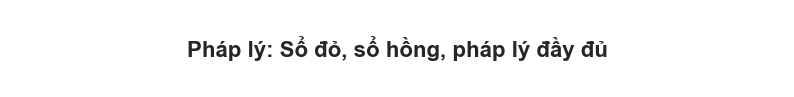

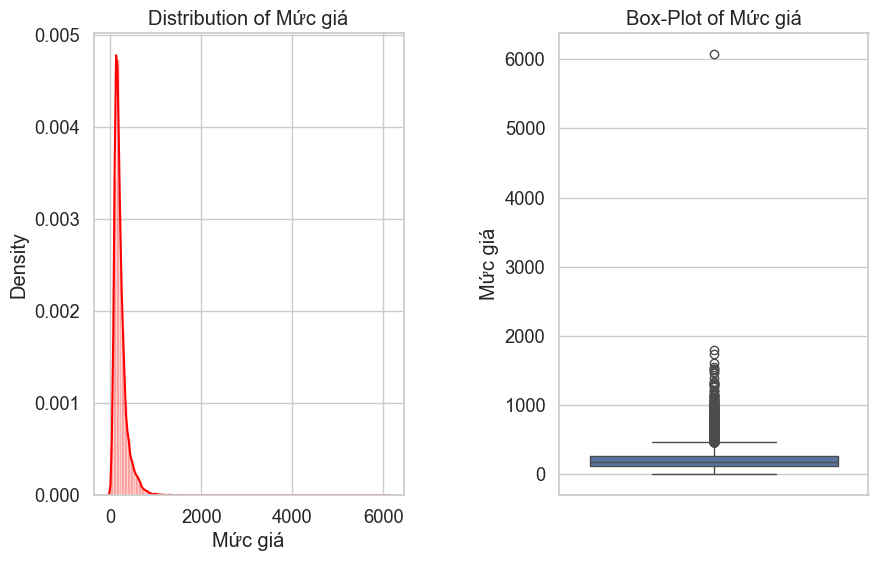

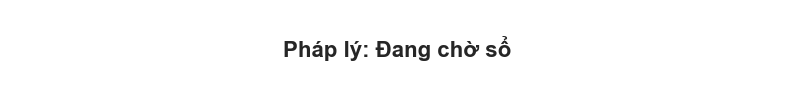

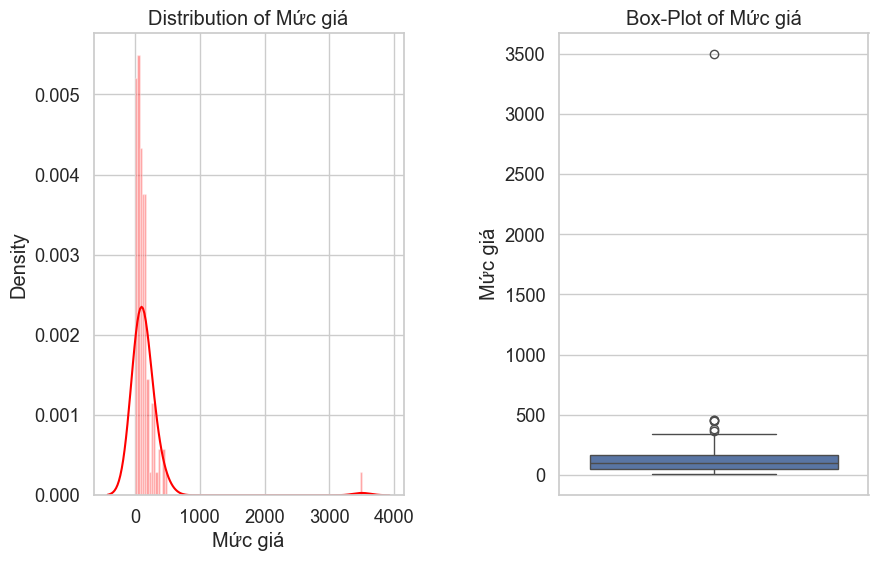

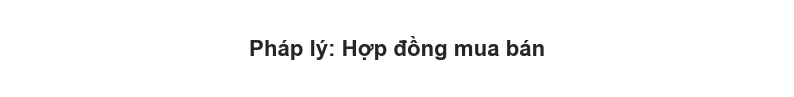

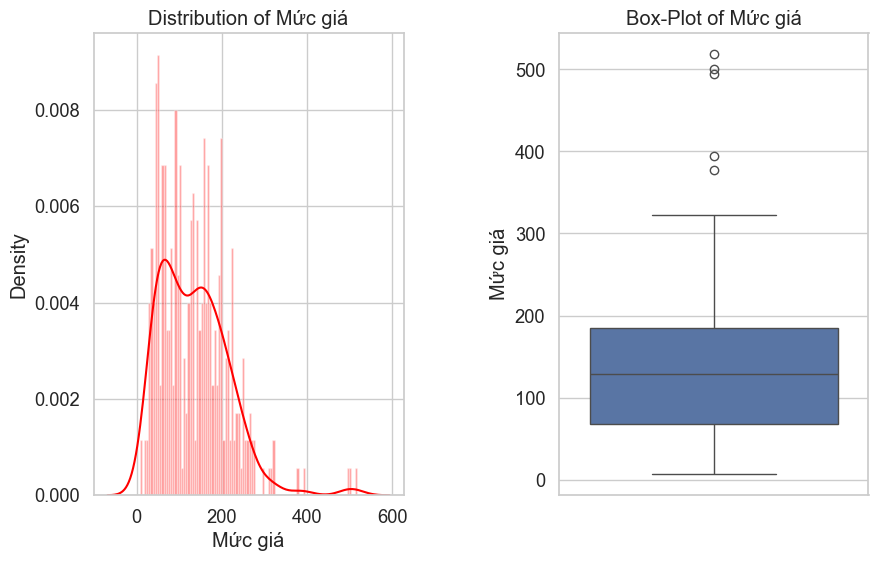

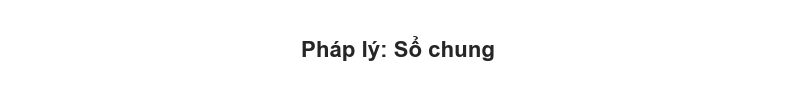

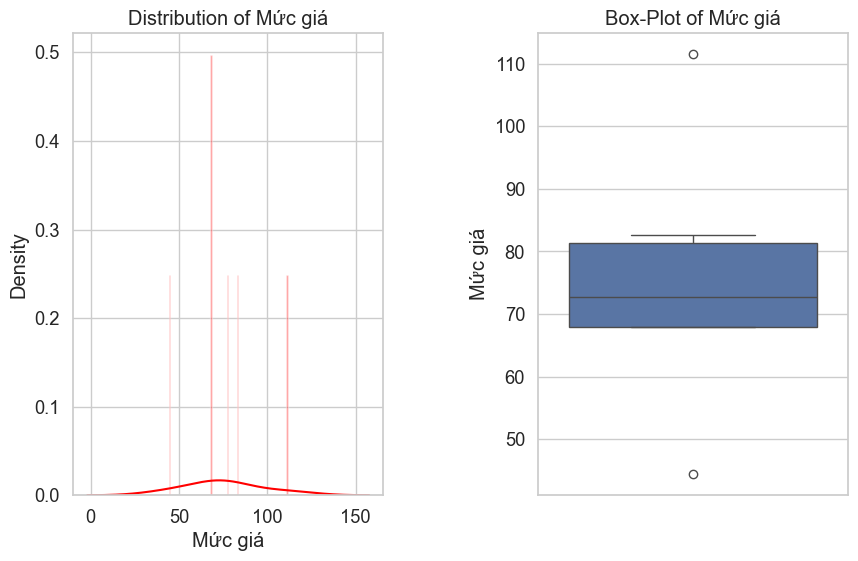

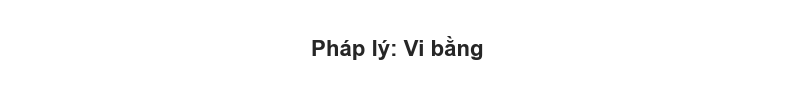

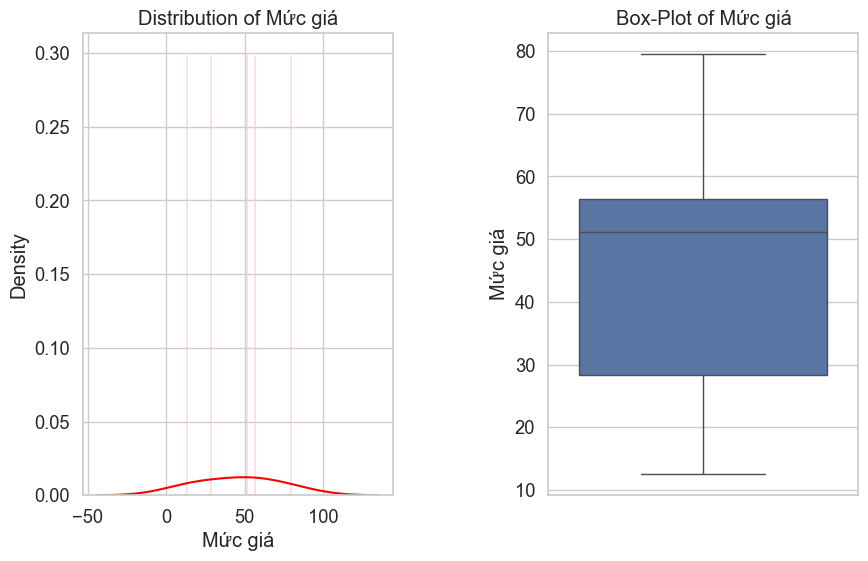

In [82]:
for i in price_by_phaply['Pháp lý']:
    subset = data[data['Pháp lý'] == i]
    title = f'Pháp lý: {i}'
    plot_with_title(subset, title)

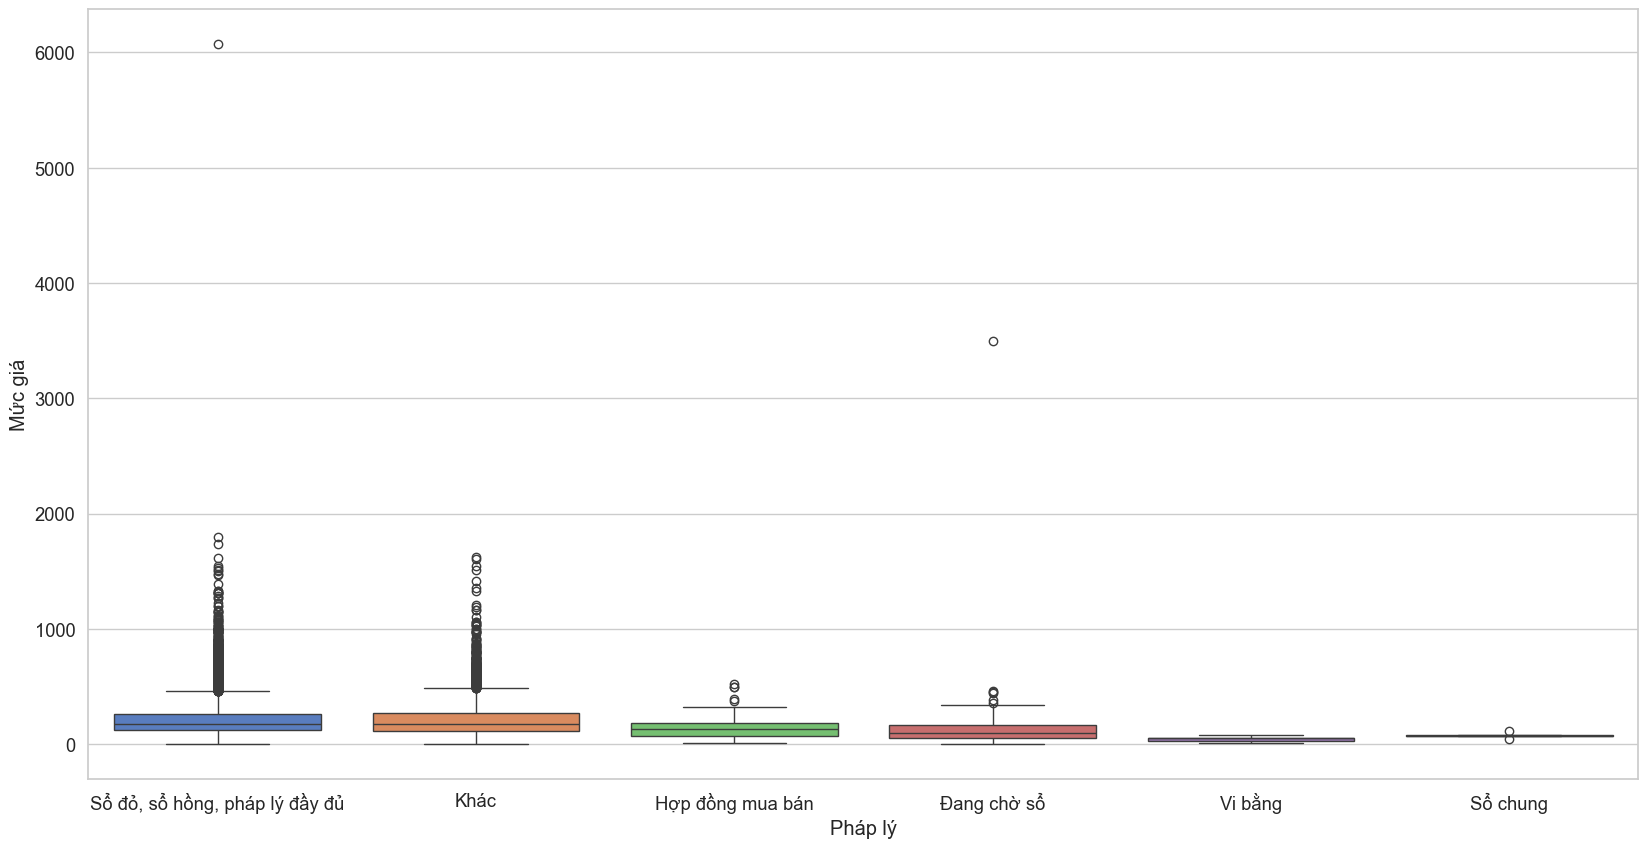

In [83]:
df = pd.concat([data['Mức giá'], data['Pháp lý']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Pháp lý', y="Mức giá", data=df,palette="muted")

### Tiện ích

###### Tính tổng điểm: cao nhất có thể là 15 điểm. Thấp nhất là không có điểm nào

In [84]:
selected_col = ['Nhóm 1-Trường học','Nhóm 1- Chợ/Siêu thị','Nhóm 1-Bệnh viện','Công viên','Vỉa hè','Bán gấp','Sân phơi','Nhà thoáng','Gần hồ','An ninh','Hiện đại','Chỗ để xe','Thang máy','Lô góc','Hỗ trợ vay']
data['Tổng tiện ích'] = data[selected_col].sum(axis=1)

In [85]:
data['Tổng tiện ích'].unique()

array([ 4,  8,  3,  1,  2,  5,  6,  7,  0, 11,  9, 10, 12], dtype=int64)

In [86]:
data['Tổng tiện ích'].value_counts().to_frame().rename(columns = {'Tổng tiện ích':'Số lượng'})

count
Tổng tiện ích       
2               5284
3               4948
1               4007
4               4003
5               2523
0               1915
6               1507
7                757
8                360
9                135
10                47
11                16
12                 2

Total Number of unique categories of Tổng tiện ích = 13


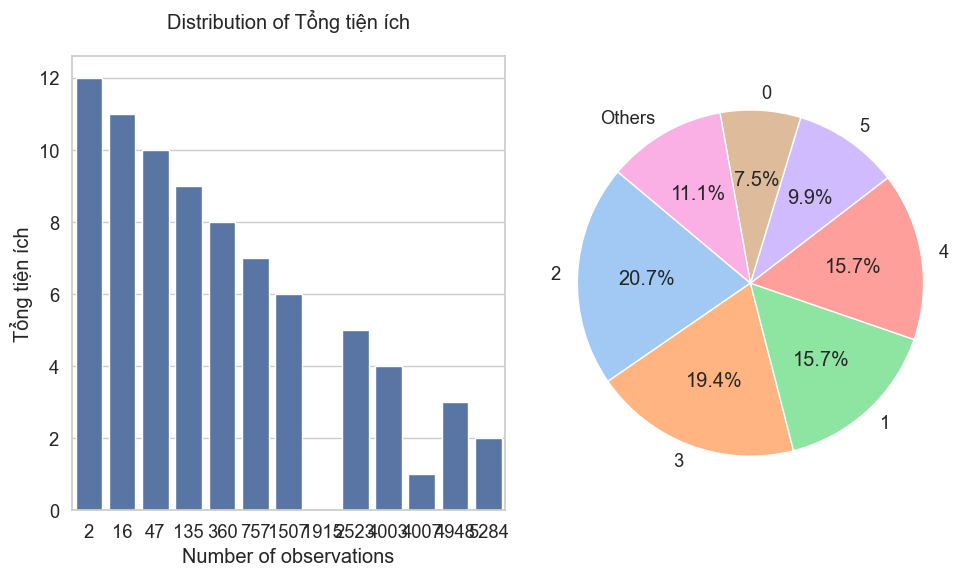

In [87]:
plot_categorical_variables(data, 'Tổng tiện ích', figsize = (10, 6))

In [88]:
price_by_sum = data.groupby('Tổng tiện ích')['Mức giá'].agg(['mean', 'min', 'max']).reset_index()
price_by_sum.columns = ['Tổng tiện ích', 'Mức giá trung bình','Mức giá tối thiểu','Mức giá tối đa']
price_by_sum = price_by_sum.sort_values(by='Mức giá trung bình', ascending=False).reset_index(drop=True)
price_by_sum

Tổng tiện ích  Mức giá trung bình  Mức giá tối thiểu  Mức giá tối đa
0              12          246.400000              195.5           297.3
1               1          224.523634                2.7          1794.1
2               2          222.583668                0.6          6071.4
3               3          218.630416                5.3          1547.6
4               4          210.836173               10.6          1545.5
5               0          207.644543                1.3          3500.0
6              11          207.606250               76.6           300.0
7               5          205.380182               10.0          1612.9
8               7          201.466711               16.0           910.6
9              10          196.634043              105.0           370.0
10              6          194.893298               20.7          1464.3
11              9          194.012593               67.2           470.6
12              8          193.064722               36.2          1027.8

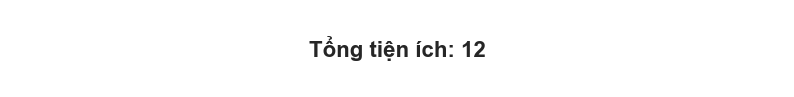

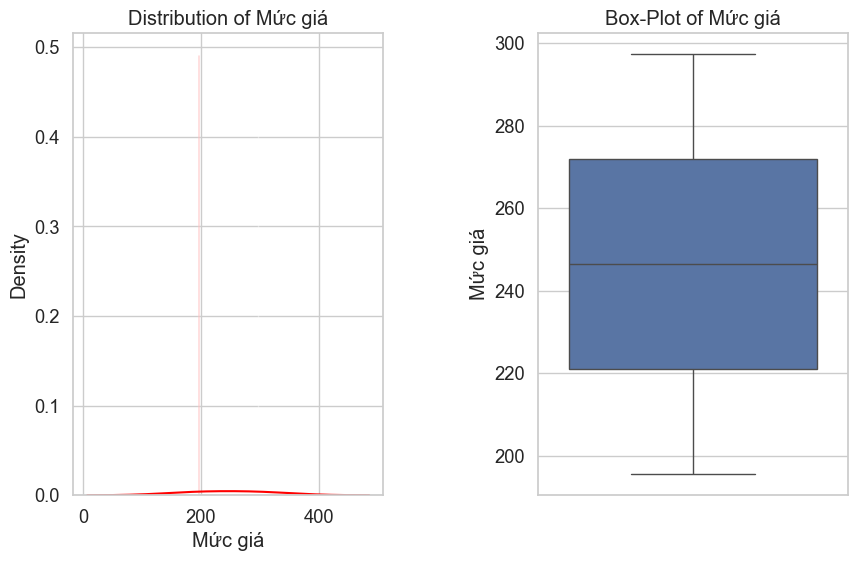

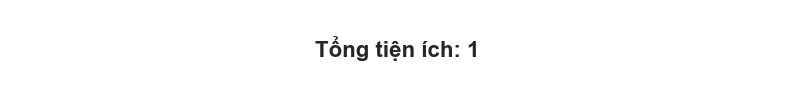

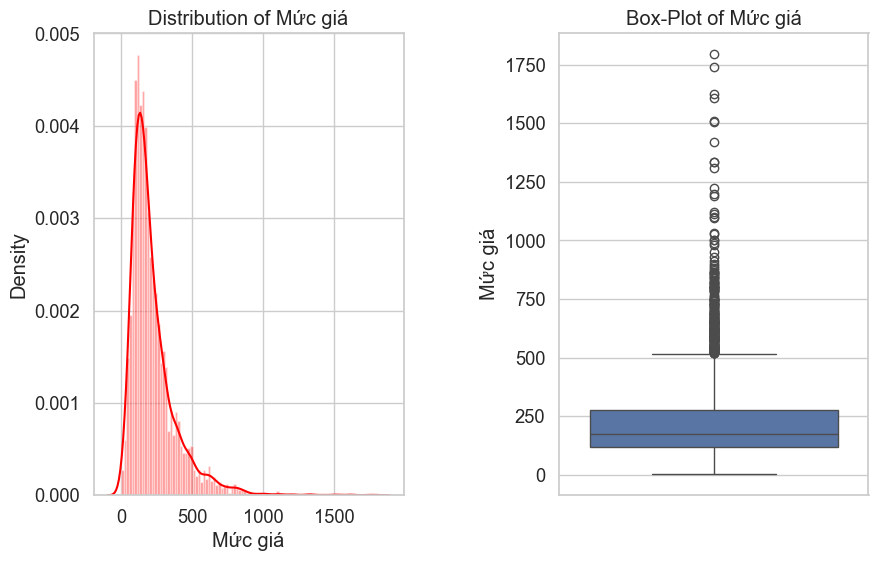

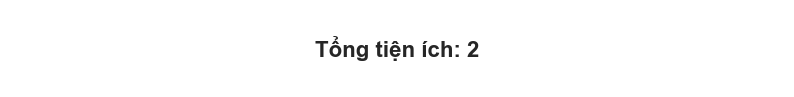

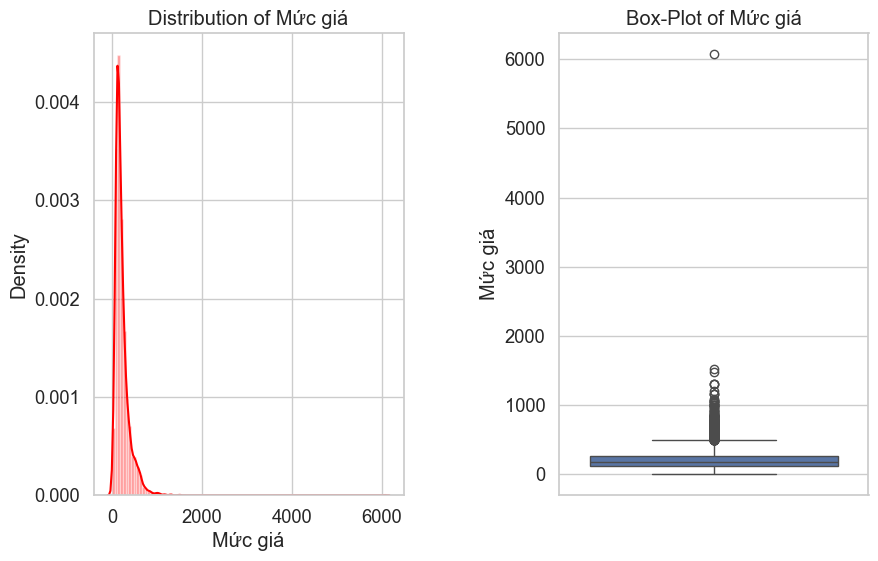

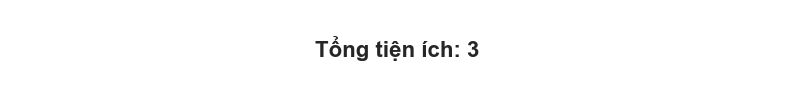

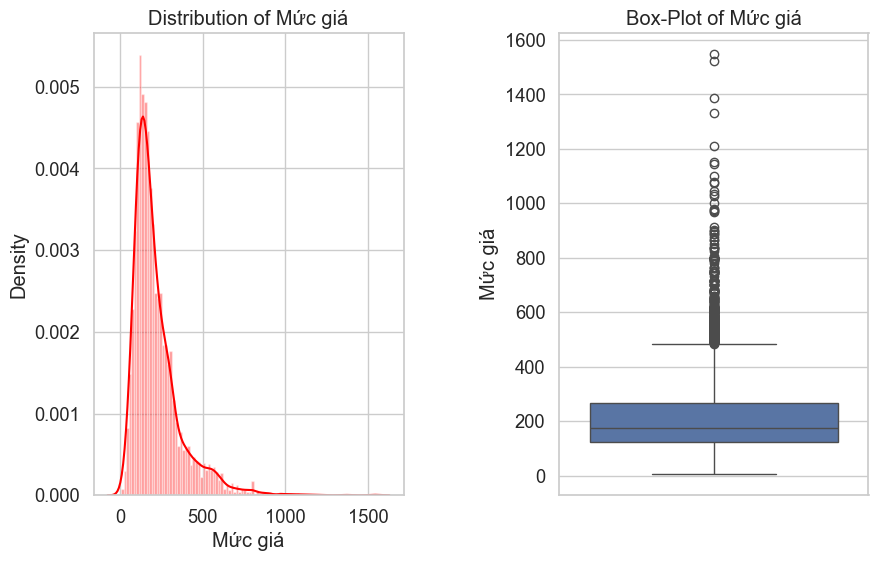

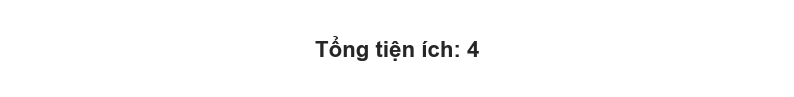

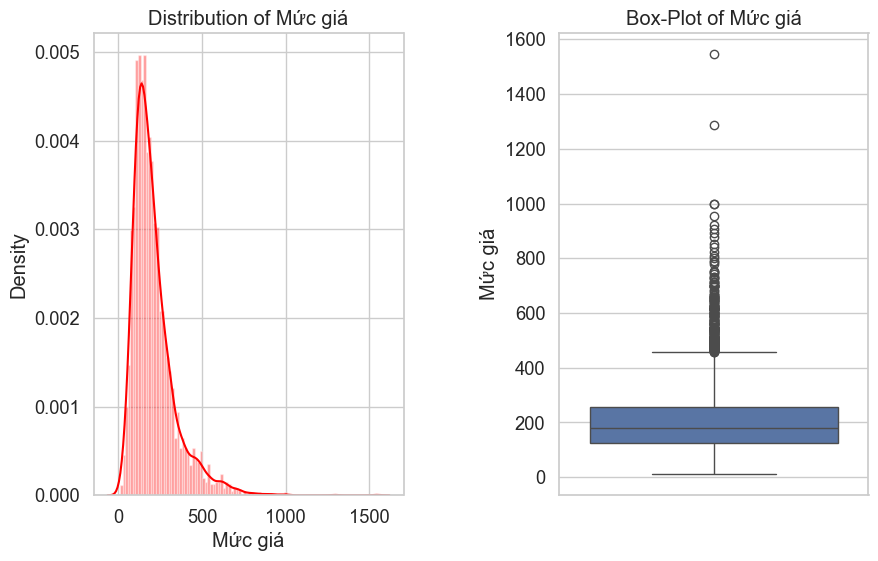

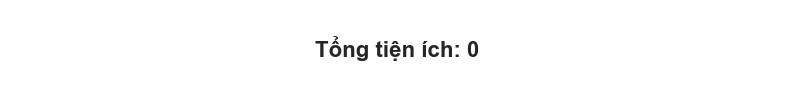

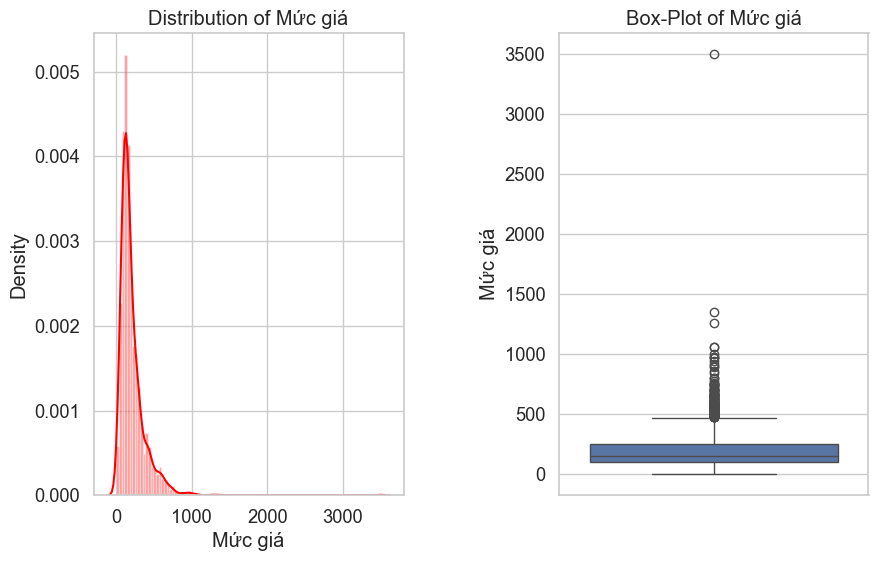

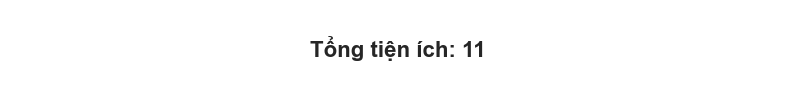

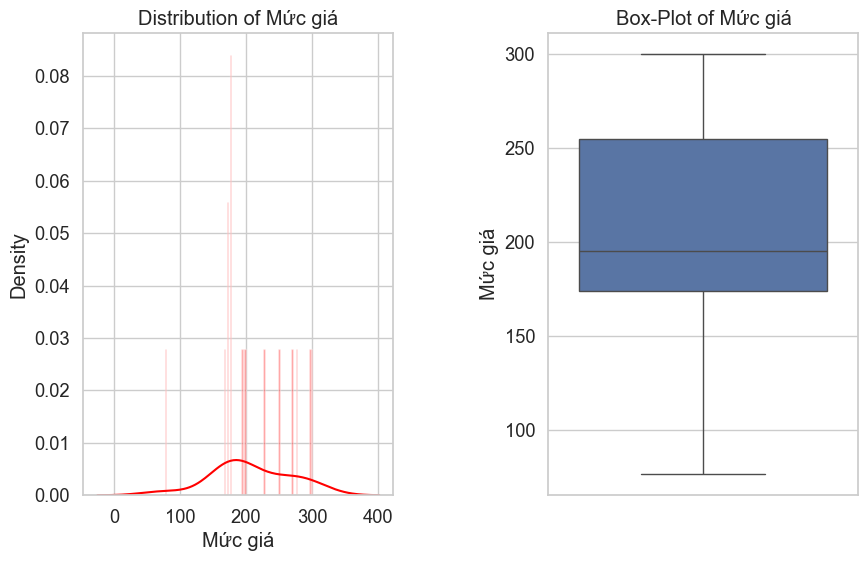

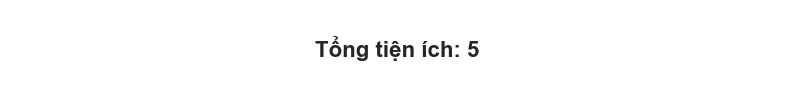

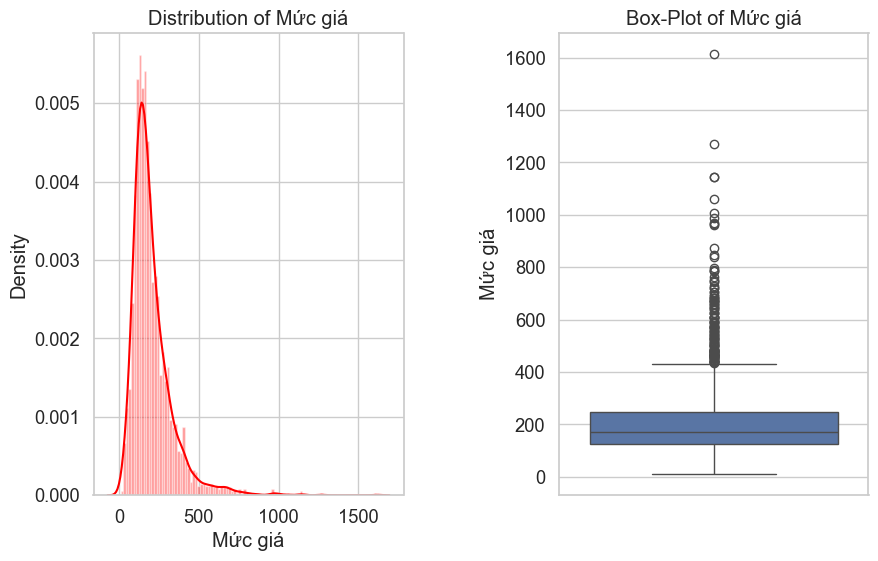

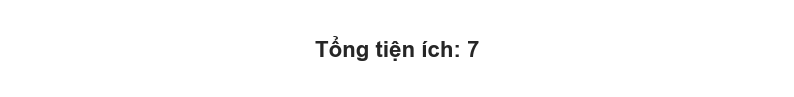

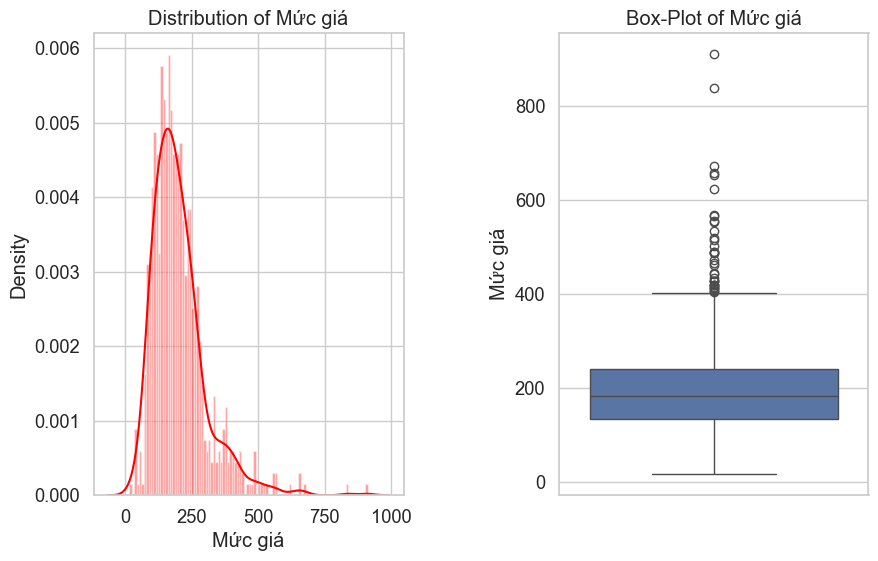

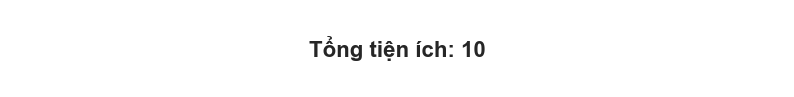

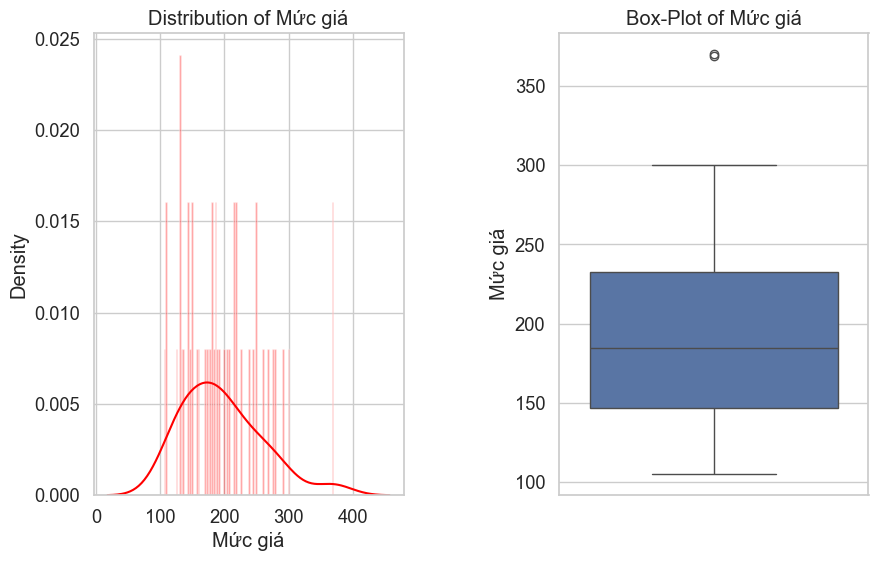

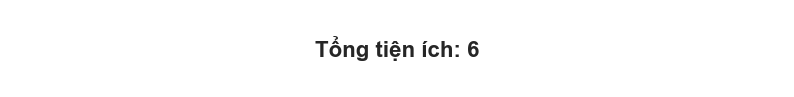

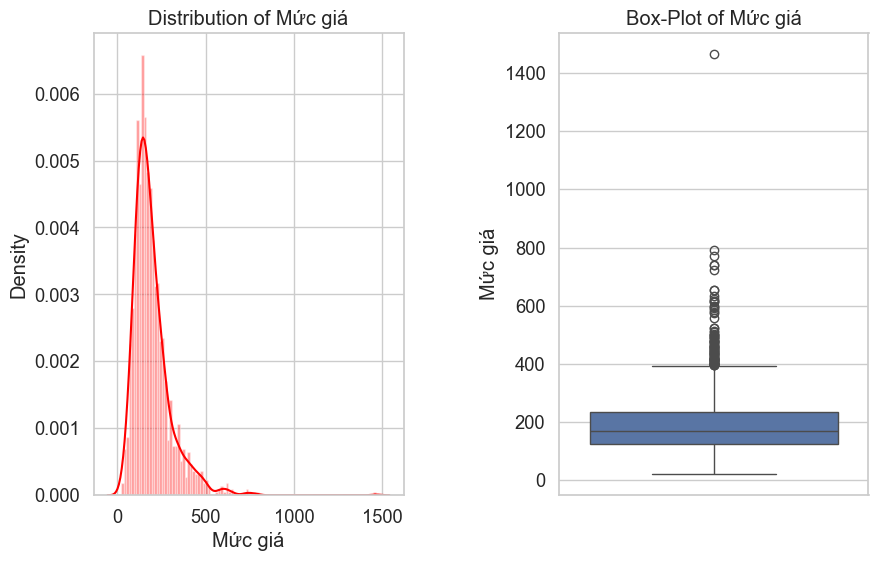

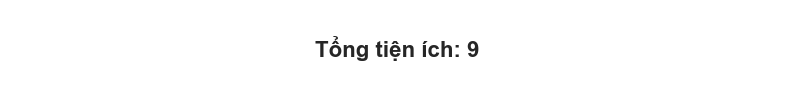

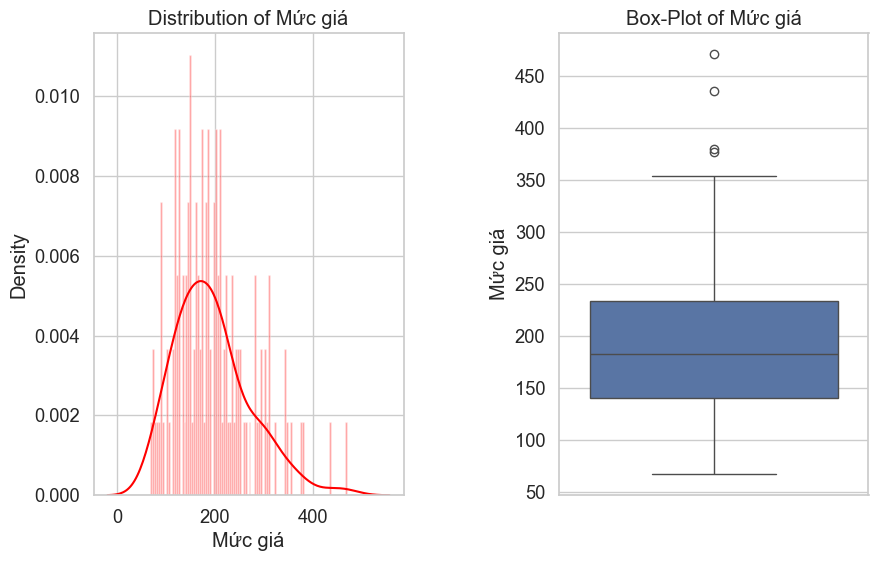

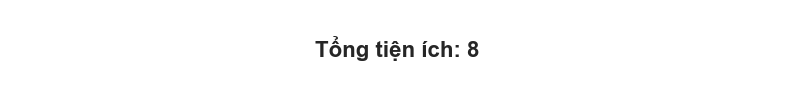

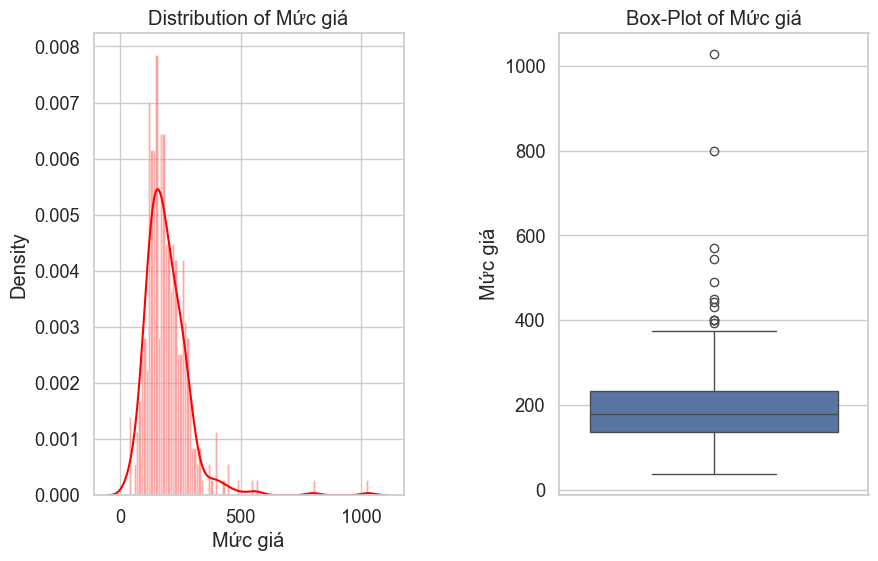

In [89]:
for i in price_by_sum['Tổng tiện ích']:
    subset = data[data['Tổng tiện ích'] == i]
    title = f'Tổng tiện ích: {i}'
    plot_with_title(subset, title)

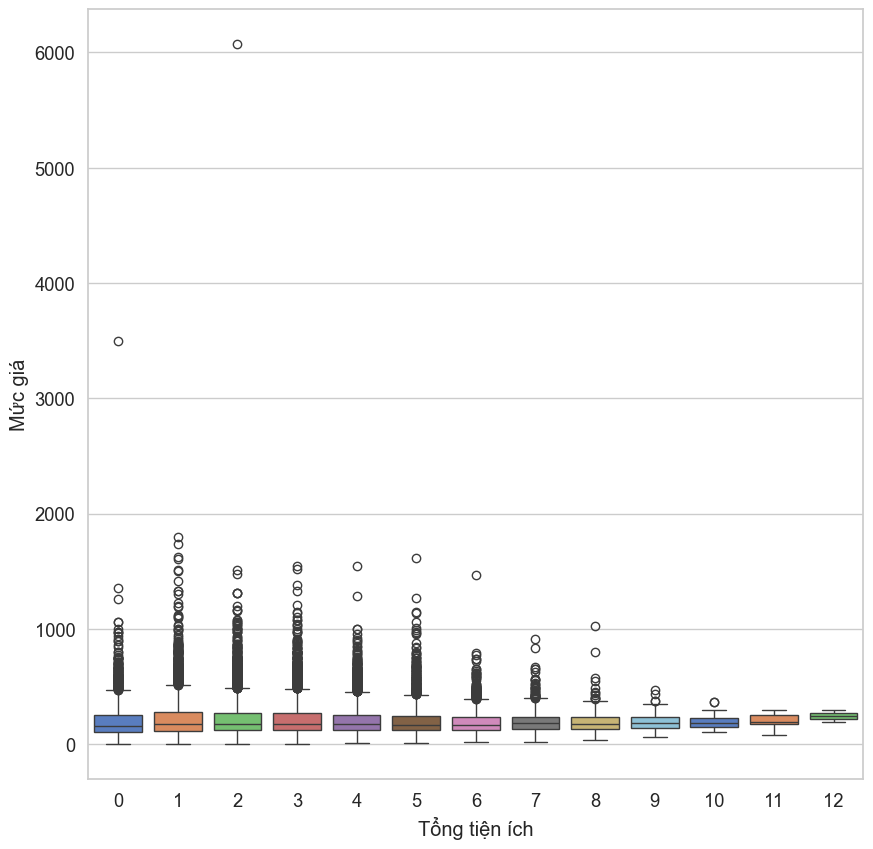

In [90]:
df = pd.concat([data['Mức giá'], data['Tổng tiện ích']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='Tổng tiện ích', y="Mức giá", data=df, palette="muted")